Author: Ernie Sumoso

### Corporate Credit Card Transactions - London Borough of Barnet 2014-2017

Let's start by __importing our datasets into separate dataframes__.

In [23]:
import pandas as pd

# import the datasets from original files
df_2014 = pd.read_csv('data/Purchasing Card Data 2014 v1.csv')
df_2015 = pd.read_csv('data/PCard Transactions 15-16.txt')
df_2016 = pd.read_csv('data/PCard 1617.csv')
df_2017 = pd.read_csv('data/1718Pcard.csv')

# save datasets into one single list
dfs = [df_2014, df_2015, df_2016, df_2017]
years = ['2014', '2015', '2016', '2017']

In [24]:
# check the loaded datasets
def display_datasets(list_dfs, titles, n, tail=False):
    for i, df in enumerate(list_dfs):
        print("Data from", titles[i] + ':')
        if tail: display(df.tail(n))
        else: display(df.head(n))
        
display_datasets(dfs, years, 5, True)

Data from 2014:


Service Area             Account Description  \
4137      Adults and Communities                         Postage   
4138  Children's Family Services  Equipment and Materials Purcha   
4139  Children's Family Services  Equipment and Materials Purcha   
4140  Children's Family Services           Books-CDs-Audio-Video   
4141  Children's Family Services  Other Transfer Payments to Soc   

                 Creditor Transaction Date  JV Reference     JV Date JV Value  
4137    WWW.ROYALMAIL.COM       23/02/2015          5002  16/03/2015      124  
4138   WWW.SMYTHSTOYS.COM       20/02/2015          5188  16/03/2015    89.96  
4139  WWW.TTS-GROUPS.CO.U       06/02/2015          5207  16/03/2015   445.92  
4140     WWW.WILDGOOSE.AC       09/02/2015          5271  16/03/2015   407.44  
4141  www.1st4footballtic       06/02/2015          4895  16/03/2015      153

Data from 2015:


Service Area Account Description         Creditor  \
3860  Children's Family Services          Food Costs  ZAHRA NEWSAGENT   
3861  Children's Family Services          Food Costs  ZAHRA NEWSAGENT   
3862  Children's Family Services          Food Costs  ZAHRA NEWSAGENT   
3863  Children's Family Services          Food Costs  ZAHRA NEWSAGENT   
3864                         NaN                 NaN              NaN   

     Journal Date  Journal Reference       Total  
3860   17/11/2015             6042.0         3.5  
3861   20/01/2016             6751.0         4.5  
3862   21/03/2016             7535.0         4.5  
3863   31/03/2016             7639.0         4.5  
3864          NaN                NaN  381,012.77

Data from 2016:


Service Area    Account Description            Creditor Journal Date  \
4577  Streetscene  Vehicle Running Costs     WWW.DVLA.GOV.UK   23/08/2016   
4578  Streetscene  Vehicle Running Costs     WWW.DVLA.GOV.UK   23/08/2016   
4579  Streetscene  Vehicle Running Costs     WWW.DVLA.GOV.UK   25/08/2016   
4580  Streetscene  Vehicle Running Costs  WWW.MOT-TESTING-CP   25/11/2016   
4581  Grand Total                    NaN                 NaN          NaN   

      Journal Reference       Total  
4577             9212.0      232.50  
4578             9213.0      167.50  
4579             9248.0      232.50  
4580            10384.0       68.00  
4581                NaN  471,044.01

Data from 2017:


FIN.TRANSACTION DATE FIN.POSTING DATE FIN.TRANSACTION AMOUNT  \
4926             16/03/18         19/03/18                  20.00   
4927             07/03/18         08/03/18                 354.25   
4928             21/03/18         22/03/18                  51.88   
4929             22/03/18         26/03/18                  10.00   
4930             27/03/18         28/03/18                  11.00   

          MCH.MERCHANT NAME  MCH.CITY NAME FIN.ORIGINAL CURRENCY AMOUNT  \
4926               GIFFGAFF   WWW.GIFFGAFF                        20.00   
4927        LOVE2SHOP.CO.UK  0345 717 1111                       354.25   
4928  AMAZON UK MARKETPLACE   800-279-6620                        51.88   
4929        WWW.BRENTGOV.UK       INTERNET                        10.00   
4930      LUTON BC INTERNET          LUTON                        11.00   

     FIN.ORIGINAL ISO CURRENCY CODE SYMBOL  FIN.INET CONVERSION  
4926                                   GBP                  1.0  
4927                                   GBP                  1.0  
4928                                   GBP                  1.0  
4929                                   GBP                  1.0  
4930                                   GBP                  1.0

We notice that __each dataset has different column names__ and data, __especially__ the __2017 data__.

For this analysis we will need the following columns:
- __Service Area__
- __Account Description__
- __Creditor__
- __Transaction Date__ (Journal Date)
- __Total__ (JV Value)

Let's keep these columns from each dataset and __remove those uneeded features__.

In [25]:
# set the required column names
column_names = ['Service Area', 'Account Description', 'Creditor', 'Transaction Date', 'Total']

# mapping column names based on the given rules
renaming_rules = {'JV Value':'Total',
                  'Journal Date':'Transaction Date',
                  'FIN.TRANSACTION DATE':'Transaction Date',
                  'FIN.TRANSACTION AMOUNT':'Total',
                  }

def clean_datasets(dfs, column_names, renaming_rules, exceptions=[]):
    
    # loop through dataframes to rename columns and drop unnecessary ones
    for df in dfs:
        # rename columns based on predefined rules
        df.rename(columns = renaming_rules, inplace=True)
        
        # drop unnecessary columns to save memory
        drop_columns = [col for col in df.columns if col not in column_names and col not in exceptions]
        df.drop(columns = drop_columns, inplace=True)

drop_exceptions = ['MCH.MERCHANT NAME', 'MCH.CITY NAME']
clean_datasets(dfs, column_names, renaming_rules, drop_exceptions)
display_datasets(dfs, years, 5, True)

Data from 2014:


Service Area             Account Description  \
4137      Adults and Communities                         Postage   
4138  Children's Family Services  Equipment and Materials Purcha   
4139  Children's Family Services  Equipment and Materials Purcha   
4140  Children's Family Services           Books-CDs-Audio-Video   
4141  Children's Family Services  Other Transfer Payments to Soc   

                 Creditor Transaction Date   Total  
4137    WWW.ROYALMAIL.COM       23/02/2015     124  
4138   WWW.SMYTHSTOYS.COM       20/02/2015   89.96  
4139  WWW.TTS-GROUPS.CO.U       06/02/2015  445.92  
4140     WWW.WILDGOOSE.AC       09/02/2015  407.44  
4141  www.1st4footballtic       06/02/2015     153

Data from 2015:


Service Area Account Description         Creditor  \
3860  Children's Family Services          Food Costs  ZAHRA NEWSAGENT   
3861  Children's Family Services          Food Costs  ZAHRA NEWSAGENT   
3862  Children's Family Services          Food Costs  ZAHRA NEWSAGENT   
3863  Children's Family Services          Food Costs  ZAHRA NEWSAGENT   
3864                         NaN                 NaN              NaN   

     Transaction Date       Total  
3860       17/11/2015         3.5  
3861       20/01/2016         4.5  
3862       21/03/2016         4.5  
3863       31/03/2016         4.5  
3864              NaN  381,012.77

Data from 2016:


Service Area    Account Description            Creditor Transaction Date  \
4577  Streetscene  Vehicle Running Costs     WWW.DVLA.GOV.UK       23/08/2016   
4578  Streetscene  Vehicle Running Costs     WWW.DVLA.GOV.UK       23/08/2016   
4579  Streetscene  Vehicle Running Costs     WWW.DVLA.GOV.UK       25/08/2016   
4580  Streetscene  Vehicle Running Costs  WWW.MOT-TESTING-CP       25/11/2016   
4581  Grand Total                    NaN                 NaN              NaN   

           Total  
4577      232.50  
4578      167.50  
4579      232.50  
4580       68.00  
4581  471,044.01

Data from 2017:


Transaction Date   Total      MCH.MERCHANT NAME  MCH.CITY NAME
4926         16/03/18   20.00               GIFFGAFF   WWW.GIFFGAFF
4927         07/03/18  354.25        LOVE2SHOP.CO.UK  0345 717 1111
4928         21/03/18   51.88  AMAZON UK MARKETPLACE   800-279-6620
4929         22/03/18   10.00        WWW.BRENTGOV.UK       INTERNET
4930         27/03/18   11.00      LUTON BC INTERNET          LUTON

We have kept the 2 only textual columns from the __2017 data__, however, this particular dataset __needs further cleaning__.

Specifically, we __need to map the Service Area, Account Description, and Creditor__ for the 2017 data.

We will map these values __based on__ both:
- __Categorical columns of 2017 data__
- __Previous datasets from 2014-2016__

### TODO: further df_2017 cleaning and mapping

In [26]:
set(df_2016['Service Area'].apply(str.lower))

{'adults and communities',
 'assurance',
 "children's education & skills",
 "children's family services",
 "children's service dsg",
 'commissioning',
 'customer support group',
 'grand total',
 'hra',
 'parking & infrastructure',
 'public health',
 'regional enterprise',
 'streetscene'}

In [27]:
list(set(df_2016['Account Description']))[:10]

['Gas',
 'Non Education Staff GPay',
 'Grounds maintenance',
 'Software Licences & Support',
 'Fees and Charges',
 'Operating Leases - Transport',
 nan,
 'Water Services',
 'Travelling Expenses',
 'Equipment Hire']

### END TO-DO

Now that we have __similar columns for all 4 datasets__, we can proceed to __merge them into a single dataframe__.

In [28]:
dfs = [df_2014, df_2015, df_2016]

In [29]:
# merge datasets and reset indexes
df = pd.concat(dfs)
df.reset_index(drop = True, inplace=True)
df

Service Area             Account Description            Creditor  \
0      Childrens Services                     IT Services       123-REG.CO.UK   
1      Childrens Services                  Other Services  ACCESS EXPEDITIONS   
2      Childrens Services  Equipment and Materials Repair     AFE SERVICELINE   
3      Childrens Services  Equipment and Materials Repair     AFE SERVICELINE   
4      Childrens Services  Building Repairs & Maintenance    ALLSOP & FRANCIS   
...                   ...                             ...                 ...   
12584         Streetscene           Vehicle Running Costs     WWW.DVLA.GOV.UK   
12585         Streetscene           Vehicle Running Costs     WWW.DVLA.GOV.UK   
12586         Streetscene           Vehicle Running Costs     WWW.DVLA.GOV.UK   
12587         Streetscene           Vehicle Running Costs  WWW.MOT-TESTING-CP   
12588         Grand Total                             NaN                 NaN   

      Transaction Date       Total  
0           23/04/2014      143.81  
1           03/04/2014    6,000.00  
2           02/04/2014      309.38  
3           02/04/2014      218.76  
4           15/04/2014         306  
...                ...         ...  
12584       23/08/2016      232.50  
12585       23/08/2016      167.50  
12586       25/08/2016      232.50  
12587       25/11/2016       68.00  
12588              NaN  471,044.01  

[12589 rows x 5 columns]

Now that we have 1 single dataset, let's go ahead and __implement some methods__ to explore and find the following information:
- __number of rows and columns__
- __missing values per column__
- __unique values per column__
- __duplicated values__

In [30]:
# create a class to store our basic Exploratory Data Analysis methods
class EDA():
    # display the number of rows, columns and the column names
    def display_shape_and_colnames(self, df):
        print("Number of Rows:", df.shape[0])
        print("Number of Columns:", df.shape[1])
        print(df.columns)
        
    def check_missing_values(self, df):
        # check for number of missing values per column
        print("# Missing Values")
        print(df.isna().sum())

        # check for % of missing values
        print("\n% Missing Values")
        print(df.isna().mean() * 100)

    def check_nunique_values(self, df):
        # check number of unique values per column
        print("# Unique Values per Column")
        for col in df.columns:
            print("'"+col+"'", "# of unique values:", df[col].nunique())

        # check % of unique values per column (relative to number of total rows in the dataset)
        print("\n% Unique Values per Column")
        for col in df.columns:
            print("'"+col+"'", "% of unique values:", round(df[col].nunique() * 100 / df.shape[0], 2), "%")

    def check_duplicated_values(self, df):
        # check for number of duplicated values
        print("# Duplicated Values")
        print(df.duplicated().sum())

        # check for % of duplicated values
        print("\n% Duplicated Values")
        print(df.duplicated().mean() * 100)
    
eda = EDA()
eda.display_shape_and_colnames(df)

Number of Rows: 12589
Number of Columns: 5
Index(['Service Area', 'Account Description', 'Creditor', 'Transaction Date',
       'Total'],
      dtype='object')


In [31]:
eda.check_missing_values(df)

# Missing Values
Service Area           1
Account Description    2
Creditor               2
Transaction Date       2
Total                  0
dtype: int64

% Missing Values
Service Area           0.007943
Account Description    0.015887
Creditor               0.015887
Transaction Date       0.015887
Total                  0.000000
dtype: float64


We haver __very few missing values__ (2 rows), __these don't represent even 0.1% of the total data__.

In [32]:
eda.check_nunique_values(df)

# Unique Values per Column
'Service Area' # of unique values: 25
'Account Description' # of unique values: 67
'Creditor' # of unique values: 1936
'Transaction Date' # of unique values: 739
'Total' # of unique values: 6292

% Unique Values per Column
'Service Area' % of unique values: 0.2 %
'Account Description' % of unique values: 0.53 %
'Creditor' % of unique values: 15.38 %
'Transaction Date' % of unique values: 5.87 %
'Total' % of unique values: 49.98 %


Most of the columns have __few unique values__, __except for Creditor and Total.__

In [33]:
eda.check_duplicated_values(df)

# Duplicated Values
726

% Duplicated Values
5.76693939153229


Only 5.7% of our data are duplicated rows.

However, we __can not drop duplicated rows as each one is a unique transaction.__

Let's proceed with __dropping missing values.__

In [34]:
# drop missing values
df.dropna(inplace=True)

eda.check_missing_values(df)

# Missing Values
Service Area           0
Account Description    0
Creditor               0
Transaction Date       0
Total                  0
dtype: int64

% Missing Values
Service Area           0.0
Account Description    0.0
Creditor               0.0
Transaction Date       0.0
Total                  0.0
dtype: float64


Now that we don't need to worry about unique values, duplicated rows, or missing values,

let's __describe our dataset and display the data types per column.__

In [35]:
df.describe()

Service Area             Account Description  \
count                        12587                           12587   
unique                          24                              67   
top     Children's Family Services  Equipment and Materials Purcha   
freq                          7672                            2676   

                     Creditor Transaction Date  Total  
count                   12587            12587  12587  
unique                   1936              739   6290  
top     AMAZON UK MARKETPLACE       21/05/2015     20  
freq                      977              214    309

In [36]:
df.dtypes

Service Area           object
Account Description    object
Creditor               object
Transaction Date       object
Total                  object
dtype: object

We notice that the __Transaction Date and Total columns are stored as objects__.

Let's __turn them into proper dates and numeric columns respectively__.

In [37]:
# casting posted_date as datetime
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], dayfirst = True)

# casting Total as float
df['Total'] = df['Total'].str.replace(',','')
df['Total'] = pd.to_numeric(df['Total'])

df.head()

Service Area             Account Description            Creditor  \
0  Childrens Services                     IT Services       123-REG.CO.UK   
1  Childrens Services                  Other Services  ACCESS EXPEDITIONS   
2  Childrens Services  Equipment and Materials Repair     AFE SERVICELINE   
3  Childrens Services  Equipment and Materials Repair     AFE SERVICELINE   
4  Childrens Services  Building Repairs & Maintenance    ALLSOP & FRANCIS   

  Transaction Date    Total  
0       2014-04-23   143.81  
1       2014-04-03  6000.00  
2       2014-04-02   309.38  
3       2014-04-02   218.76  
4       2014-04-15   306.00

In [38]:
df.dtypes

Service Area                   object
Account Description            object
Creditor                       object
Transaction Date       datetime64[ns]
Total                         float64
dtype: object

We will also __need Quarter and Year columns__ for the upcoming analysis and plots.

Let's __extract the quarters and years from the Transaction Date column.__

In [91]:
df['Quarter'] = pd.PeriodIndex(df['Transaction Date'], freq='Q')
df['Year'] = df['Transaction Date'].dt.year
df

Service Area             Account Description  \
0              Childrens Services           Books-CDs-Audio-Video   
1              Childrens Services                      Food Costs   
2              Childrens Services  Equipment and Materials Purcha   
3              Childrens Services  Equipment and Materials Repair   
4              Childrens Services  Equipment and Materials Repair   
...                           ...                             ...   
12582  Children's Family Services          Miscellaneous Expenses   
12583  Children's Family Services                      Food Costs   
12584  Children's Family Services                      Stationery   
12585                 Streetscene  Equipment and Materials Purcha   
12586      Adults and Communities                        Training   

                     Creditor Transaction Date   Total Quarter  Year  
0         Amazon *Mktplce EU-       2014-04-02   59.97  2014Q2  2014  
1            TESCO STORES 644       2014-04-02 -230.30  2014Q2  2014  
2                   Amazon EU       2014-04-02   16.54  2014Q2  2014  
3             AFE SERVICELINE       2014-04-02  309.38  2014Q2  2014  
4             AFE SERVICELINE       2014-04-02  218.76  2014Q2  2014  
...                       ...              ...     ...     ...   ...  
12582       BUILDER DEPOT N11       2017-04-03   21.39  2017Q2  2017  
12583         SAINSBURYS 0513       2017-04-03  158.06  2017Q2  2017  
12584  AMAZON UK RETAIL AMAZO       2017-04-03   16.98  2017Q2  2017  
12585        WWW.SPRINGER.COM       2017-04-03   86.00  2017Q2  2017  
12586            AMAZON PRIME       2017-04-03   79.00  2017Q2  2017  

[12587 rows x 7 columns]

### Auditor Requirements:

__1.	The Auditor would like to get a summary view of the transactions for each Service Area. The summary view would include at least one visual representation of the transactions in such a way that they could compare them by quarter. Quarters are defined based on the calendar year (Q1 is January to March, Q2 April to June, etc.). The Auditor would also like a summary table with some relevant statistics (The Auditor says something along the lines of “transaction counts and averages”, but welcomes ideas).__

Before creating a summary of the transactions per Service Area and by quarter, we will sort the dataset by Transaction Date.

In [44]:
# sort dataset by transaction date
df.sort_values(by='Transaction Date', inplace=True)

df.reset_index(drop=True, inplace=True)

df

Service Area             Account Description  \
0              Childrens Services           Books-CDs-Audio-Video   
1              Childrens Services                      Food Costs   
2              Childrens Services  Equipment and Materials Purcha   
3              Childrens Services  Equipment and Materials Repair   
4              Childrens Services  Equipment and Materials Repair   
...                           ...                             ...   
12582  Children's Family Services          Miscellaneous Expenses   
12583  Children's Family Services                      Food Costs   
12584  Children's Family Services                      Stationery   
12585                 Streetscene  Equipment and Materials Purcha   
12586      Adults and Communities                        Training   

                     Creditor Transaction Date   Total Quarter  
0         Amazon *Mktplce EU-       2014-04-02   59.97  2014Q2  
1            TESCO STORES 644       2014-04-02 -230.30  2014Q2  
2                   Amazon EU       2014-04-02   16.54  2014Q2  
3             AFE SERVICELINE       2014-04-02  309.38  2014Q2  
4             AFE SERVICELINE       2014-04-02  218.76  2014Q2  
...                       ...              ...     ...     ...  
12582       BUILDER DEPOT N11       2017-04-03   21.39  2017Q2  
12583         SAINSBURYS 0513       2017-04-03  158.06  2017Q2  
12584  AMAZON UK RETAIL AMAZO       2017-04-03   16.98  2017Q2  
12585        WWW.SPRINGER.COM       2017-04-03   86.00  2017Q2  
12586            AMAZON PRIME       2017-04-03   79.00  2017Q2  

[12587 rows x 6 columns]

Let's __import necessary libraries to plot using matplotlib.__

In [45]:
# import required libraries for plotting
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output

The following function takes as parameters:
- dataframe
- some column names
- color and size of plots
- title and labels

It plots a __bar chart of the transactions data by quarters.__

In [73]:
def plot_count_transactions_per_quarter(df,
                                        quarter_colname='Quarter',
                                        total_colname='Total',
                                        color='blue',
                                        plot_size=(10, 5),
                                        add_title='',
                                        group_function='count',
                                        x_labels = []):
    # group data by quarters
    if group_function == 'sum':
        df_quarters = df.groupby(quarter_colname).sum(numeric_only=True)
    elif group_function == 'count':
        df_quarters = df.groupby(quarter_colname).count()
    else: return

    # set index and size
    df_quarters.index = df_quarters.index.map(str)
    plt.figure(figsize=plot_size)
    
    # set x and y for bar plot
    if x_labels == []: x_labels = df_quarters.index
    x = x_labels
    y_dict = dict(df_quarters[total_colname].items())
    
    # map the values of y to their proper quarter (so we can plot within all the quarters range)
    y = []
    for quarter in x:
        if quarter in y_dict.keys():
            y.append(y_dict[quarter])
        else:
            y.append(0)
    
    # set title and labels
    plt.title(add_title + ": " + group_function.title())
    plt.xticks(rotation=34)
    plt.xlabel(quarter_colname)
    plt.ylabel(group_function.title())

    # plot the bar chart and set size
    plt.bar(x, y, width=0.8, color=color)
    
    # annotate the bar values
    offset = max(y) * 0.03
    for x_val, y_val in zip(x, y):
        label = "{:.0f}".format(y_val)
        plt.annotate(label, (x_val, y_val + offset), ha='center', va='center')

Now that we have a re-usable code function.

Let's first use it to __plot the Count of Transactions per Quarter for ALL Service Areas.__

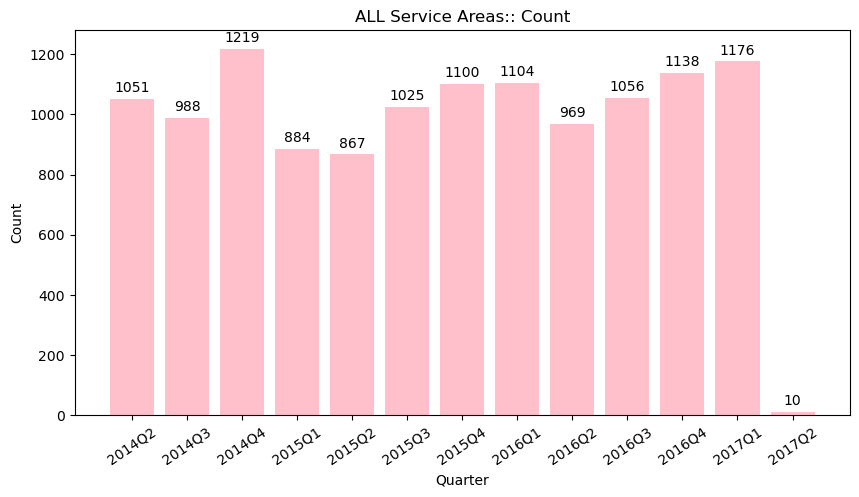

In [75]:
plot_count_transactions_per_quarter(df, group_function='count', color='pink', add_title='ALL Service Areas:')

__Insights from the total number of transactions over time:__
- The transactions have gone up ever since the lower peaks from the first half of 2015.
- We rapidly notice an important all-time peak in 2014Q4.
- In 2016Q2 the transactions lowered, but then started to recover over time.

Now, let's __plot the Sum of Transactions per Quarter for ALL Service Areas.__

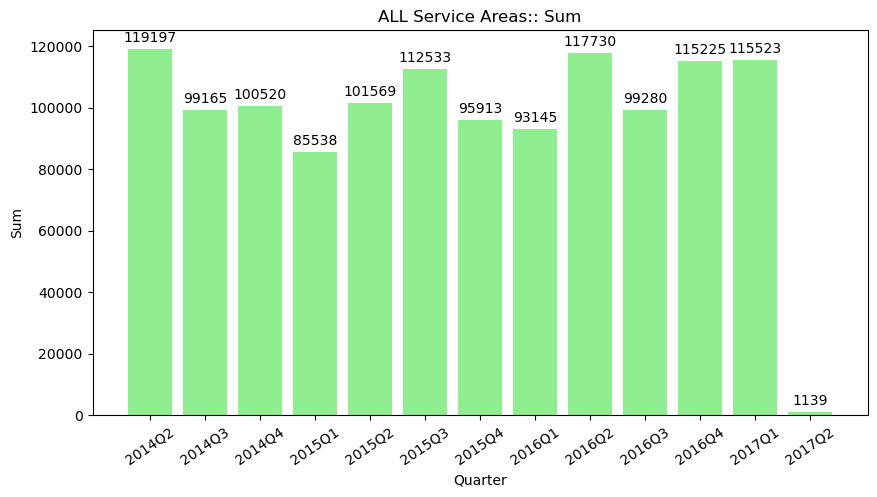

In [76]:
plot_count_transactions_per_quarter(df, group_function='sum', color='lightgreen', add_title='ALL Service Areas:')

__Insights from the Sum of Transactions per Quarter for All Service Areas:__
- Once again, we notice the lowest value at 2015Q1.
- The highest peaks differ from the transaction counts, because for the sum of totals we get peaks for 2014Q2, 2015Q3 and 2016Q2.
- The sum of transactions does not show a clear increasing or decreasing over time, it keeps fluctuating every 2-3 quarters.

Now we want to __plot specific Service Areas, let's plot each of them.__

For that we have defined a function that __loops through the service areas__ and re-uses the previous function to plot the count and sum of transactions over time.

In [97]:
import random
import warnings
warnings.filterwarnings('ignore')

def plot_transactions_per_quarter_per_col(df,
                                          colname,
                                          group_function='count',
                                          x_labels=[],
                                          plot_size=(10, 2),
                                          colors=['blue']):
    # save unique values of column
    uniques = df[colname].unique()
    
    # loop through service area unique values and plot the values per quarter
    for u in uniques:
        df_filter = df[colname] == u
        color = random.choice(colors)
        plot_count_transactions_per_quarter(df[df_filter],
                                            add_title=colname.upper() + ': ' + u,
                                            group_function=group_function,
                                            color=color,
                                            plot_size=plot_size,
                                            x_labels=quarter_labels)
        
    plt.tight_layout()
    plt.close()
        
quarter_labels = ['2014Q2', '2014Q3', '2014Q4', '2015Q1', '2015Q2', '2015Q3', '2015Q4','2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2']

COUNTING TRANSACTIONS PER SERVICE AREA


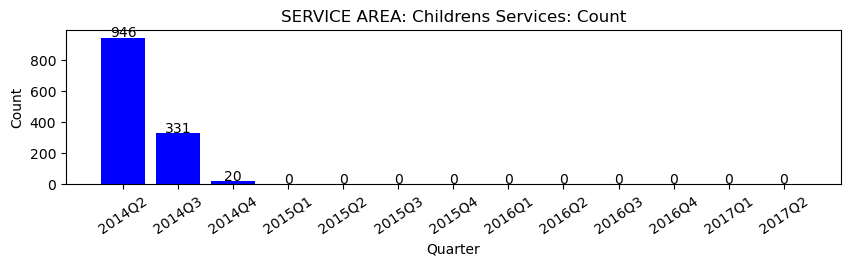

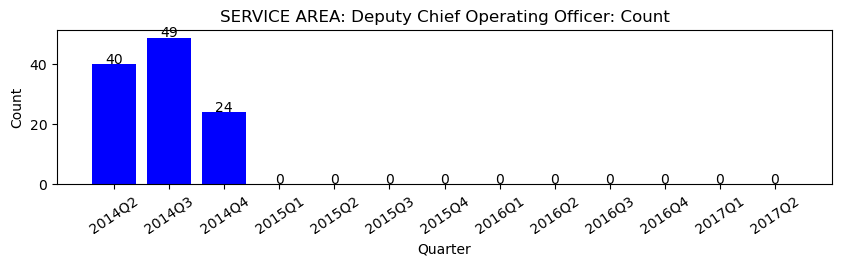

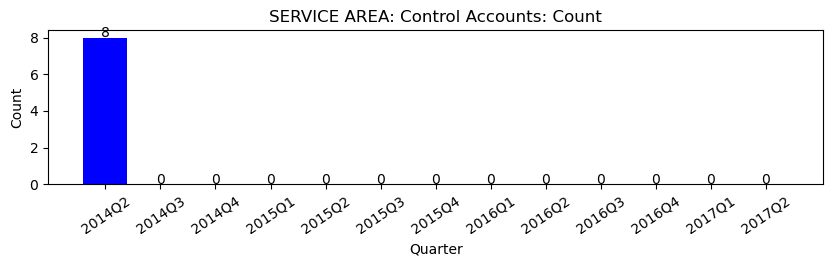

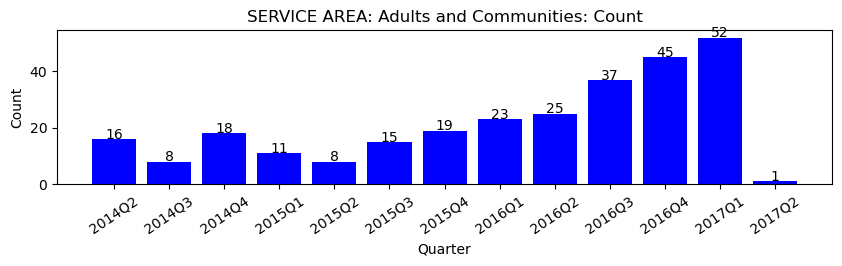

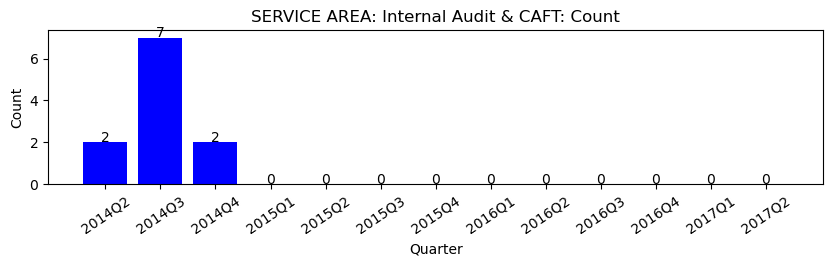

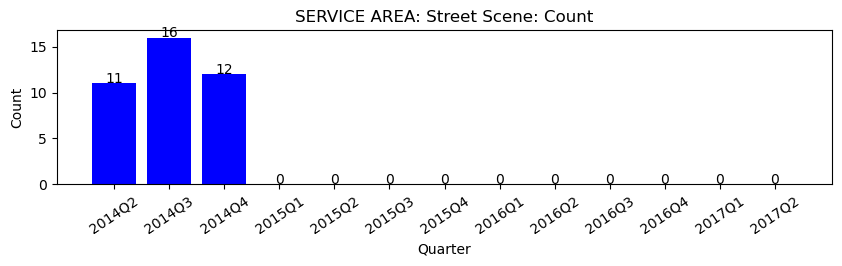

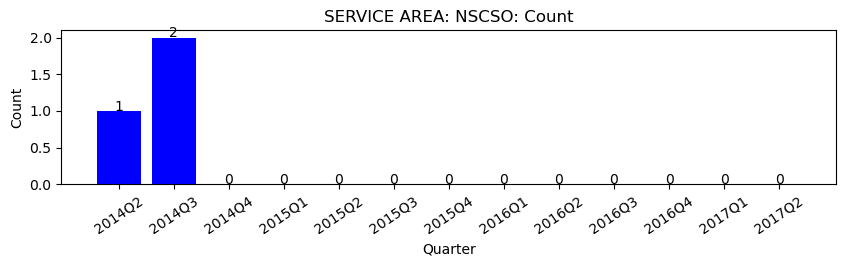

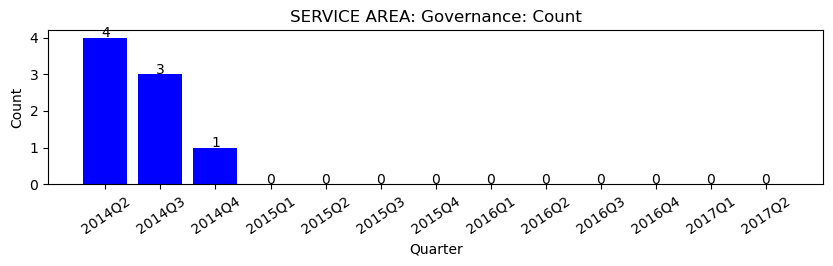

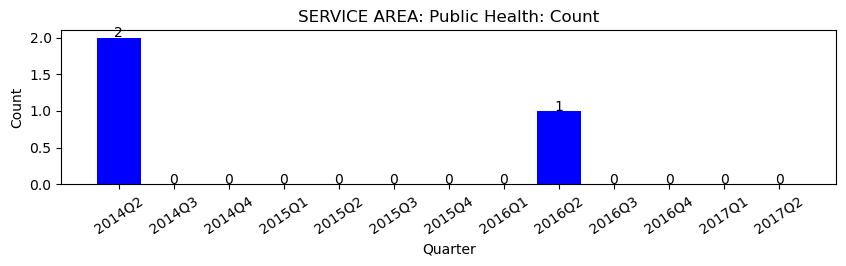

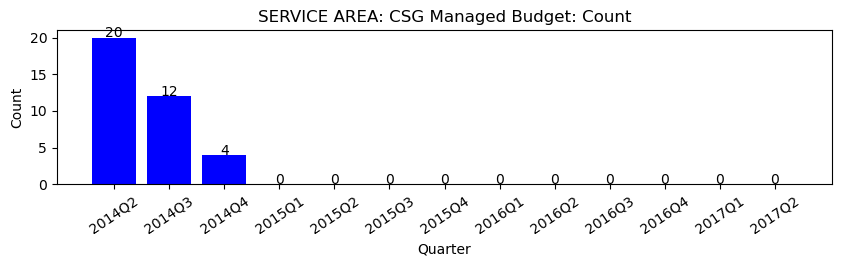

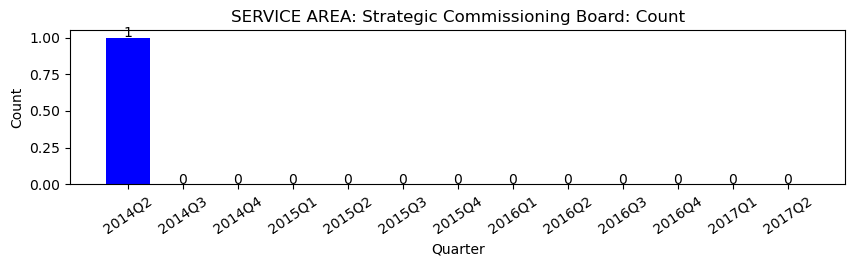

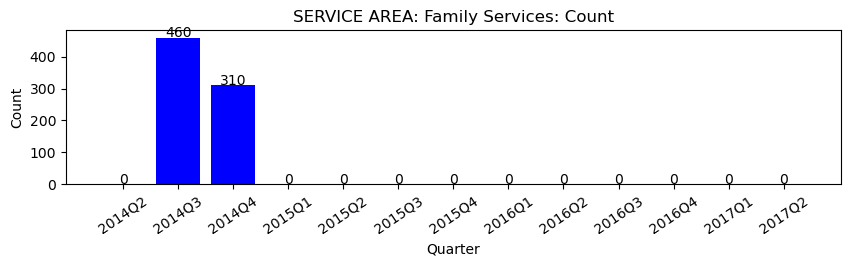

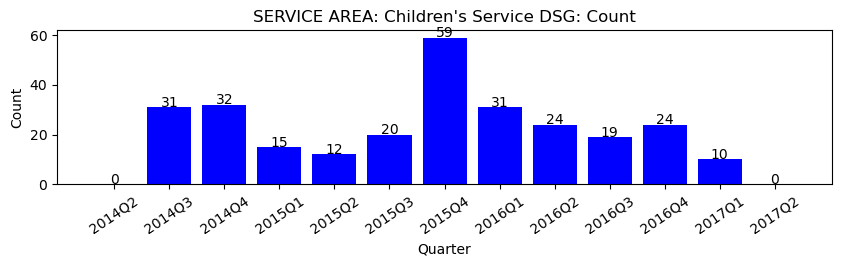

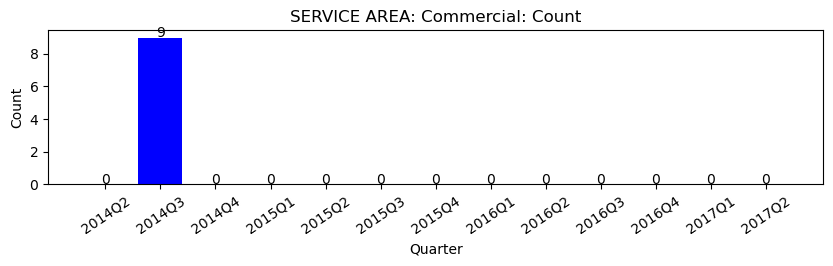

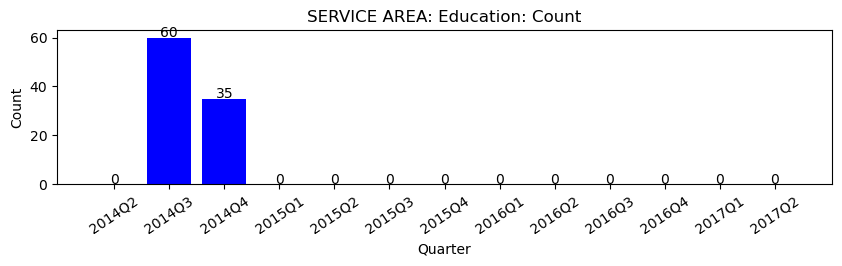

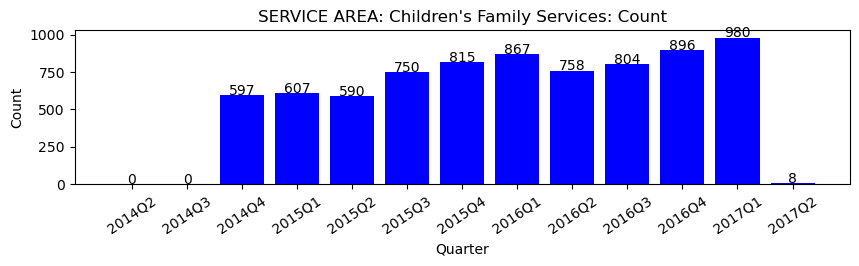

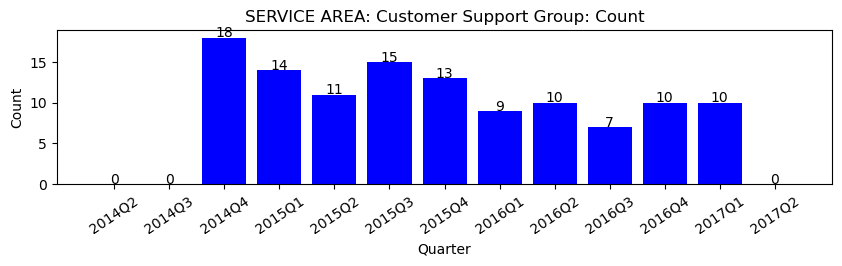

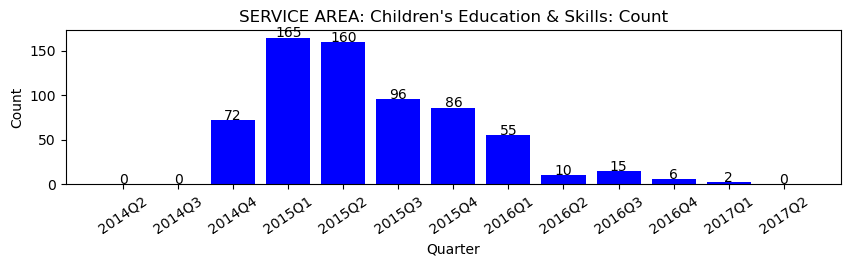

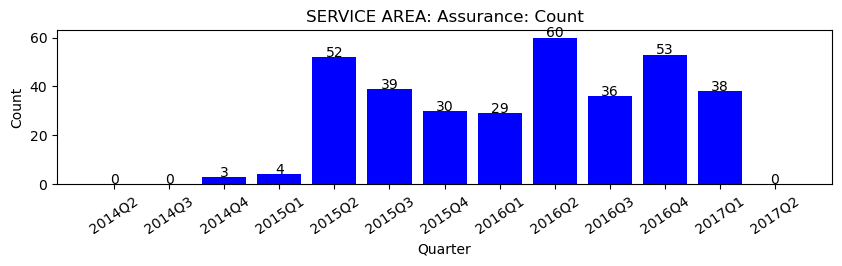

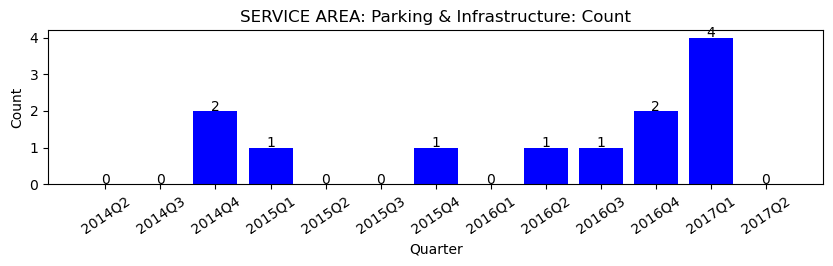

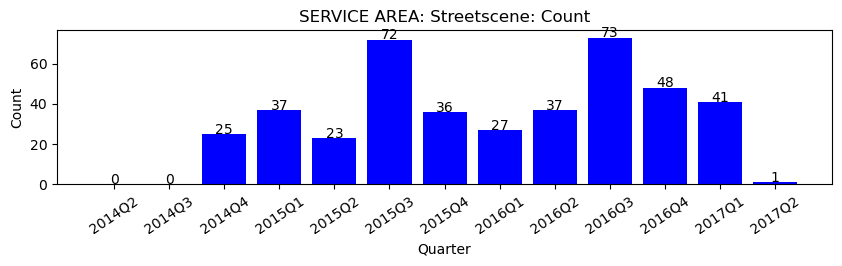

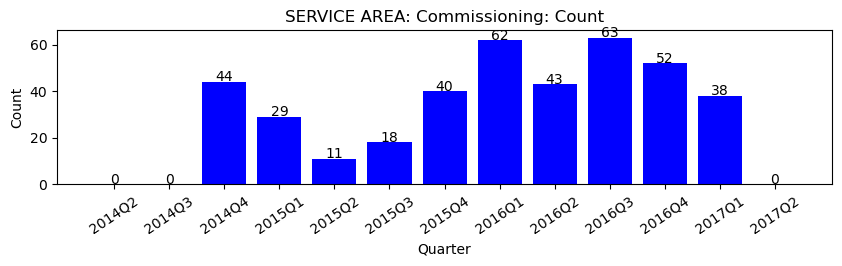

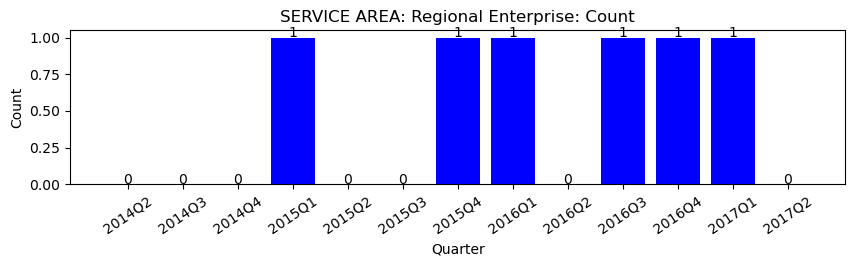

In [78]:
print("COUNTING TRANSACTIONS PER SERVICE AREA")
plot_transactions_per_quarter_per_col(df, 'Service Area', x_labels=quarter_labels, group_function='count')

From the plots we noticed that the __following Service Areas stop having transactions ever since 2015__:
- Childrens Services
- Deputy Chief Operating
- Control Accounts
- Internal Audit & CAFT
- Street Scene
- NSCSO
- Governance
- CSG Managed Budget
- Family Services
- Count
- Education

On the other hand the transactions from the following __service areas have increased over time__ for every quarter:
- Adults and Communities
- Children Family Services

These next __service areas have been reducing the amount of transactions__ over time:
- Chlidren's Service DSG
- Customer Support Group
- Children's Education & Skils

Finally, the rest of service areas have __maintained their overall number of transactions__ over time.

__Now, let's visualize the Sum of the Transaction Amounts over time (per quarter).__

SUM OF TRANSACTIONS PER SERVICE AREA


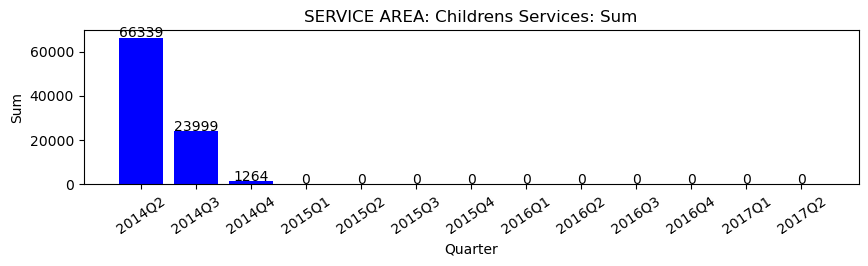

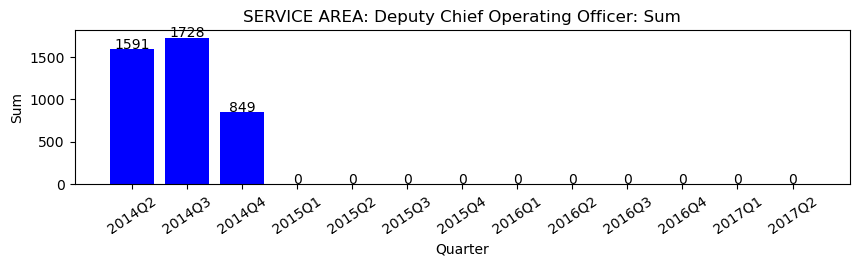

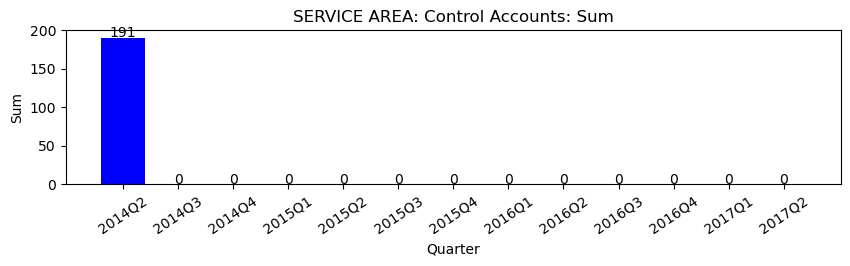

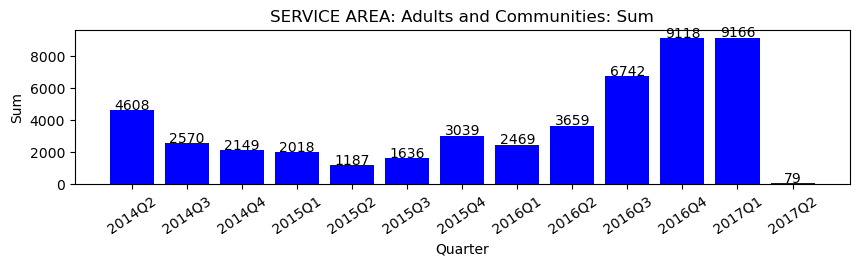

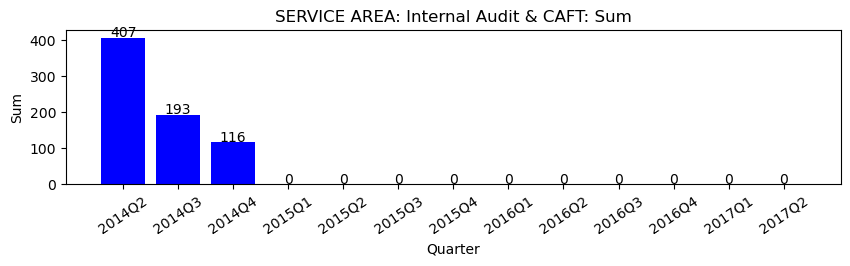

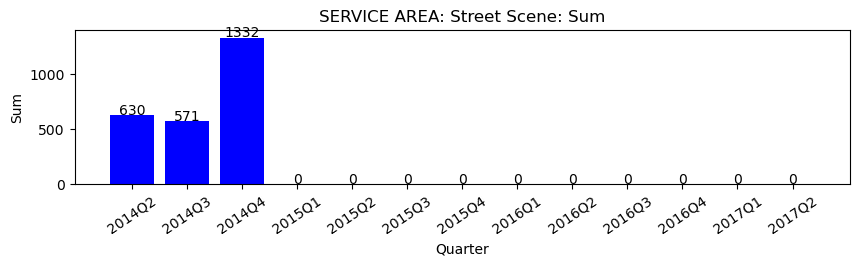

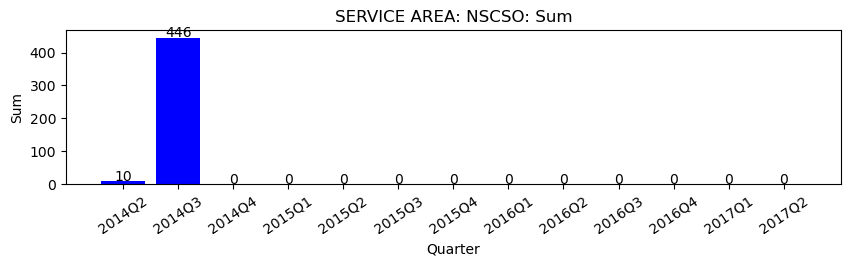

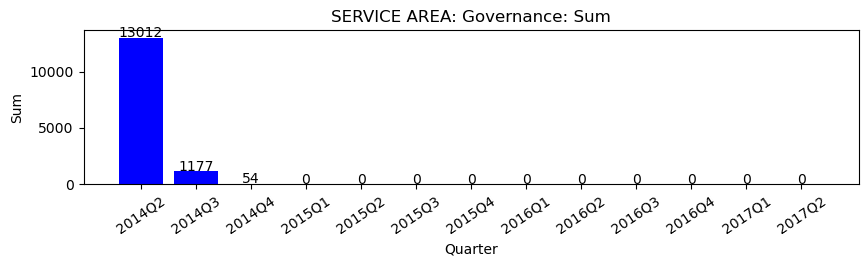

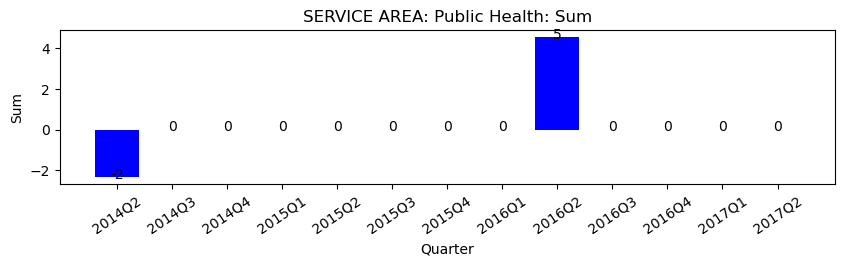

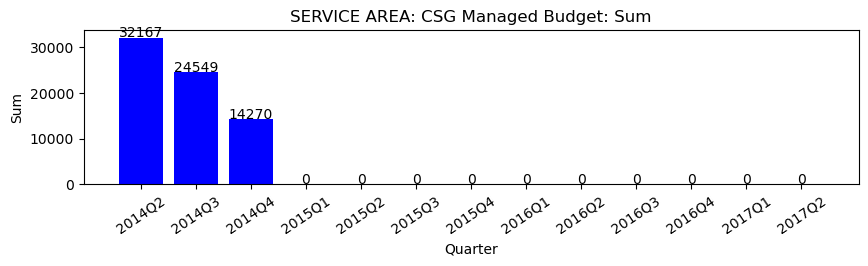

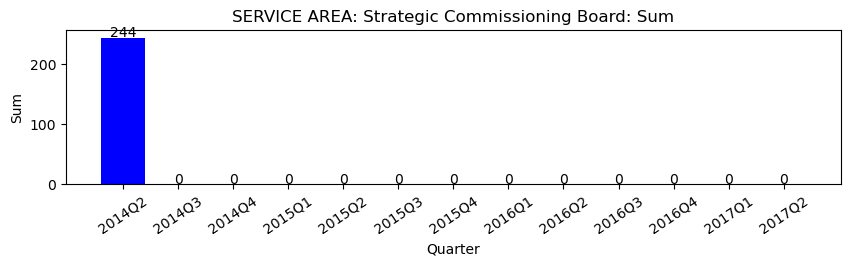

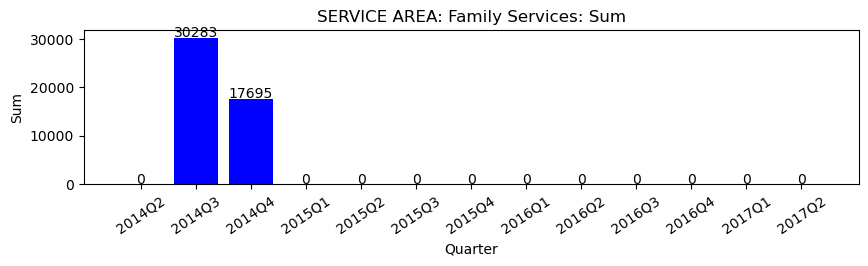

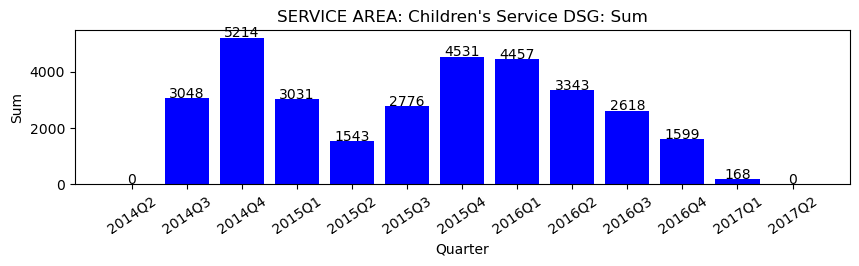

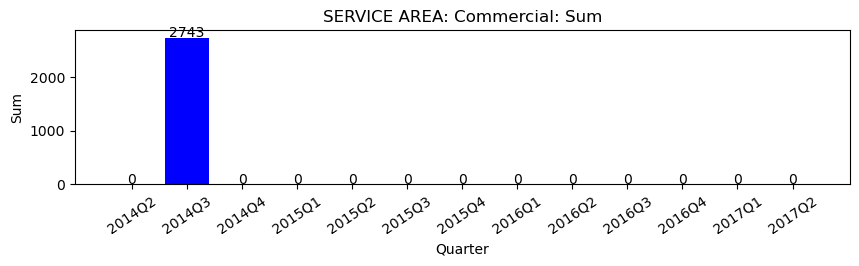

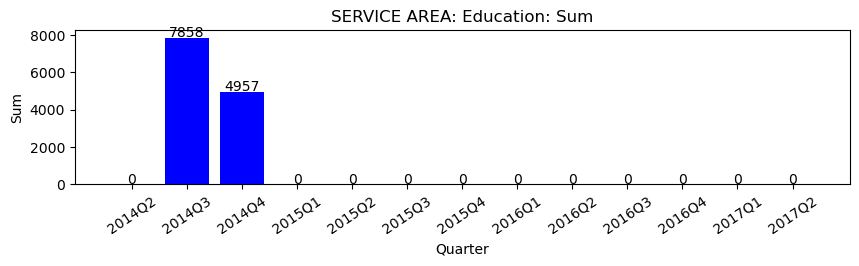

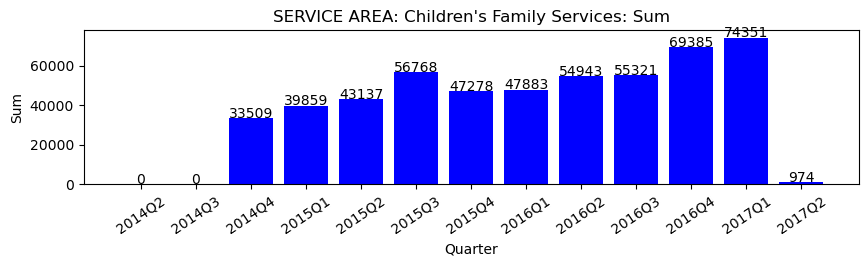

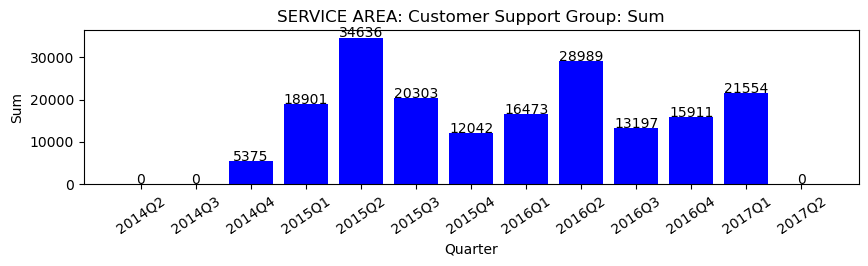

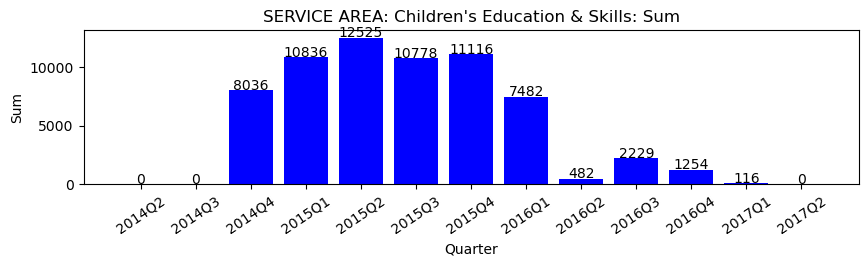

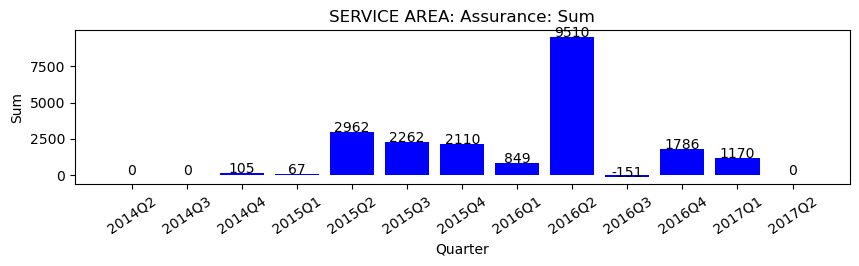

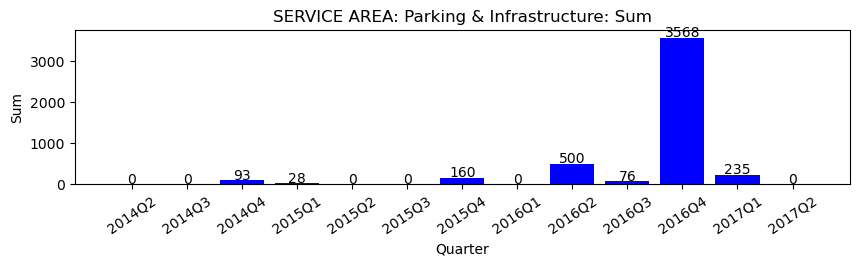

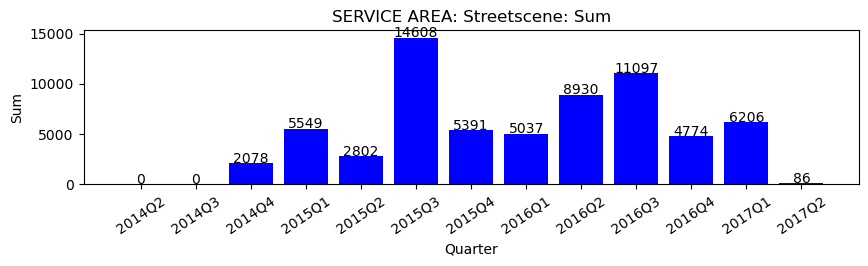

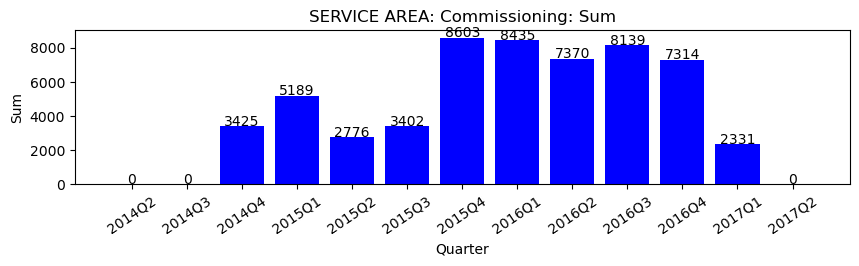

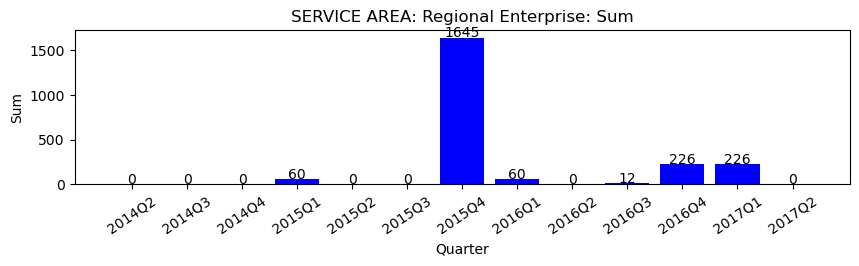

In [79]:
print("SUM OF TRANSACTIONS PER SERVICE AREA")
plot_transactions_per_quarter_per_col(df, 'Service Area', x_labels=quarter_labels, group_function='sum')

__Interesting insights from the sum of transaction amounts per service area:__
- __Adults & Communities__ and __Children Family Services__ service areas are showing a significant increase since 2016. The bar plots indicate the transactions will keep growing.
- The __Children Education & Skills__ and __Children's Service DSG__ service areas sum of transactions have decreased and now present nearly zero values.
- The __Assurance__ service area shows an interesting huge peak for the 2016Q2 quarter.

Our auditor is also requiring a summary table containing relevant statistics from the service areas. Specifically, we will display:
- __transaction counts__
- __sum of transaction amounts__
- __average of transactions__

In [81]:
# using crosstab to display the transaction counts per service area per quarter
pd.crosstab(df['Service Area'], [df['Quarter']], values=df['Total'], aggfunc=np.count_nonzero, margins=True)

Quarter                         2014Q2  2014Q3  2014Q4  2015Q1  2015Q2  \
Service Area                                                             
Adults and Communities            16.0     8.0    18.0    11.0     8.0   
Assurance                          NaN     NaN     3.0     4.0    52.0   
CSG Managed Budget                20.0    12.0     4.0     NaN     NaN   
Children's Education & Skills      NaN     NaN    72.0   165.0   160.0   
Children's Family Services         NaN     NaN   597.0   607.0   590.0   
Children's Service DSG             NaN    31.0    32.0    15.0    12.0   
Childrens Services               946.0   331.0    20.0     NaN     NaN   
Commercial                         NaN     9.0     NaN     NaN     NaN   
Commissioning                      NaN     NaN    44.0    29.0    11.0   
Control Accounts                   8.0     NaN     NaN     NaN     NaN   
Customer Support Group             NaN     NaN    18.0    14.0    11.0   
Deputy Chief Operating Officer    40.0    49.0    24.0     NaN     NaN   
Education                          NaN    60.0    35.0     NaN     NaN   
Family Services                    NaN   460.0   310.0     NaN     NaN   
Governance                         4.0     3.0     1.0     NaN     NaN   
HRA                                NaN     NaN     NaN     NaN     NaN   
Internal Audit & CAFT              2.0     7.0     2.0     NaN     NaN   
NSCSO                              1.0     2.0     NaN     NaN     NaN   
Parking & Infrastructure           NaN     NaN     2.0     1.0     NaN   
Public Health                      2.0     NaN     NaN     NaN     NaN   
Regional Enterprise                NaN     NaN     NaN     1.0     NaN   
Strategic Commissioning Board      1.0     NaN     NaN     NaN     NaN   
Street Scene                      11.0    16.0    12.0     NaN     NaN   
Streetscene                        NaN     NaN    25.0    37.0    23.0   
All                             1051.0   988.0  1219.0   884.0   867.0   

Quarter                         2015Q3  2015Q4  2016Q1  2016Q2  2016Q3  \
Service Area                                                             
Adults and Communities            15.0    19.0    23.0    25.0    37.0   
Assurance                         39.0    30.0    29.0    60.0    36.0   
CSG Managed Budget                 NaN     NaN     NaN     NaN     NaN   
Children's Education & Skills     96.0    86.0    55.0    10.0    15.0   
Children's Family Services       750.0   814.0   867.0   758.0   804.0   
Children's Service DSG            20.0    59.0    31.0    24.0    19.0   
Childrens Services                 NaN     NaN     NaN     NaN     NaN   
Commercial                         NaN     NaN     NaN     NaN     NaN   
Commissioning                     18.0    40.0    62.0    43.0    63.0   
Control Accounts                   NaN     NaN     NaN     NaN     NaN   
Customer Support Group            15.0    13.0     9.0    10.0     7.0   
Deputy Chief Operating Officer     NaN     NaN     NaN     NaN     NaN   
Education                          NaN     NaN     NaN     NaN     NaN   
Family Services                    NaN     NaN     NaN     NaN     NaN   
Governance                         NaN     NaN     NaN     NaN     NaN   
HRA                                NaN     NaN     NaN     NaN     NaN   
Internal Audit & CAFT              NaN     NaN     NaN     NaN     NaN   
NSCSO                              NaN     NaN     NaN     NaN     NaN   
Parking & Infrastructure           NaN     1.0     NaN     1.0     1.0   
Public Health                      NaN     NaN     NaN     1.0     NaN   
Regional Enterprise                NaN     1.0     1.0     NaN     1.0   
Strategic Commissioning Board      NaN     NaN     NaN     NaN     NaN   
Street Scene                       NaN     NaN     NaN     NaN     NaN   
Streetscene                       72.0    36.0    27.0    37.0    73.0   
All                             1025.0  1099.0  1104.0   969.0  1056.0   

Qu

In [83]:
# using crosstab to display the transaction sum per service area per quarter
pd.crosstab(df['Service Area'], [df['Quarter']], values=df['Total'], aggfunc=np.sum, margins=True)

Quarter                            2014Q2    2014Q3     2014Q4    2015Q1  \
Service Area                                                               
Adults and Communities            4608.00   2570.45    2149.33   2017.86   
Assurance                             NaN       NaN     105.34     67.45   
CSG Managed Budget               32167.34  24549.00   14270.00       NaN   
Children's Education & Skills         NaN       NaN    8035.56  10836.12   
Children's Family Services            NaN       NaN   33508.71  39858.59   
Children's Service DSG                NaN   3047.75    5213.69   3030.71   
Childrens Services               66339.06  23999.07    1264.11       NaN   
Commercial                            NaN   2743.05        NaN       NaN   
Commissioning                         NaN       NaN    3425.41   5189.44   
Control Accounts                   190.71       NaN        NaN       NaN   
Customer Support Group                NaN       NaN    5375.31  18900.97   
Deputy Chief Operating Officer    1591.24   1728.23     848.91       NaN   
Education                             NaN   7858.45    4956.69       NaN   
Family Services                       NaN  30283.29   17694.70       NaN   
Governance                       13011.60   1176.96      53.94       NaN   
HRA                                   NaN       NaN        NaN       NaN   
Internal Audit & CAFT              407.20    192.95     116.00       NaN   
NSCSO                               10.00    445.50        NaN       NaN   
Parking & Infrastructure              NaN       NaN      92.82     28.43   
Public Health                       -2.35       NaN        NaN       NaN   
Regional Enterprise                   NaN       NaN        NaN     60.00   
Strategic Commissioning Board      244.00       NaN        NaN       NaN   
Street Scene                       630.08    570.63    1331.55       NaN   
Streetscene                           NaN       NaN    2078.24   5548.83   
All                             119196.88  99165.33  100520.31  85538.40   

Quarter                            2015Q2     2015Q3    2015Q4    2016Q1  \
Service Area                                                               
Adults and Communities            1187.40    1635.85   3039.03   2468.52   
Assurance                         2962.10    2262.28   2110.01    849.28   
CSG Managed Budget                    NaN        NaN       NaN       NaN   
Children's Education & Skills    12524.97   10777.72  11115.55   7481.79   
Children's Family Services       43137.14   56767.84  47277.81  47883.39   
Children's Service DSG            1543.27    2776.49   4530.62   4457.30   
Childrens Services                    NaN        NaN       NaN       NaN   
Commercial                            NaN        NaN       NaN       NaN   
Commissioning                     2776.29    3401.85   8602.64   8434.73   
Control Accounts                      NaN        NaN       NaN       NaN   
Customer Support Group           34636.00   20302.63  12041.55  16472.82   
Deputy Chief Operating Officer        NaN        NaN       NaN       NaN   
Education                             NaN        NaN       NaN       NaN   
Family Services                       NaN        NaN       NaN       NaN   
Governance                            NaN        NaN       NaN       NaN   
HRA                                   NaN        NaN       NaN       NaN   
Internal Audit & CAFT                 NaN        NaN       NaN       NaN   
NSCSO                                 NaN        NaN       NaN       NaN   
Parking & Infrastructure              NaN        NaN    159.67       NaN   
Public Health                         NaN        NaN       NaN       NaN   
Regional Enterprise                   NaN        NaN   1645.00     60.00   
Strategic Commissioning Board         NaN        NaN       NaN       NaN   
Street Scene                          NaN        NaN       NaN       NaN   
Streetscene                       2801.73   146

In [84]:
# using crosstab to display the transaction averages per service area per quarter
pd.crosstab(df['Service Area'], [df['Quarter']], values=df['Total'], aggfunc=np.mean, margins=True)

Quarter                              2014Q2       2014Q3       2014Q4  \
Service Area                                                            
Adults and Communities           288.000000   321.306250   119.407222   
Assurance                               NaN          NaN    35.113333   
CSG Managed Budget              1608.367000  2045.750000  3567.500000   
Children's Education & Skills           NaN          NaN   111.605000   
Children's Family Services              NaN          NaN    56.128492   
Children's Service DSG                  NaN    98.314516   162.927813   
Childrens Services                70.125856    72.504743    63.205500   
Commercial                              NaN   304.783333          NaN   
Commissioning                           NaN          NaN    77.850227   
Control Accounts                  23.838750          NaN          NaN   
Customer Support Group                  NaN          NaN   298.628333   
Deputy Chief Operating Officer    39.781000    35.270000    35.371250   
Education                               NaN   130.974167   141.619714   
Family Services                         NaN    65.833239    57.079677   
Governance                      3252.900000   392.320000    53.940000   
HRA                                     NaN          NaN          NaN   
Internal Audit & CAFT            203.600000    27.564286    58.000000   
NSCSO                             10.000000   222.750000          NaN   
Parking & Infrastructure                NaN          NaN    46.410000   
Public Health                     -1.175000          NaN          NaN   
Regional Enterprise                     NaN          NaN          NaN   
Strategic Commissioning Board    244.000000          NaN          NaN   
Street Scene                      57.280000    35.664375   110.962500   
Streetscene                             NaN          NaN    83.129600   
All                              113.412826   100.369767    82.461288   

Quarter                              2015Q1       2015Q2       2015Q3  \
Service Area                                                            
Adults and Communities           183.441818   148.425000   109.056667   
Assurance                         16.862500    56.963462    58.007179   
CSG Managed Budget                      NaN          NaN          NaN   
Children's Education & Skills     65.673455    78.281062   112.267917   
Children's Family Services        65.664893    73.113797    75.690453   
Children's Service DSG           202.047333   128.605833   138.824500   
Childrens Services                      NaN          NaN          NaN   
Commercial                              NaN          NaN          NaN   
Commissioning                    178.946207   252.390000   188.991667   
Control Accounts                        NaN          NaN          NaN   
Customer Support Group          1350.069286  3148.727273  1353.508667   
Deputy Chief Operating Officer          NaN          NaN          NaN   
Education                               NaN          NaN          NaN   
Family Services                         NaN          NaN          NaN   
Governance                              NaN          NaN          NaN   
HRA                                     NaN          NaN          NaN   
Internal Audit & CAFT                   NaN          NaN          NaN   
NSCSO                                   NaN          NaN          NaN   
Parking & Infrastructure          28.430000          NaN          NaN   
Public Health                           NaN          NaN          NaN   
Regional Enterprise               60.000000          NaN          NaN   
Strategic Commissioning Board           NaN          NaN          NaN   
Street Scene                            NaN          NaN          NaN   
Streetscene                      149.968378   121.814348   202.895556   
All                               96.762896   117.149827   109.788429   

Quarter                              2015Q4       2016Q1

From these tables __we can extract exactly the amounts that the auditor are interested in__.

For instance, __all service areas through every quarter are being displayed__.

For now we have shown the __count, sum, and average (mean)__ of transactions, let's __display some more statistics per service area.__

In [85]:
# describe Total column per service area
df.groupby('Service Area').describe()['Total']

count         mean          std      min  \
Service Area                                                                
Adults and Communities           278.0   174.245791   372.035453   -16.22   
Assurance                        344.0    60.090698   277.745208 -1315.20   
CSG Managed Budget                36.0  1971.842778  2436.480313   -44.99   
Children's Education & Skills    667.0    97.230255   146.331044  -301.35   
Children's Family Services      7672.0    68.223004   130.915316  -971.70   
Children's Service DSG           277.0   116.708556   162.782702   -50.69   
Childrens Services              1297.0    70.626245   215.164655  -500.00   
Commercial                         9.0   304.783333   437.660009  -450.00   
Commissioning                    400.0   142.462600   388.228816 -1184.85   
Control Accounts                   8.0    23.838750    31.462986     3.06   
Customer Support Group           117.0  1601.541538  2720.431370 -4707.00   
Deputy Chief Operating Officer   113.0    36.888319    72.427270     2.15   
Education                         95.0   134.896211   170.098092     0.50   
Family Services                  770.0    62.309078   112.718449  -133.20   
Governance                         8.0  1780.312500  2848.261569    53.94   
HRA                                1.0   289.940000          NaN   289.94   
Internal Audit & CAFT             11.0    65.104545   115.227128     4.00   
NSCSO                              3.0   151.833333   145.103699    10.00   
Parking & Infrastructure          12.0   388.341667   787.318313    11.78   
Public Health                      3.0     0.733333    12.567451   -13.30   
Regional Enterprise                6.0   371.500000   630.467684    12.00   
Strategic Commissioning Board      1.0   244.000000          NaN   244.00   
Street Scene                      39.0    64.929744    79.292731     2.99   
Streetscene                      420.0   158.470310   180.889365  -583.12   

                                     25%      50%        75%       max  
Service Area                                                            
Adults and Communities           17.0000   47.975   128.0000   3569.03  
Assurance                         5.8300   11.600    33.7475   4342.20  
CSG Managed Budget              141.3225  630.900  4106.2500   8058.00  
Children's Education & Skills    13.8500   19.170   141.3850    987.47  
Children's Family Services        9.4875   24.920    76.4450   2262.91  
Children's Service DSG           19.9900   50.570   150.0000   1500.00  
Childrens Services                9.0000   23.080    67.6900   6000.00  
Commercial                       72.0000  262.750   594.0000   1008.00  
Commissioning                    19.9875   58.325   145.7750   3984.00  
Control Accounts                  4.1100    8.135    27.9775     83.31  
Customer Support Group          114.0000  300.000  2034.0000  15340.80  
Deputy Chief Operating Officer    6.0000   10.000    34.0000    460.00  
Education                        13.2300   44.500   237.4500    830.10  
Family Services                   7.8425   23.400    60.0000    989.29  
Governance                      138.8000  348.465  1957.0725   6388.20  
HRA                             289.9400  289.940   289.9400    289.94  
Internal Audit & CAFT            16.0000   23.400    46.5750    403.20  
NSCSO                            77.7500  145.500   222.7500    300.00  
Parking & Infrastructure         44.1775   72.095   244.7525   2773.25  
Public Health                    -4.3750    4.550     7.7500     10.95  
Regional Enterprise              60.0000  143.000   226.0000   1645.00  
Strategic Commissioning Board   244.0000  244.000   244.0000    244.00  
Street Scene                     13.7400   41.730    77.6600    400.00  
Streetscene                      40.7250  167.500   227.5000   2295.60

Using the describe method we were able to __display the following metrics per service area__:
- __standard deviation of sum of transactions__
- __min and max transaction amount__
- __quantiles__

__2.	The Auditor would like to get a view if there are any significant changes in spending behavior by Service Area and by Account. Changes in behavior could be spikes, but could also be permanent increases in the transaction amounts. Please identify instances of both or show that they do not exist in the data__

To explore more about the changes in spending behaviour for service areas and accounts,

let's __implement a function__ that allow us to __plot transactions over time for a specific year and service area / or account.__

This will be different from our previous plots because now we will be __able to visualize every single transaction__ over time.



In [143]:
def plot_transactions_per_quarter_over_time(df, year, year_colname='Year',
                                            quarter_colname='Quarter',
                                            date_colname='Transaction Date',
                                            total_colname='Total',
                                            color='blue',
                                            ylimits=[-300,1000],
                                            plot_size=(15,8),
                                            title=''):
    fig, axs = plt.subplots(2, 2, sharey=True, figsize = plot_size) # rows, columns

    # set the year data and the list of quarter names (e.g: ['2014Q2', '2014Q3', '2014Q4'])
    df_year = df[df[year_colname] == year]
    quarters = list(df_year[quarter_colname].unique())
    quarters = list(map(str, quarters))

    # i = index for the plots, qi = index for the quarters data
    # we separate both because for some years we won't have all quarters data
    i, qi = 0, 0 

    # loop through the subplots and plot the transaction amounts over time
    for row in axs:
        for ax in row:
            # set subplot title
            ax.set_title(title + '- Quarter ' + str(year) + '-Q' + str(i+1))

            # if quarter was not found in dataset just plot a watermark and update subplot index
            if qi >= len(quarters) or str(i+1) != quarters[qi][-1]:
                ax.text(0.5, 0.5, 'Quarter data not found', fontsize=25, transform=ax.transAxes, color='gray', alpha=0.8, ha='center', va='center', rotation=30)
                i += 1
                continue

            # filter only data from the year and quarter specified
            df_filter = df_year[quarter_colname] == quarters[qi]

            # set x and y for the subplot (total over time)
            x = df_year[df_filter][date_colname]
            y = df_year[df_filter][total_colname]

            # plot the subplot
            ax.bar(x, y, color=color, linestyle='-')

            # set subplot labels
            ax.set_xlabel(date_colname)  
            ax.set_ylabel(total_colname, rotation=90)
            ax.tick_params('x', labelrotation=45)

            # set gridlines and limit
            ax.grid(True, linestyle='-', alpha=0.85)
            #ax.set_ylim(ylimits)

            # as quarter data was found we need to update both indexes
            qi += 1
            i += 1
    plt.tight_layout()
    

In [169]:
# implement another function to loop through service areas and plot the transactions
def plot_transactions_per_quarter_over_time_per_servicearea(df,
                                                            year,
                                                            sa_colname='Service Area',
                                                            plot_size=(15,8),
                                                            colors=['blue'],
                                                            title=''):
    # sa = service area unique values
    sa_uniques = df[sa_colname].unique()
    
    # loop through service area unique values and plot the values per quarter
    for sa in sa_uniques:
        df_filter = df[sa_colname] == sa
        color = random.choice(colors)
        title_ = title + "'" + sa + "' "
        plot_transactions_per_quarter_over_time(df[df_filter],
                                                year,
                                                color=color,
                                                plot_size=plot_size,
                                                title=title_)
    plt.close()

# set a list of colors
colors = ['aqua', 'azure', 'blueviolet', 'brown', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate', 'coral',
          'cornflowerblue', 'crimson', 'darkblue', 'darkcyan']

Now that our functions are implemented,

due to the __high amount of service areas__, I've __decided to include only the top 5 service areas with most transactions for each year in the report__.

__However these functions are able to plot all service areas transaction fluctuations per quarter per year if needed.__

In [157]:
sas_2014 = list(df[df['Year'] == 2014]['Service Area'].value_counts().index)[:5]
df[df['Year'] == 2014]['Service Area'].value_counts()[:5]

Childrens Services                1297
Family Services                    770
Children's Family Services         597
Deputy Chief Operating Officer     113
Education                           95
Name: Service Area, dtype: int64

In [159]:
sas_2015 = list(df[df['Year'] == 2015]['Service Area'].value_counts().index)[:5]
df[df['Year'] == 2015]['Service Area'].value_counts()[:5]

Children's Family Services       2762
Children's Education & Skills     507
Streetscene                       168
Assurance                         125
Children's Service DSG            106
Name: Service Area, dtype: int64

In [158]:
sas_2016 = list(df[df['Year'] == 2016]['Service Area'].value_counts().index)[:5]
df[df['Year'] == 2016]['Service Area'].value_counts()[:5]

Children's Family Services    3325
Commissioning                  220
Streetscene                    185
Assurance                      178
Adults and Communities         130
Name: Service Area, dtype: int64

In [160]:
sas_2017 = list(df[df['Year'] == 2017]['Service Area'].value_counts().index)[:5]
df[df['Year'] == 2017]['Service Area'].value_counts()[:5]

Children's Family Services    988
Adults and Communities         53
Streetscene                    42
Commissioning                  38
Assurance                      38
Name: Service Area, dtype: int64

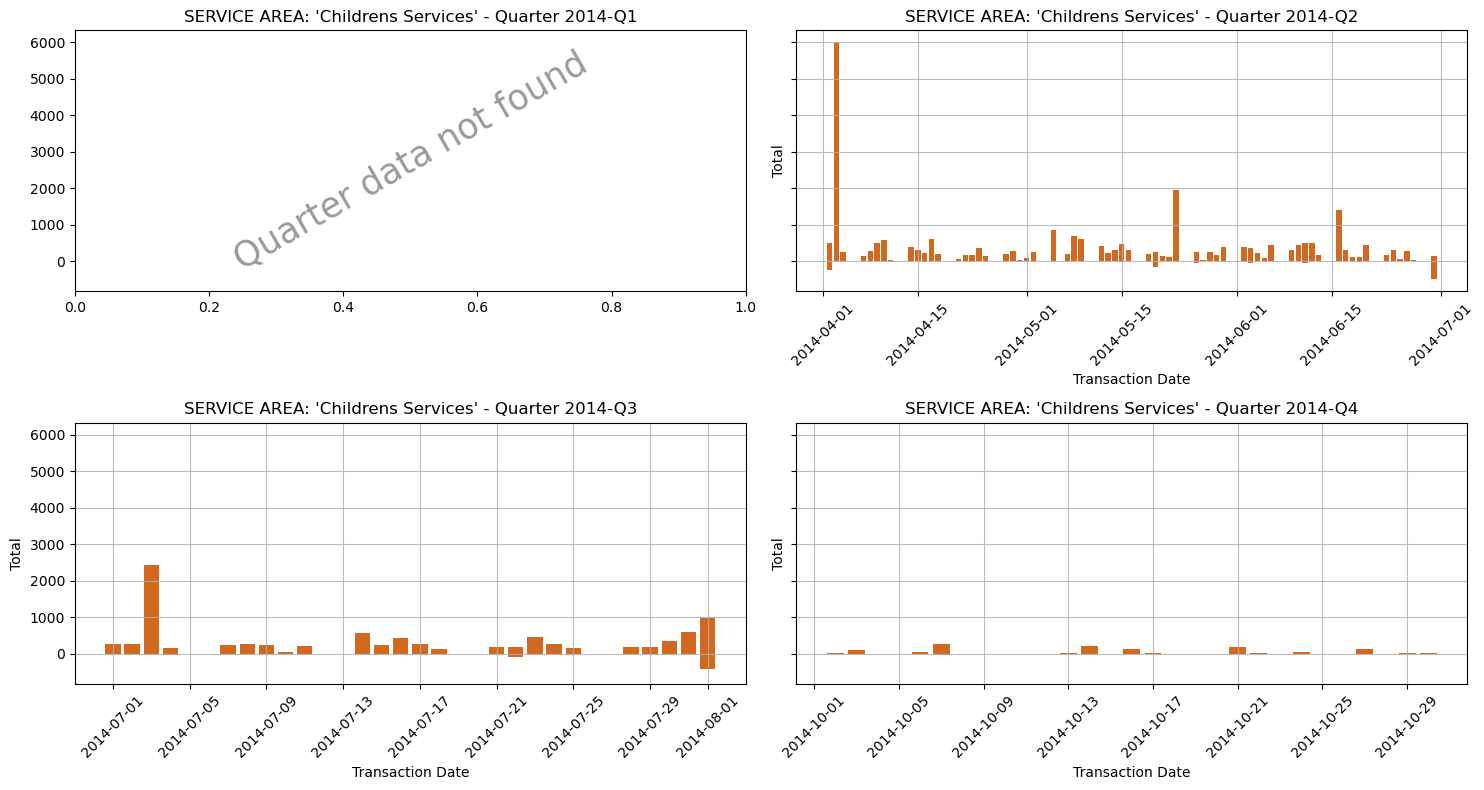

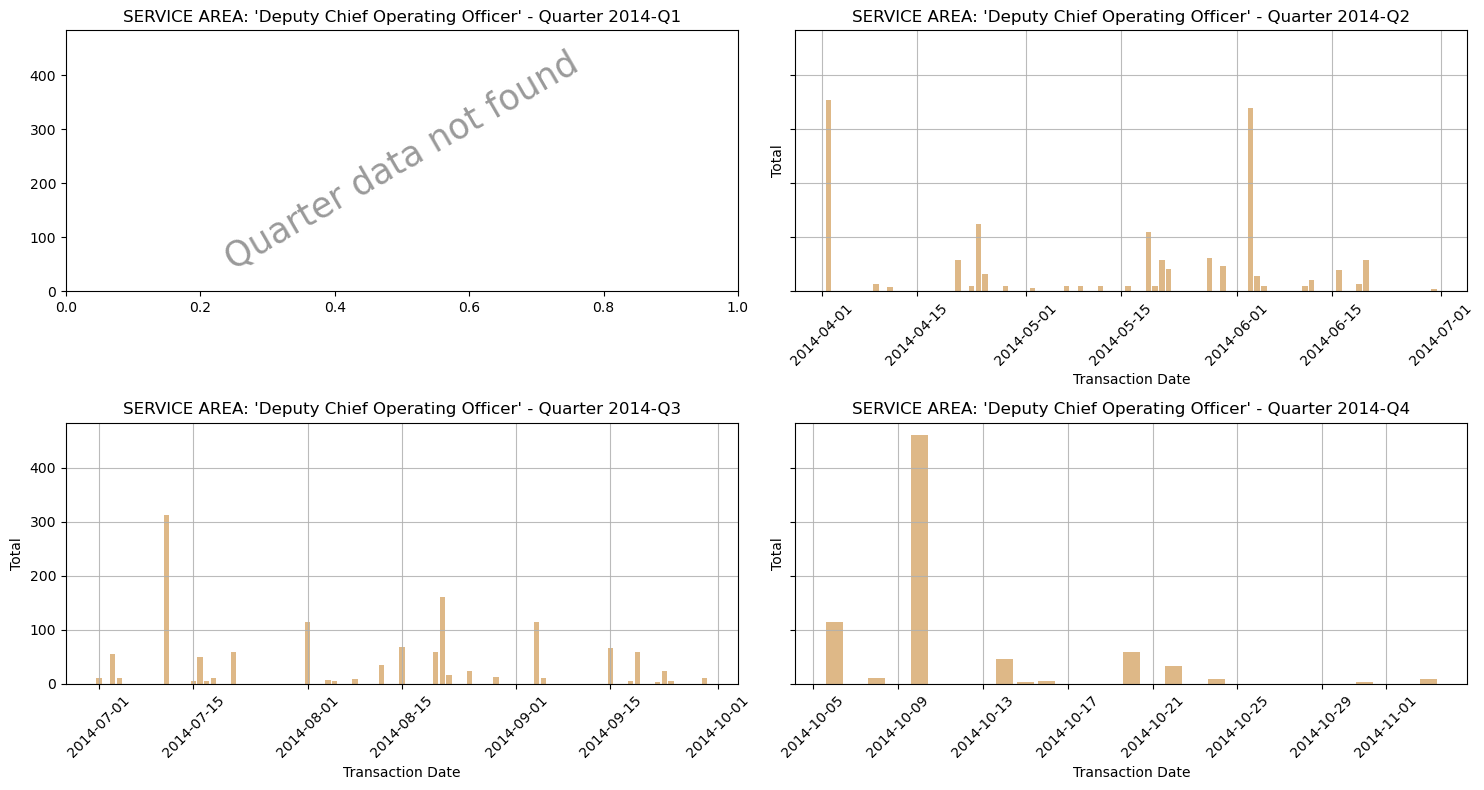

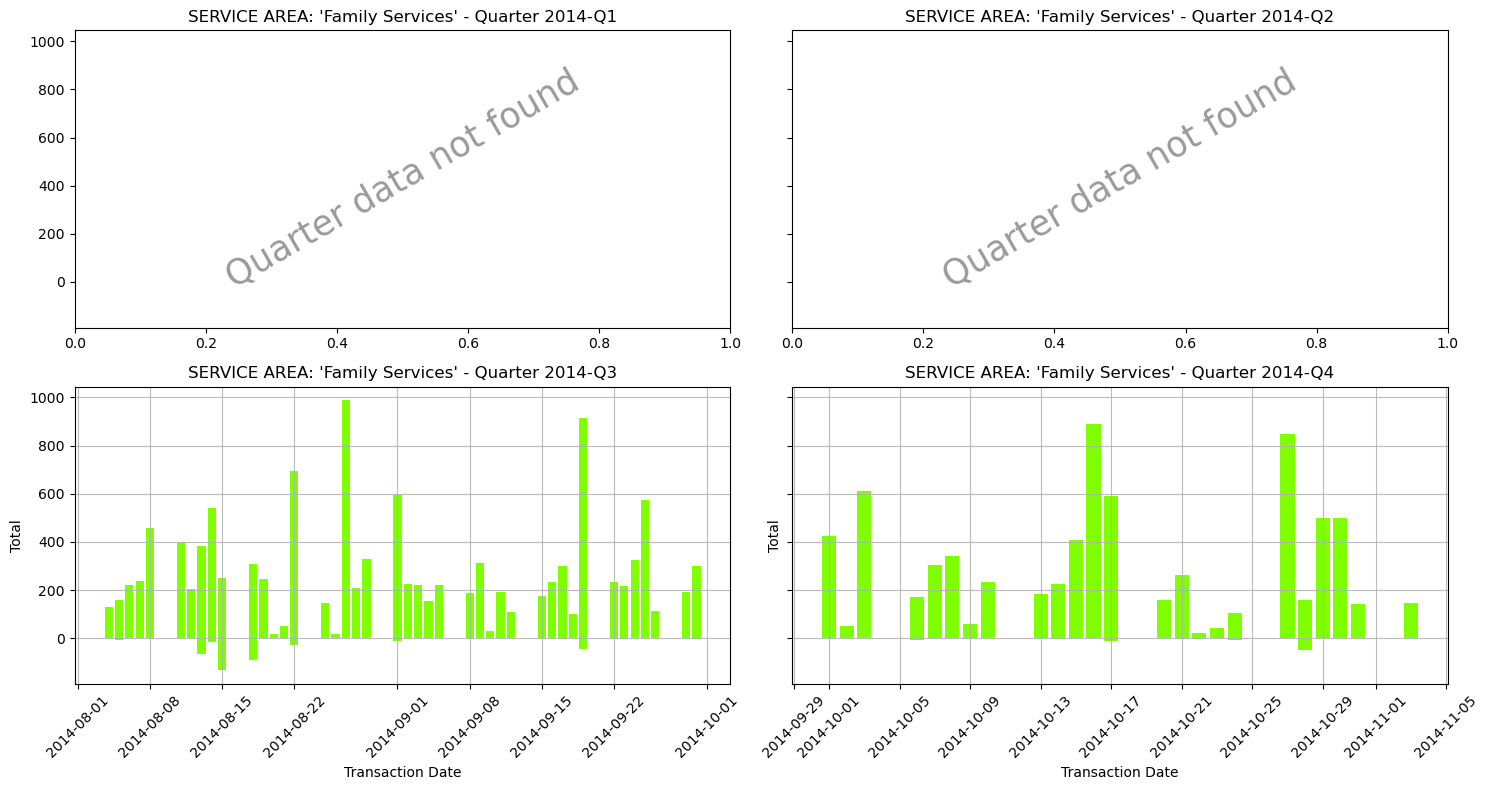

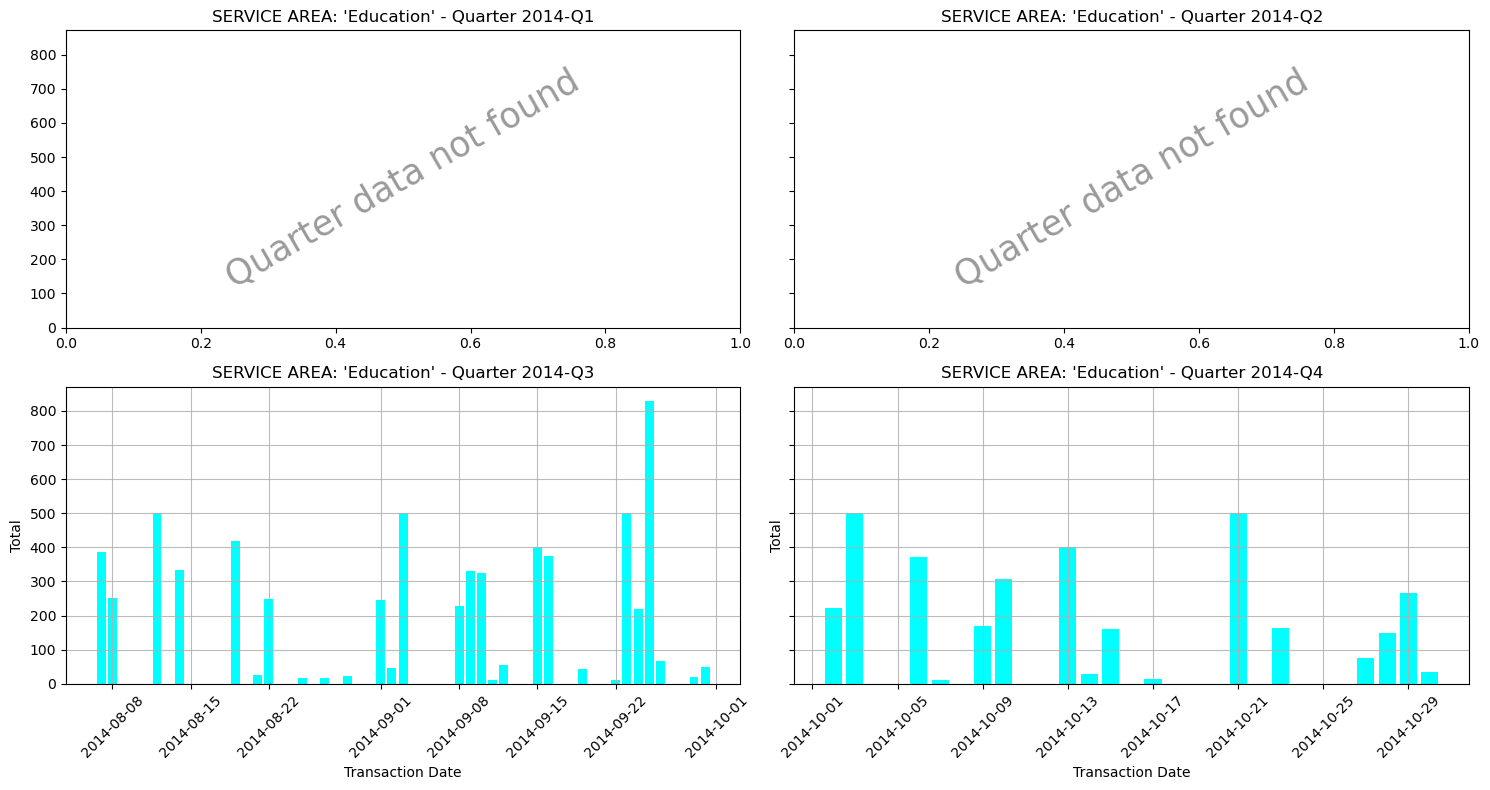

In [162]:
# plot transactions of 2014 per quarter per service area
plot_transactions_per_quarter_over_time_per_servicearea(df[df['Service Area'].isin(sas_2014)], 2014, colors=colors, title='SERVICE AREA: ')

__Insights from 2014 service area transactions:__
- In 2014 we find abnormal (unusually high) peaks for Children Services the start of Quarters 2 and 3, this means at the start of April and July.
- For Deputy Chief Operating Officer service area we have lots of unusual transactions on Quarters 2 and 3. These are unusually high amount transactions.
- Both Family Services and Education don't have data from the first half of the year, and the 2nd half does not contain significant peaks or unusual transactions.

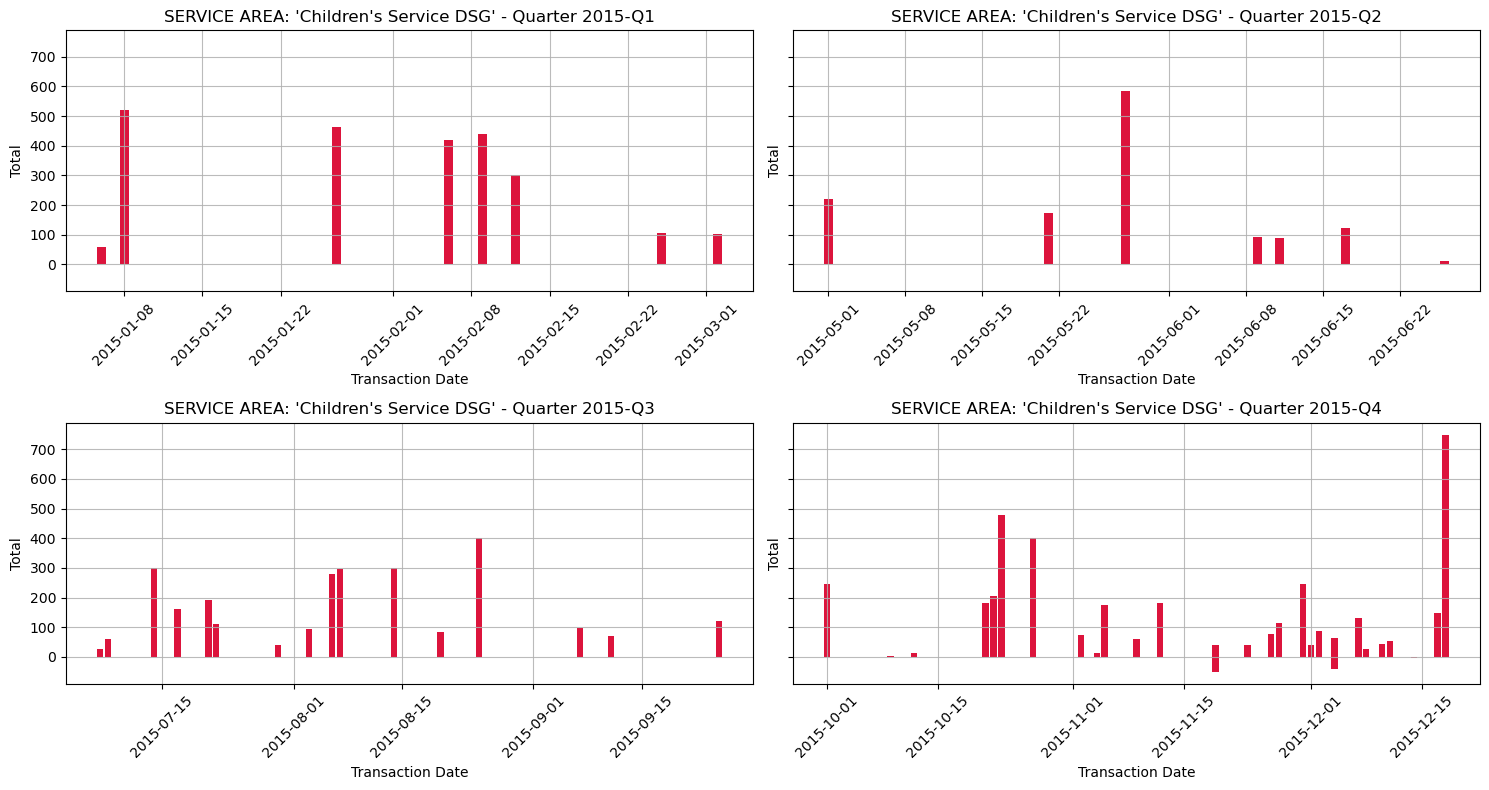

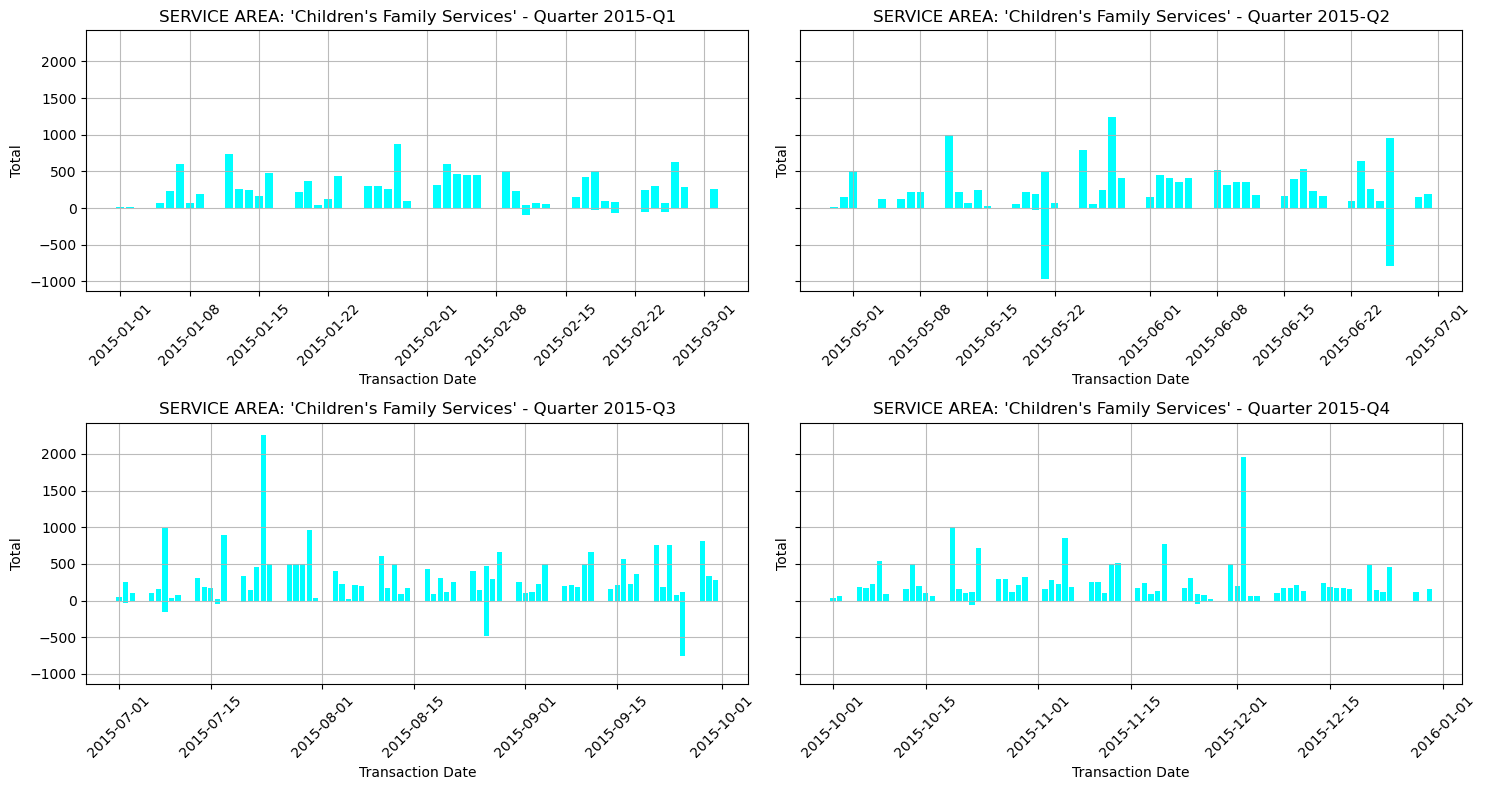

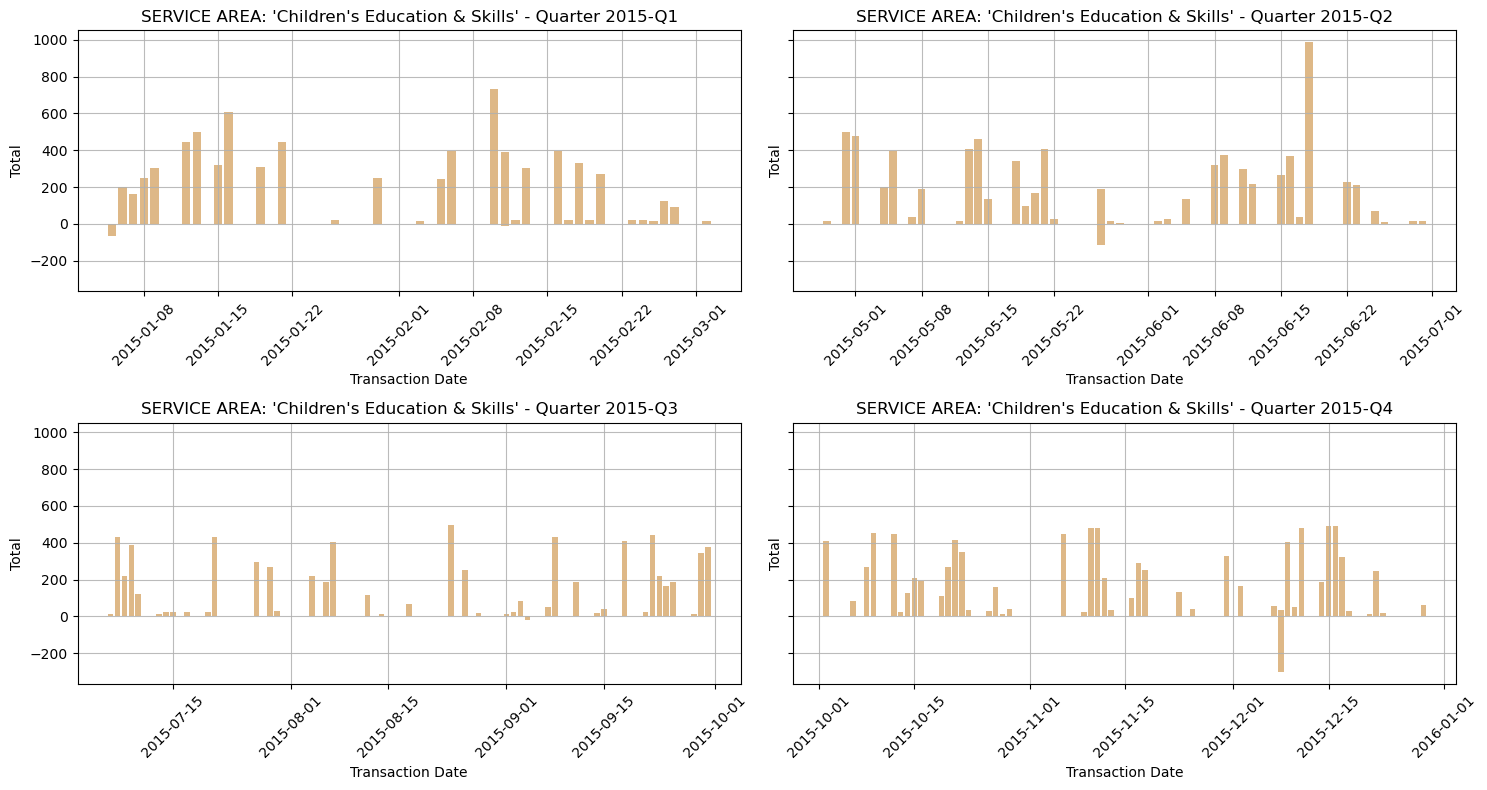

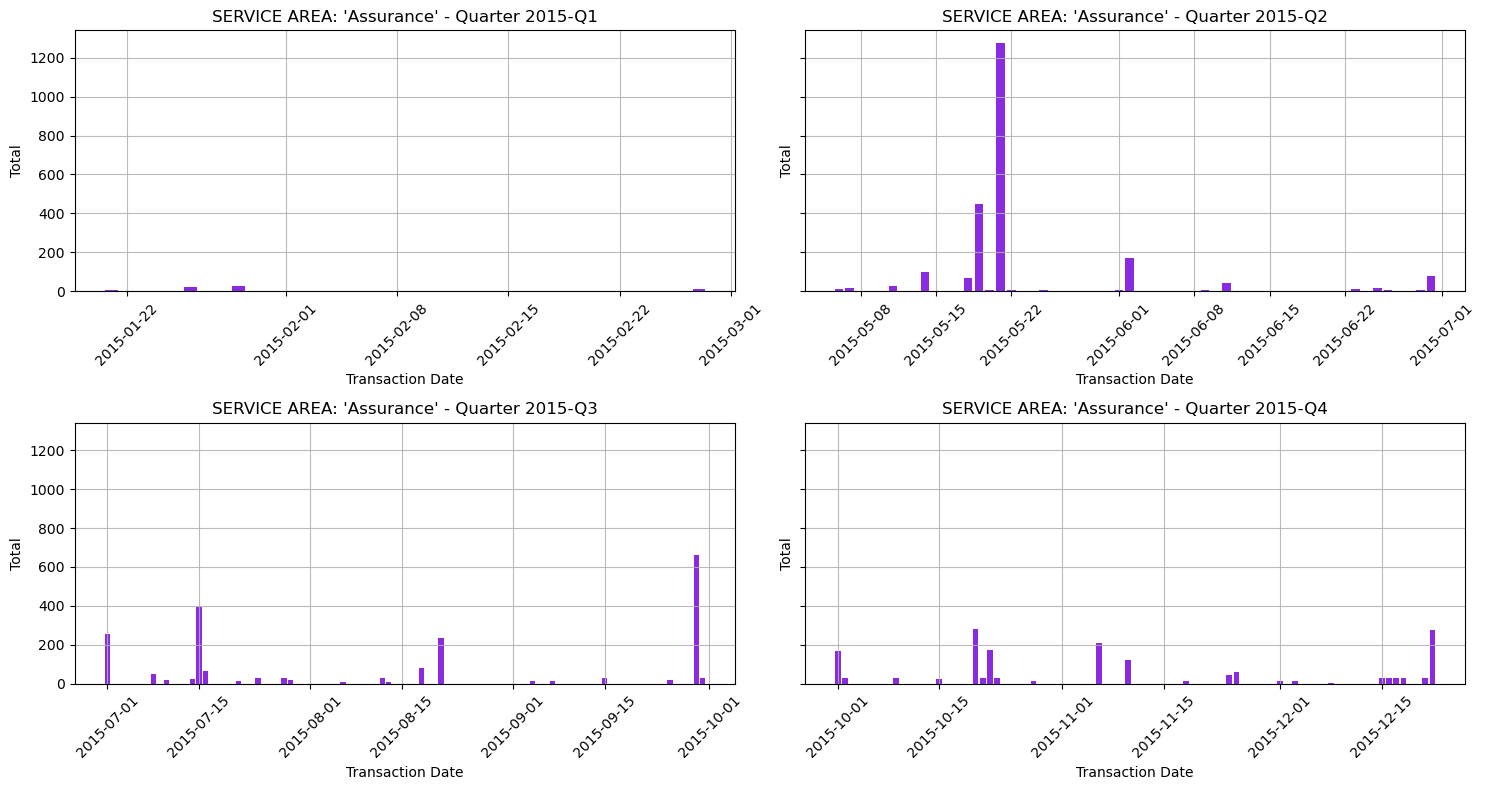

In [170]:
# plot transactions of 2015 per quarter per service area
plot_transactions_per_quarter_over_time_per_servicearea(df[df['Service Area'].isin(sas_2015)], 2015, colors=colors, title='SERVICE AREA: ')

__Insights from 2015 service area transactions:__
- For Children Service DSG, we see lots of high transaction peaks, however they seem to be very common and often across all quarters.
- For Children Family Services we visualize unusual negative transactions on Quarter 2.
- For Children Education & Skils and Assurance service areas we identified unusual peaks on the 2nd Quarter.

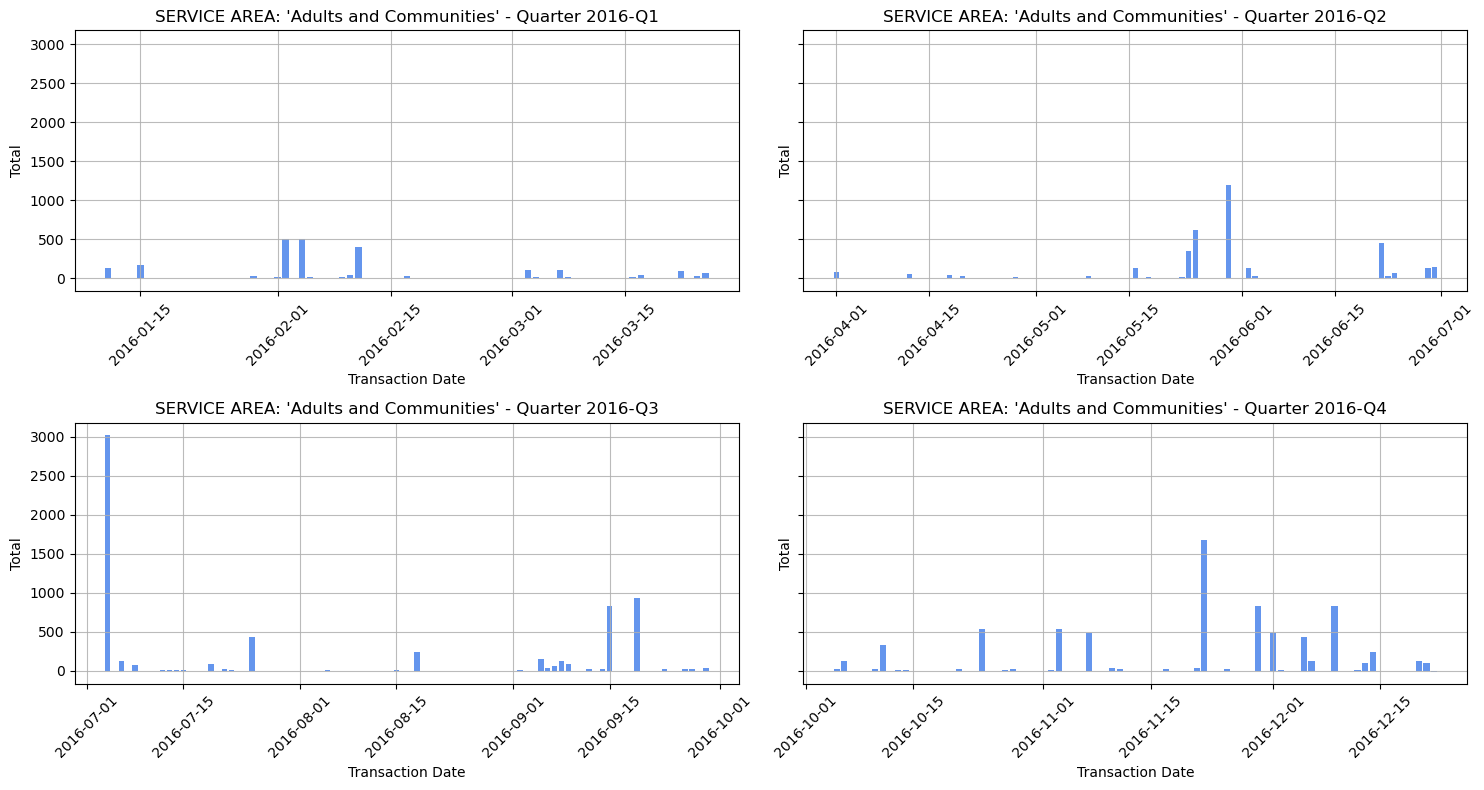

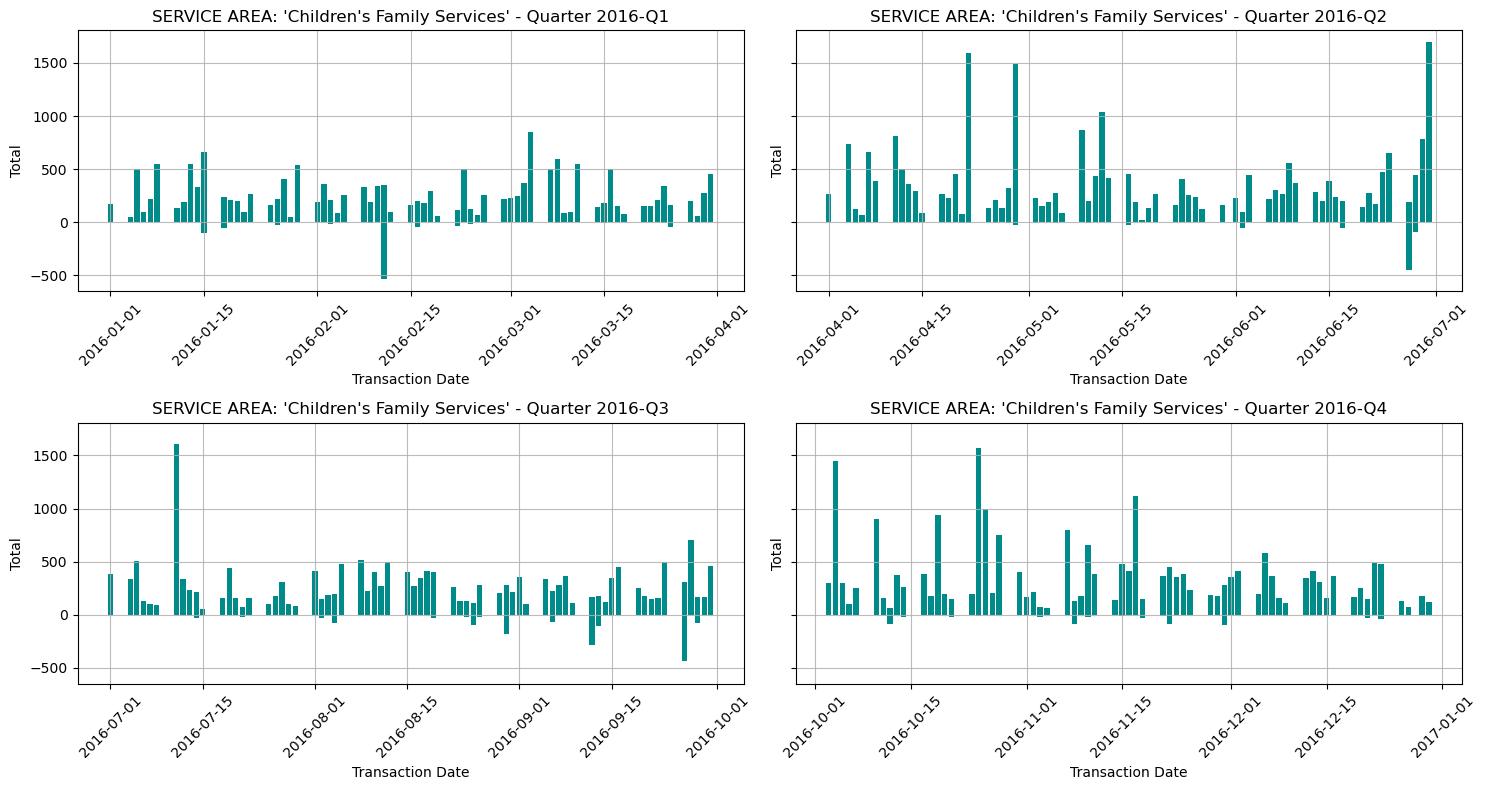

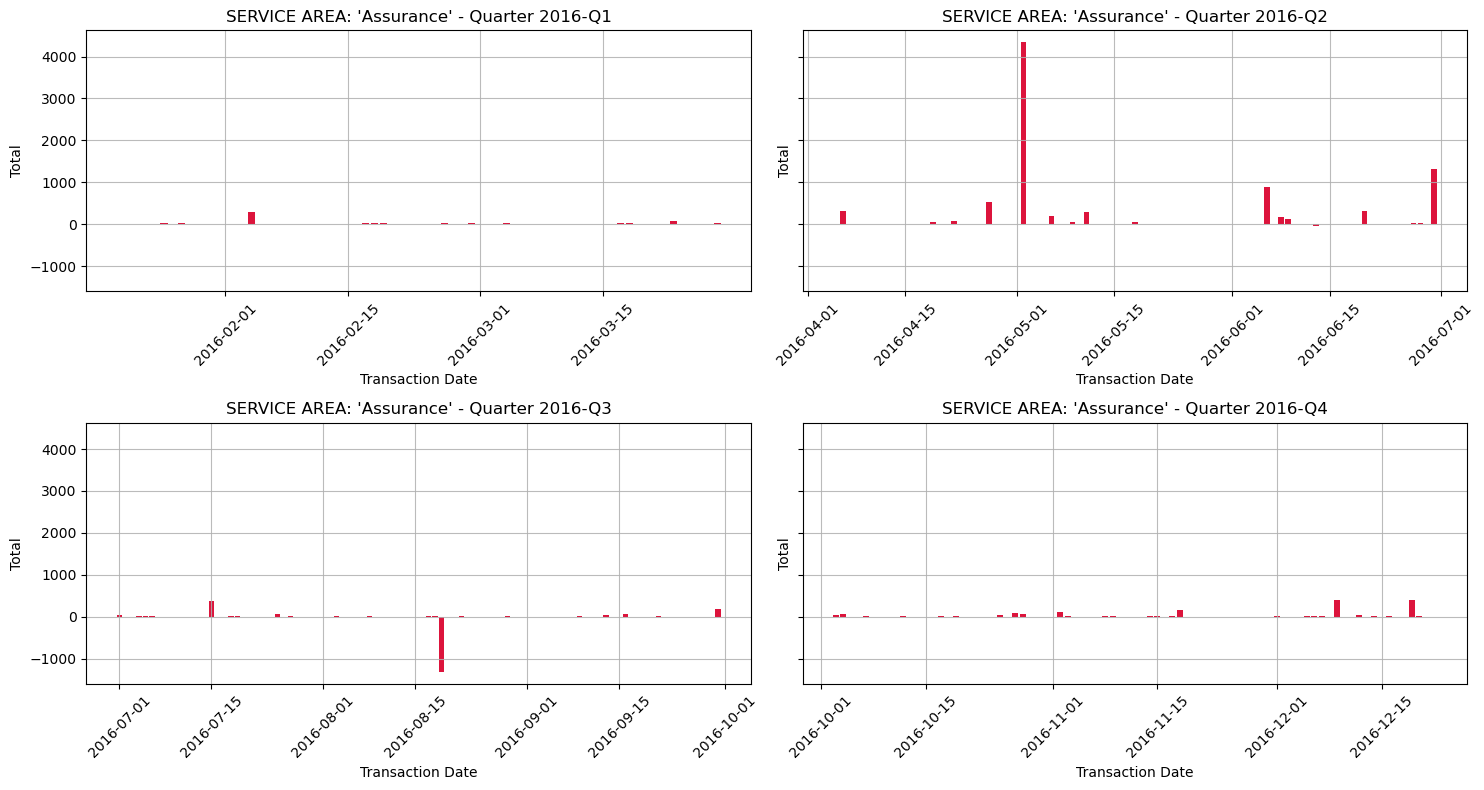

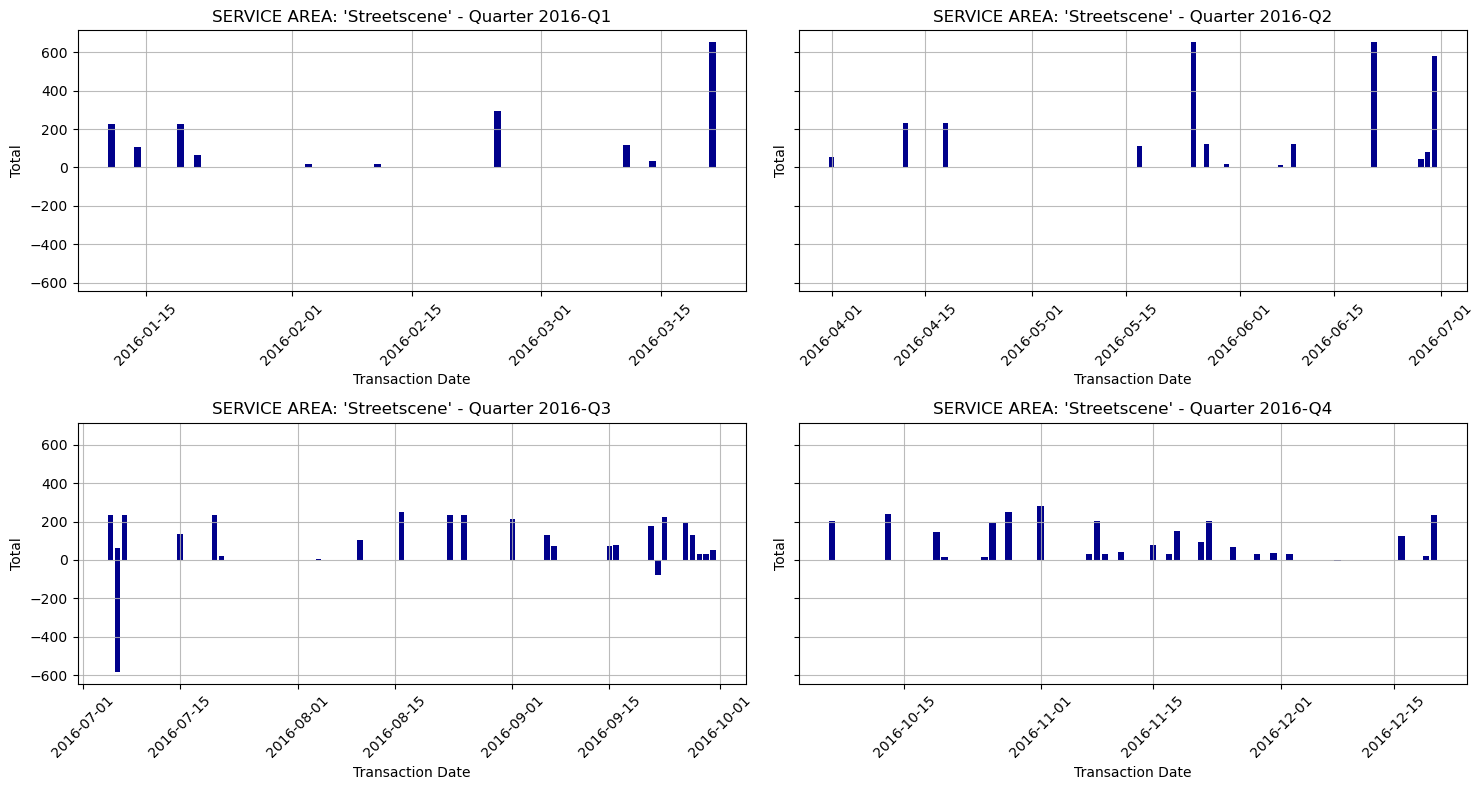

In [172]:
# plot transactions of 2016 per quarter per service area
plot_transactions_per_quarter_over_time_per_servicearea(df[df['Service Area'].isin(sas_2016)], 2016, colors=colors, title='SERVICE AREA: ')

__Insights from 2016 service area transactions:__
- Children Family Services and Streetscene doesn't present unusual peaks.
- Assurance has an unusual highly peak on the second Quarter.

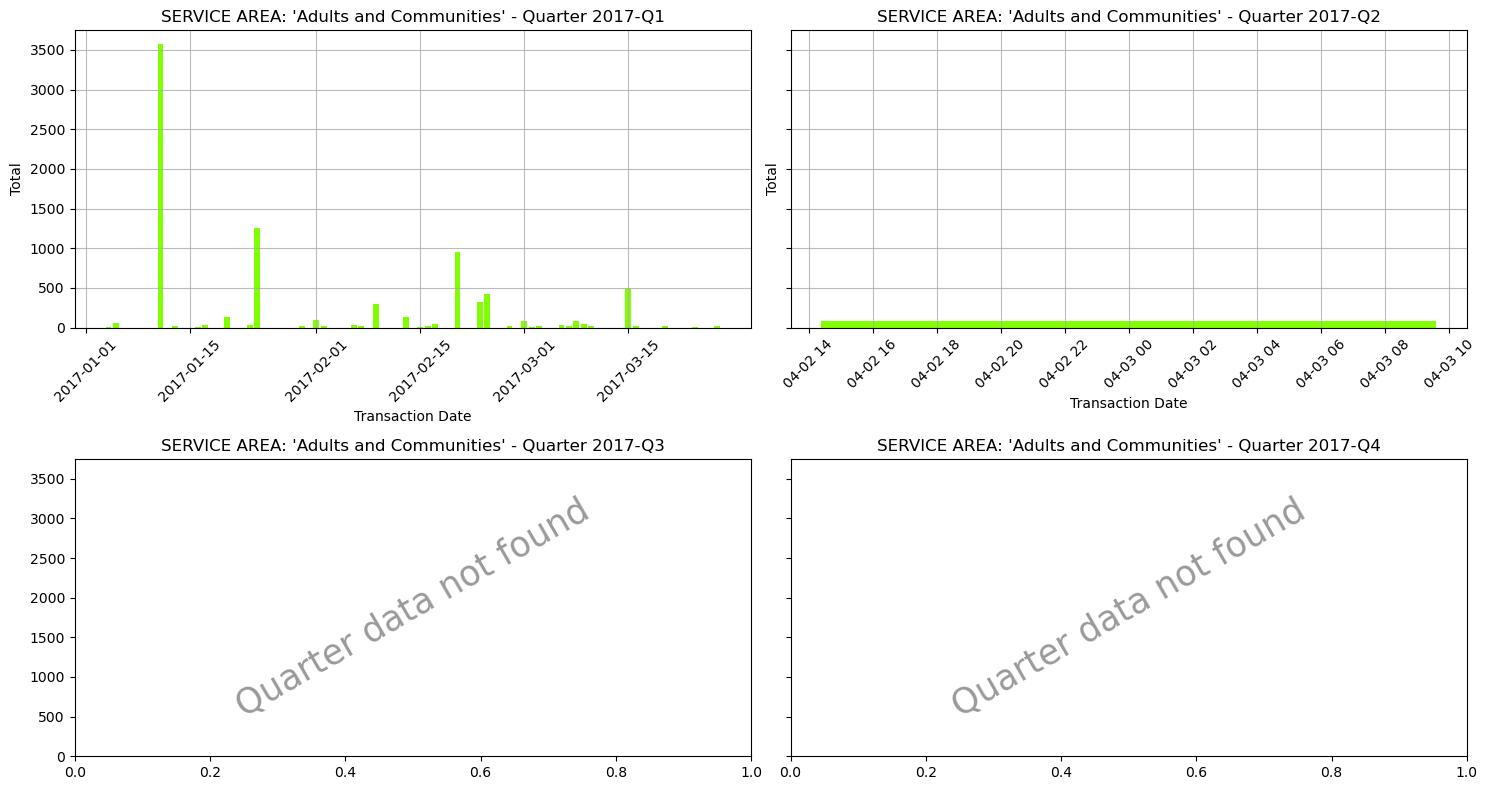

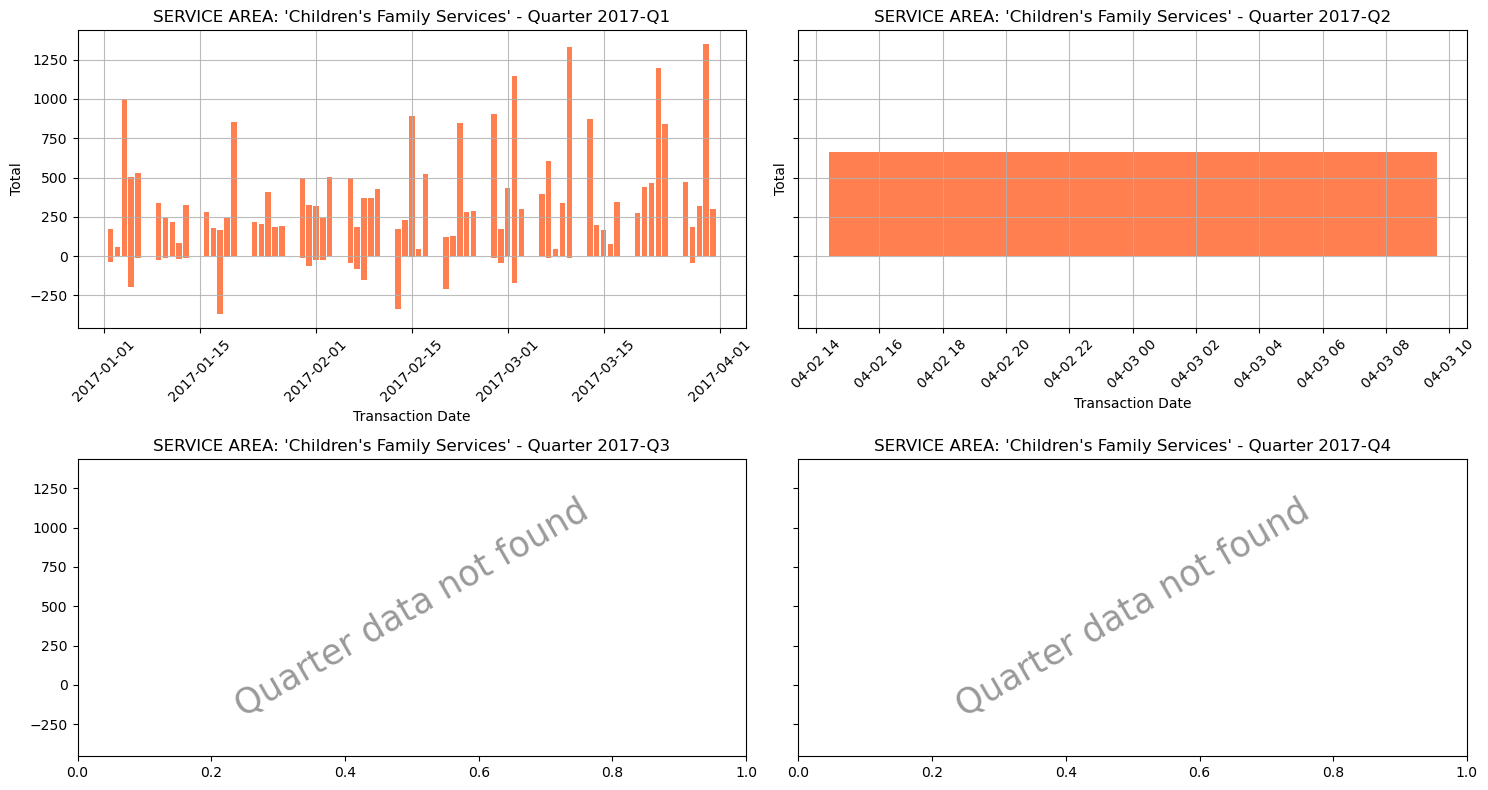

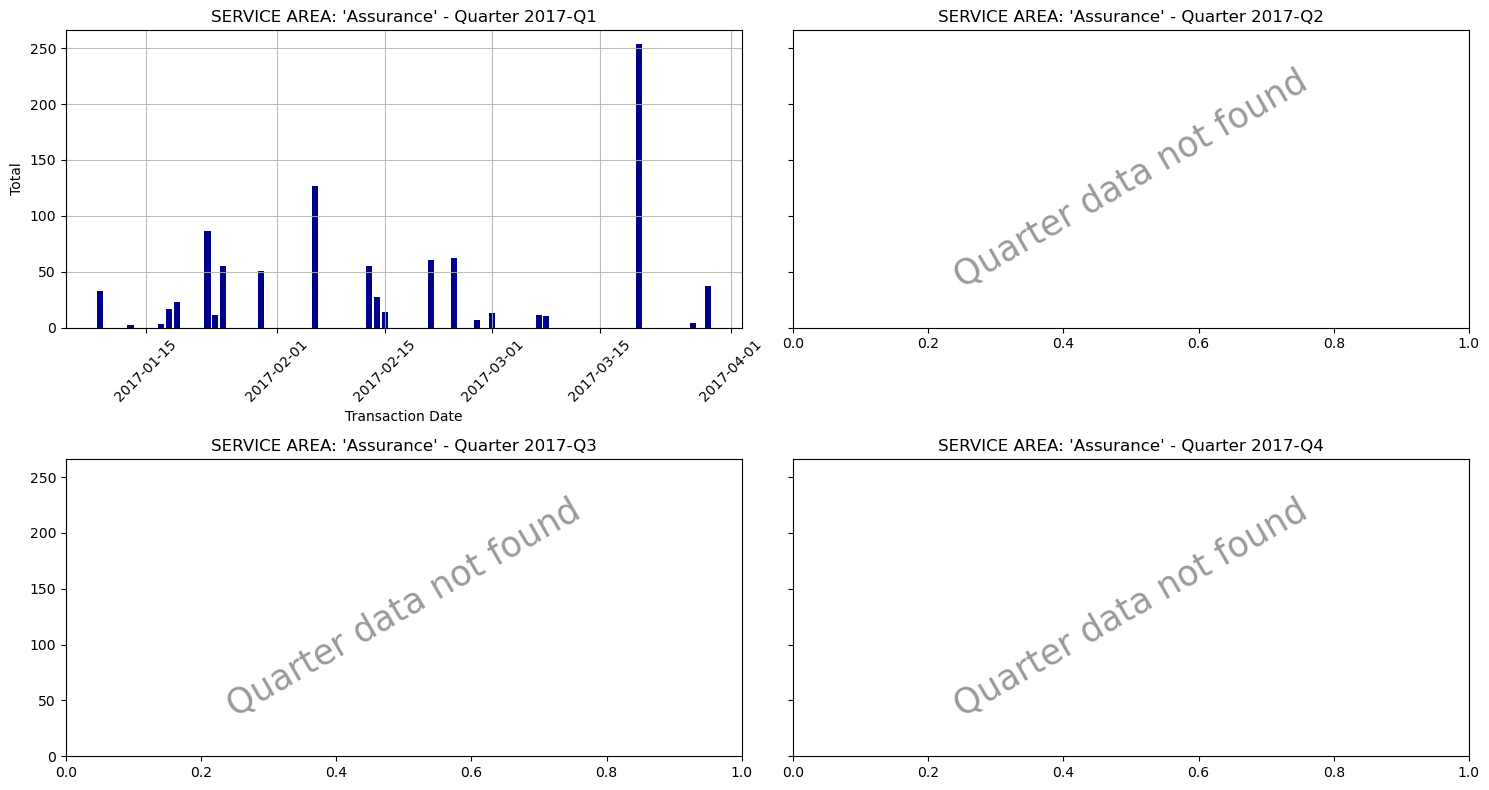

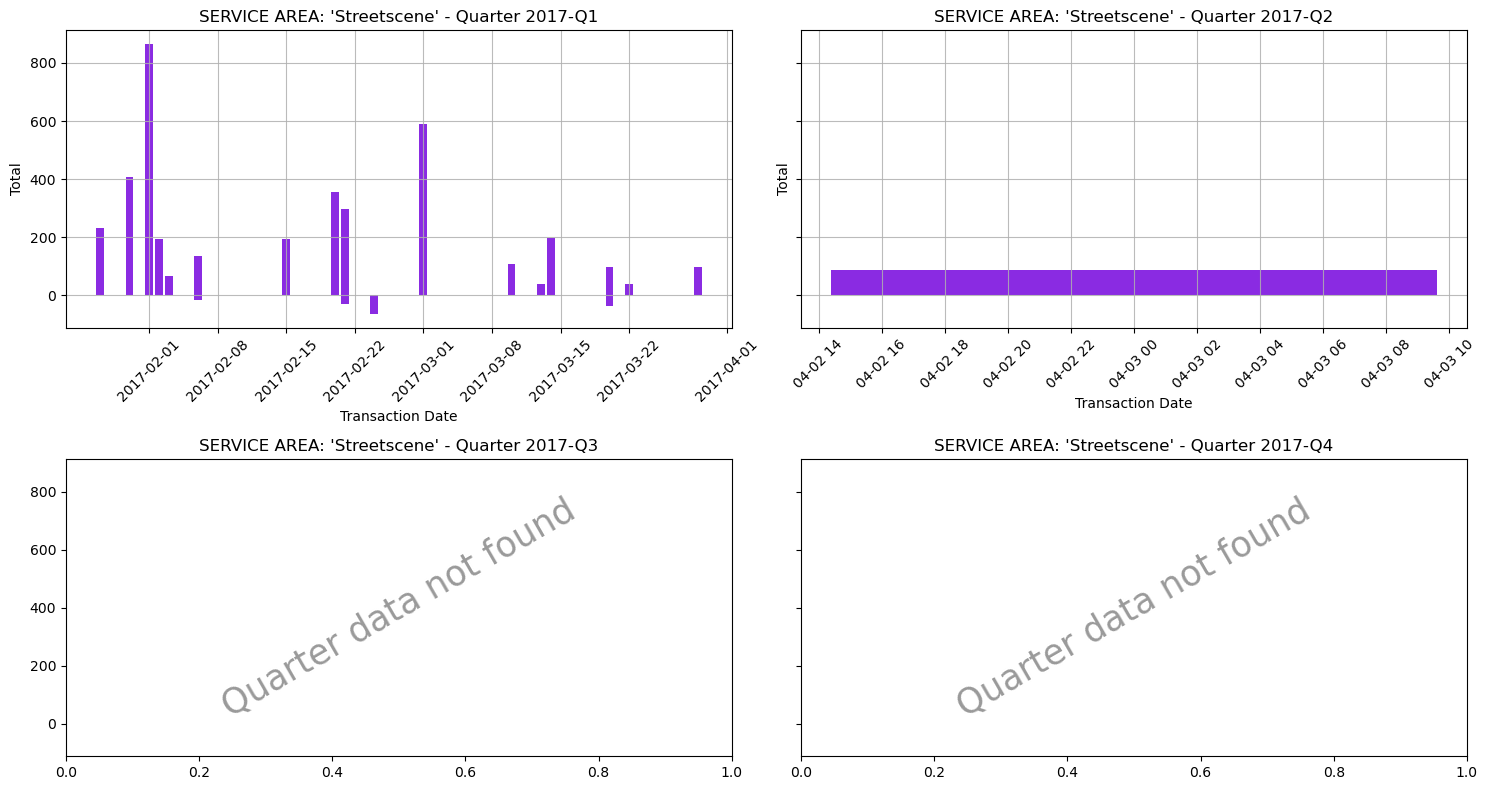

In [173]:
# plot transactions of 2017 per quarter per service area
plot_transactions_per_quarter_over_time_per_servicearea(df[df['Service Area'].isin(sas_2017)], 2017, colors=colors, title='SERVICE AREA: ')

__Insights from 2017 service area transactions:__
- There are many interesting peaks for all service areas on the first quarter.
- Children Family Service presents lots of transactions for this specific year.

Now that we had __gained insights about the Service Area__, let's __repeat the process for Accounts.__

Fortunately we can use the same code to plot the transactions by account description.

In [177]:
ac_2014 = list(df[df['Year'] == 2014]['Account Description'].value_counts().index)[:5]
ac_2015 = list(df[df['Year'] == 2015]['Account Description'].value_counts().index)[:5]
ac_2016 = list(df[df['Year'] == 2016]['Account Description'].value_counts().index)[:5]
ac_2017 = list(df[df['Year'] == 2017]['Account Description'].value_counts().index)[:5]

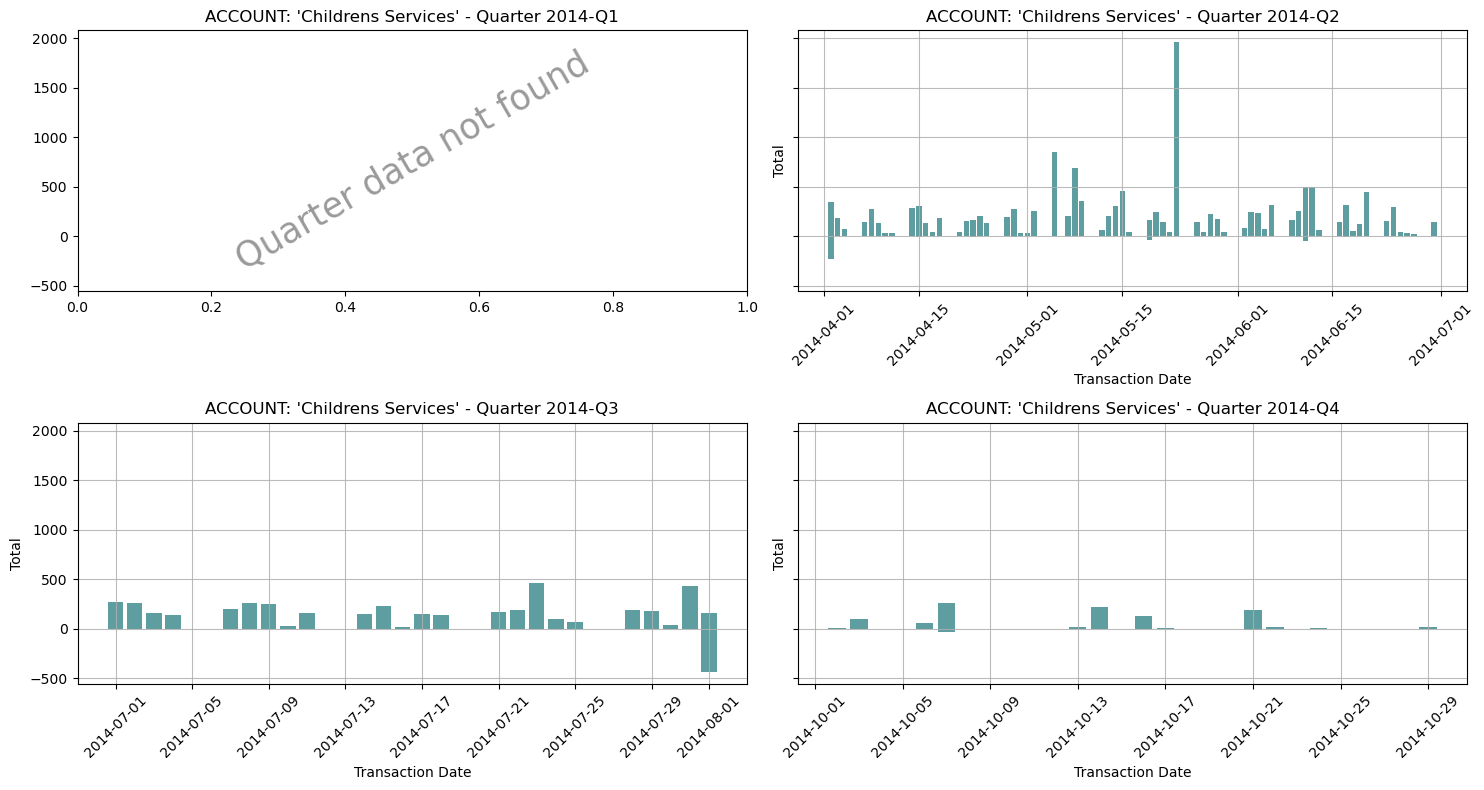

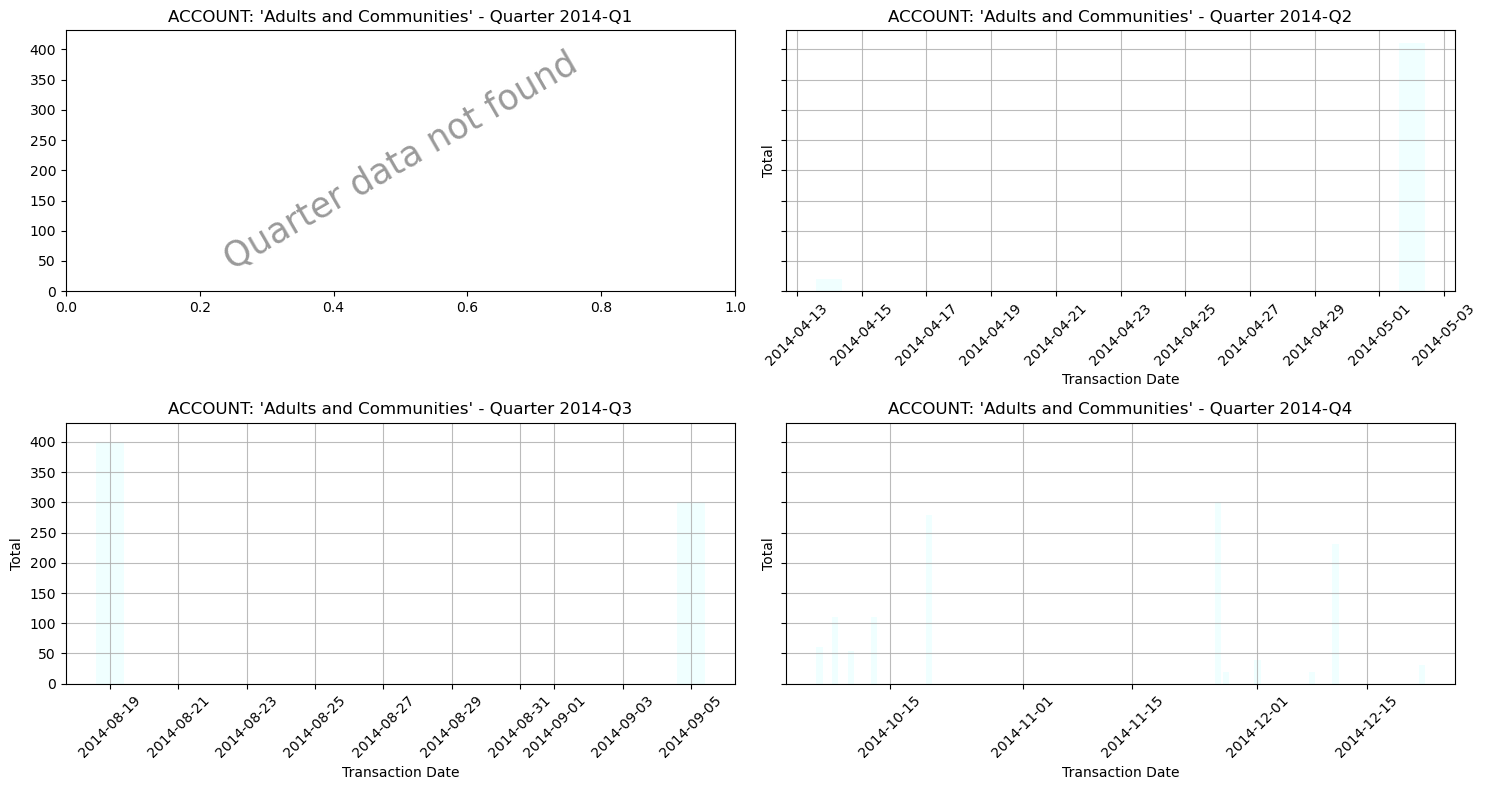

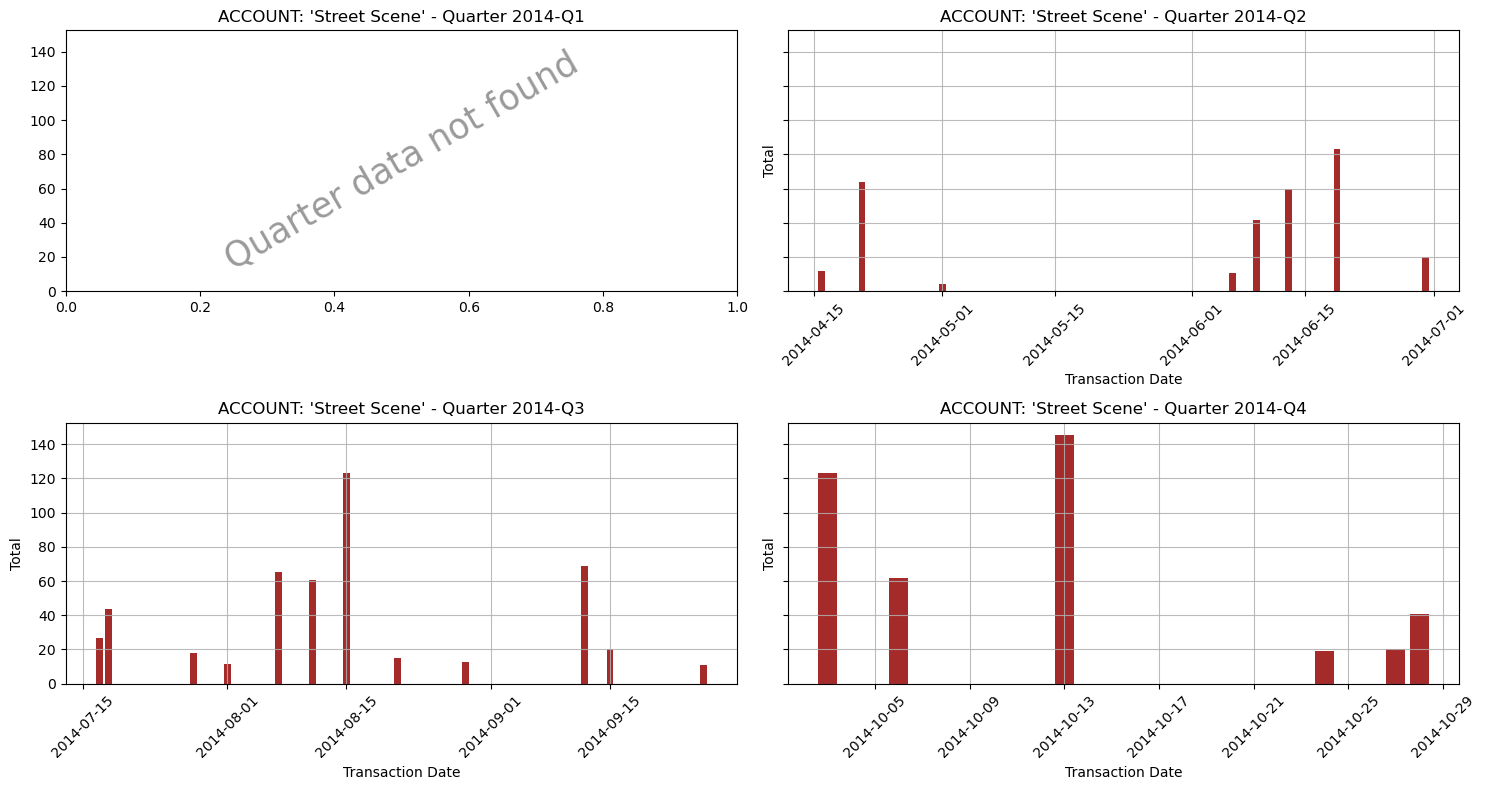

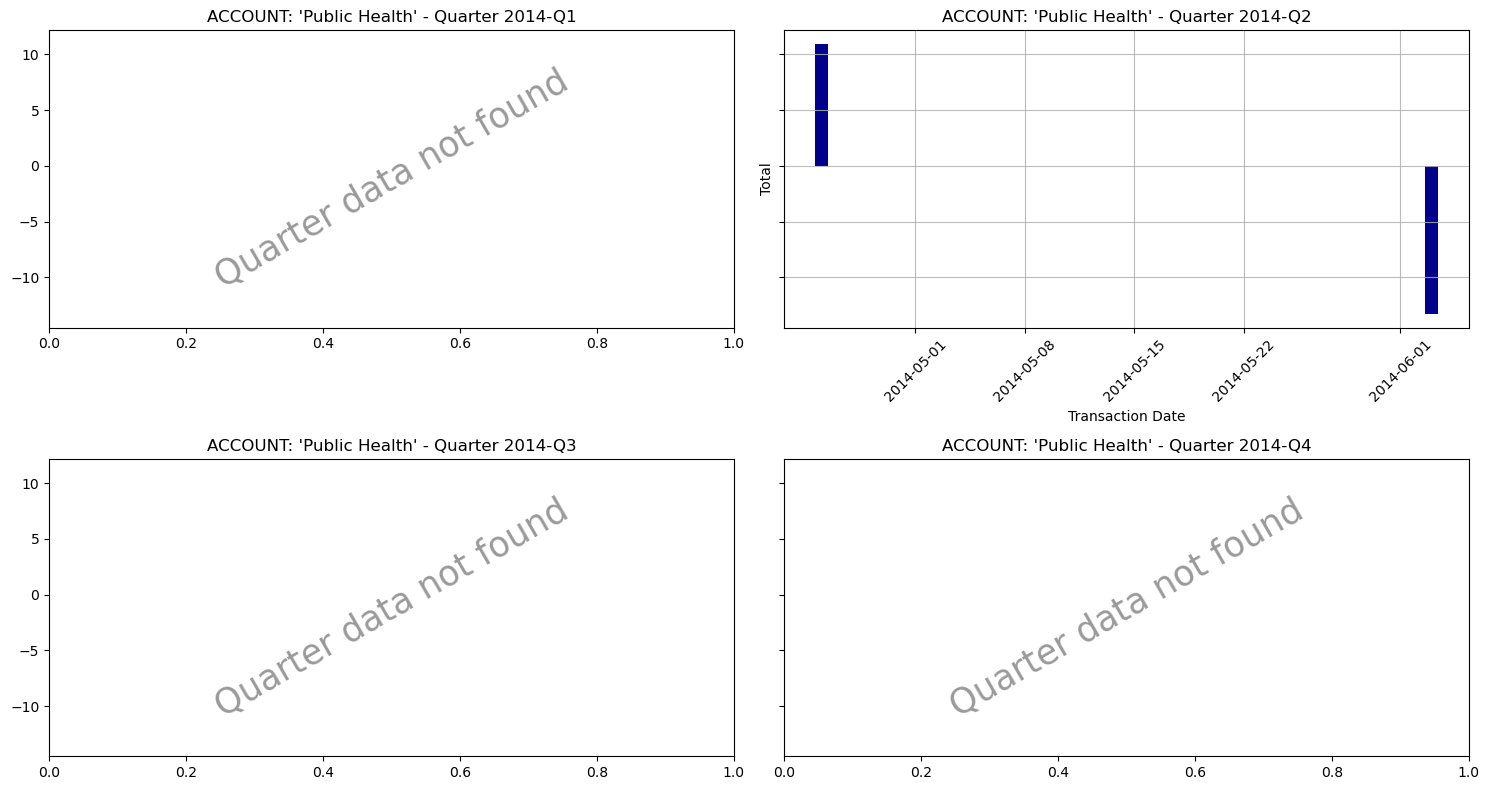

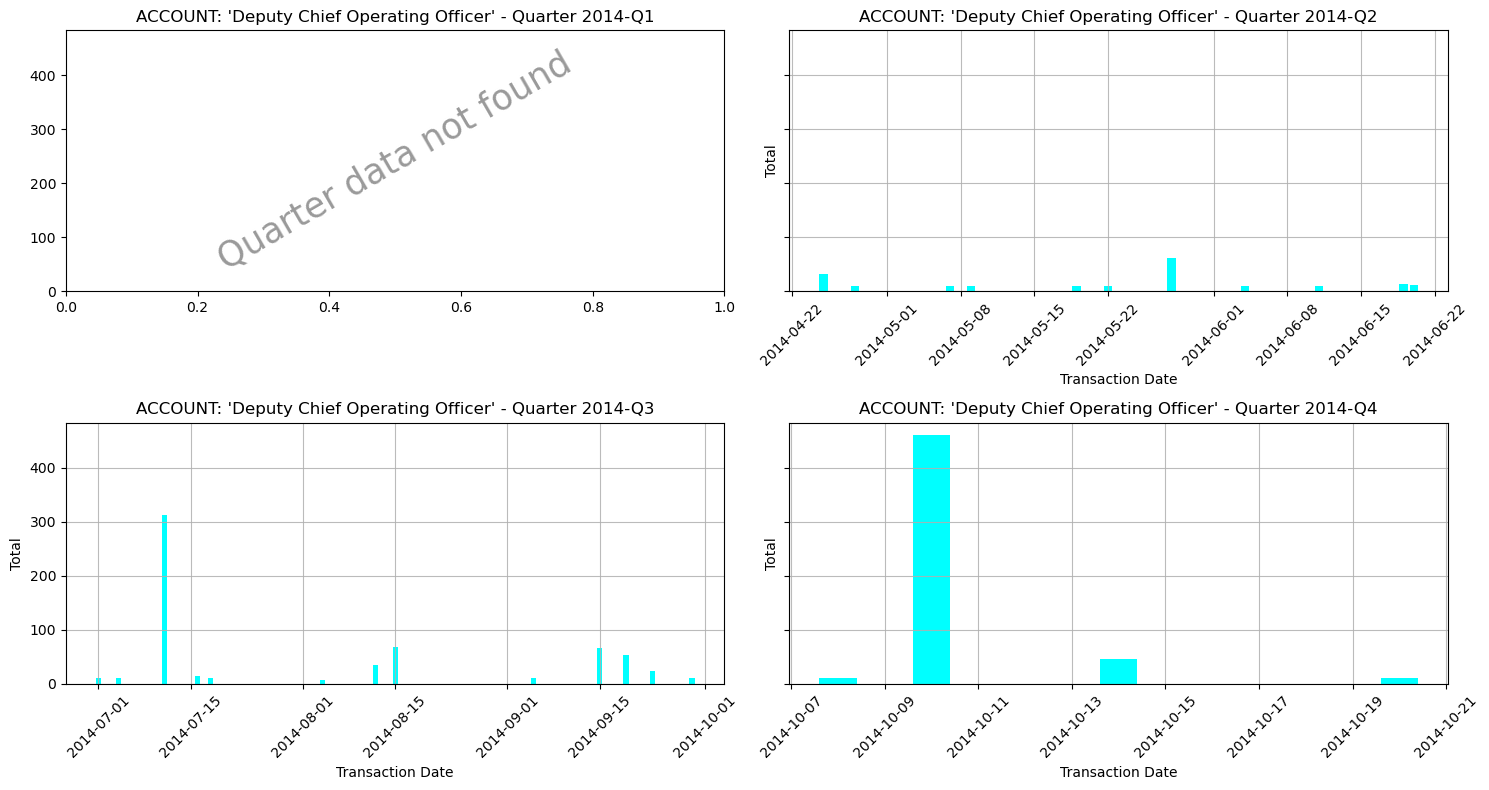

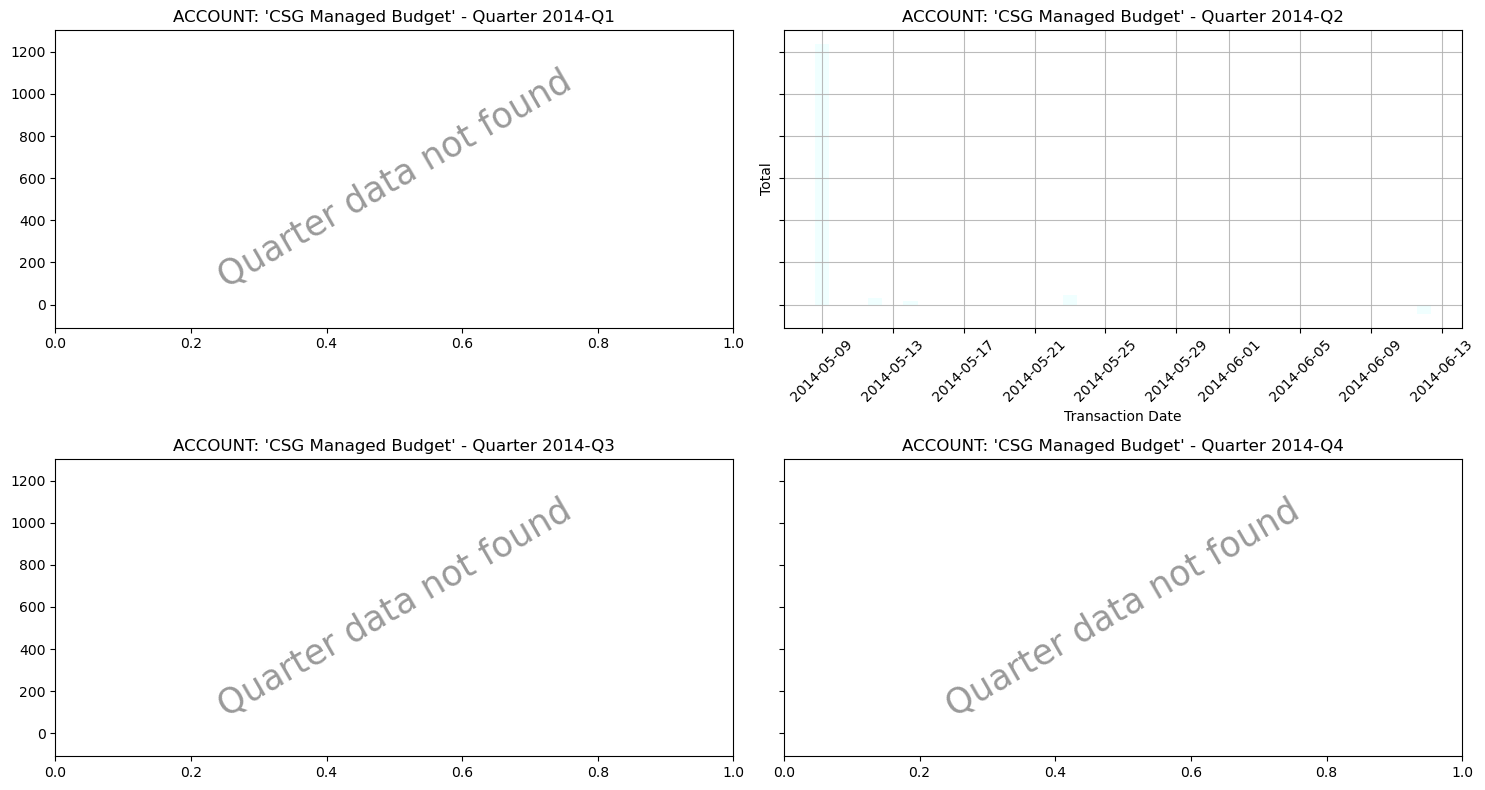

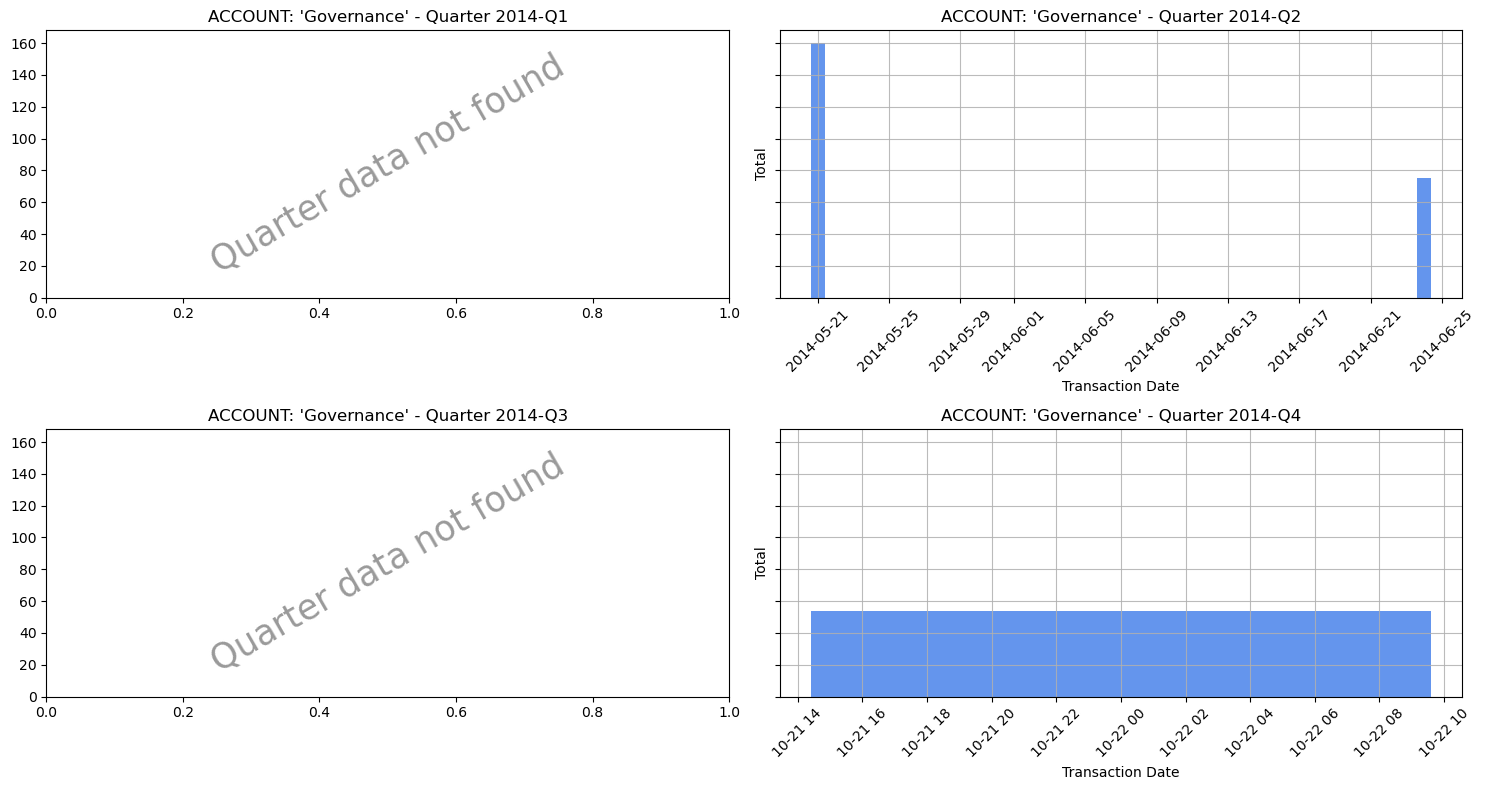

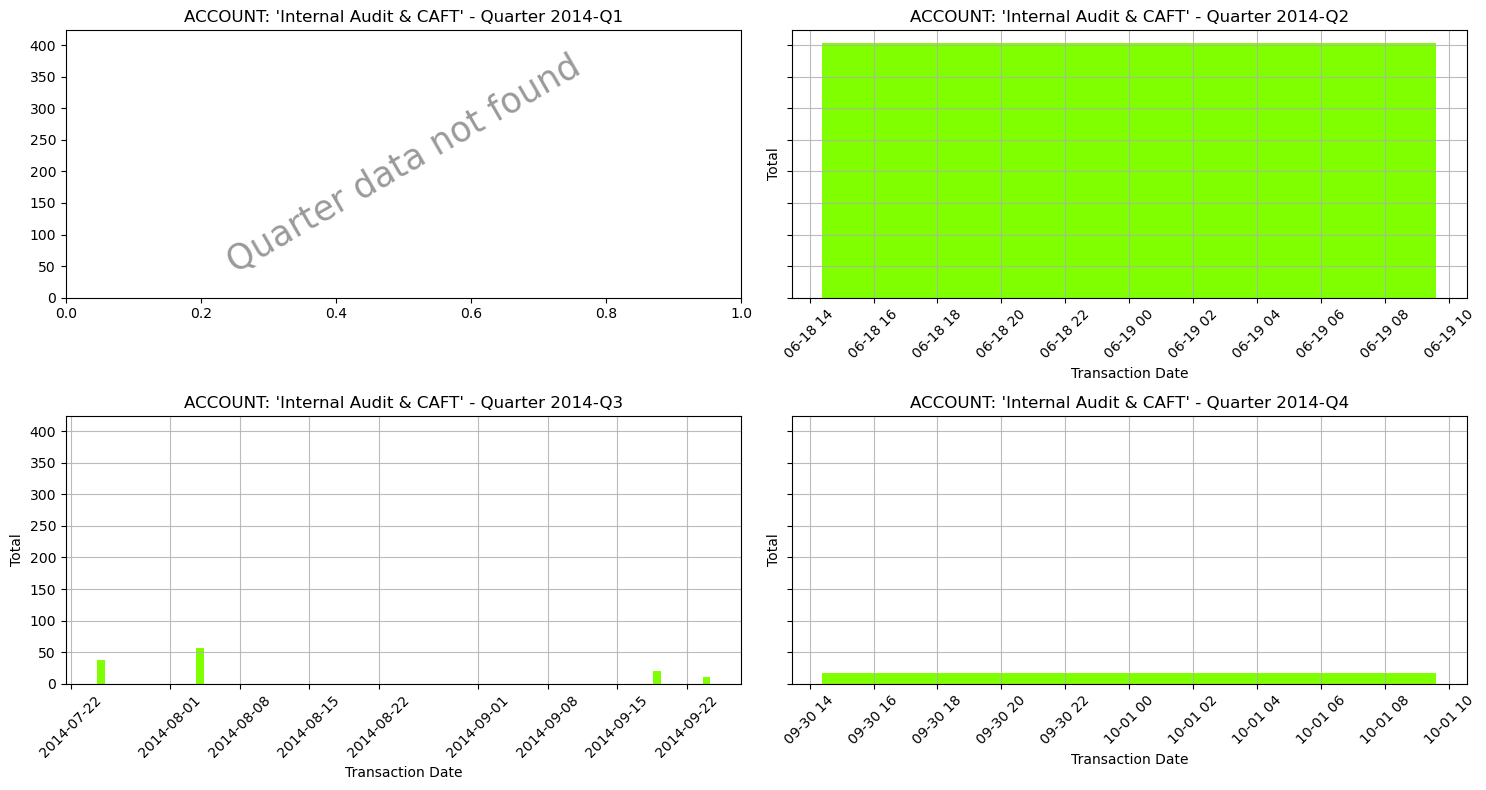

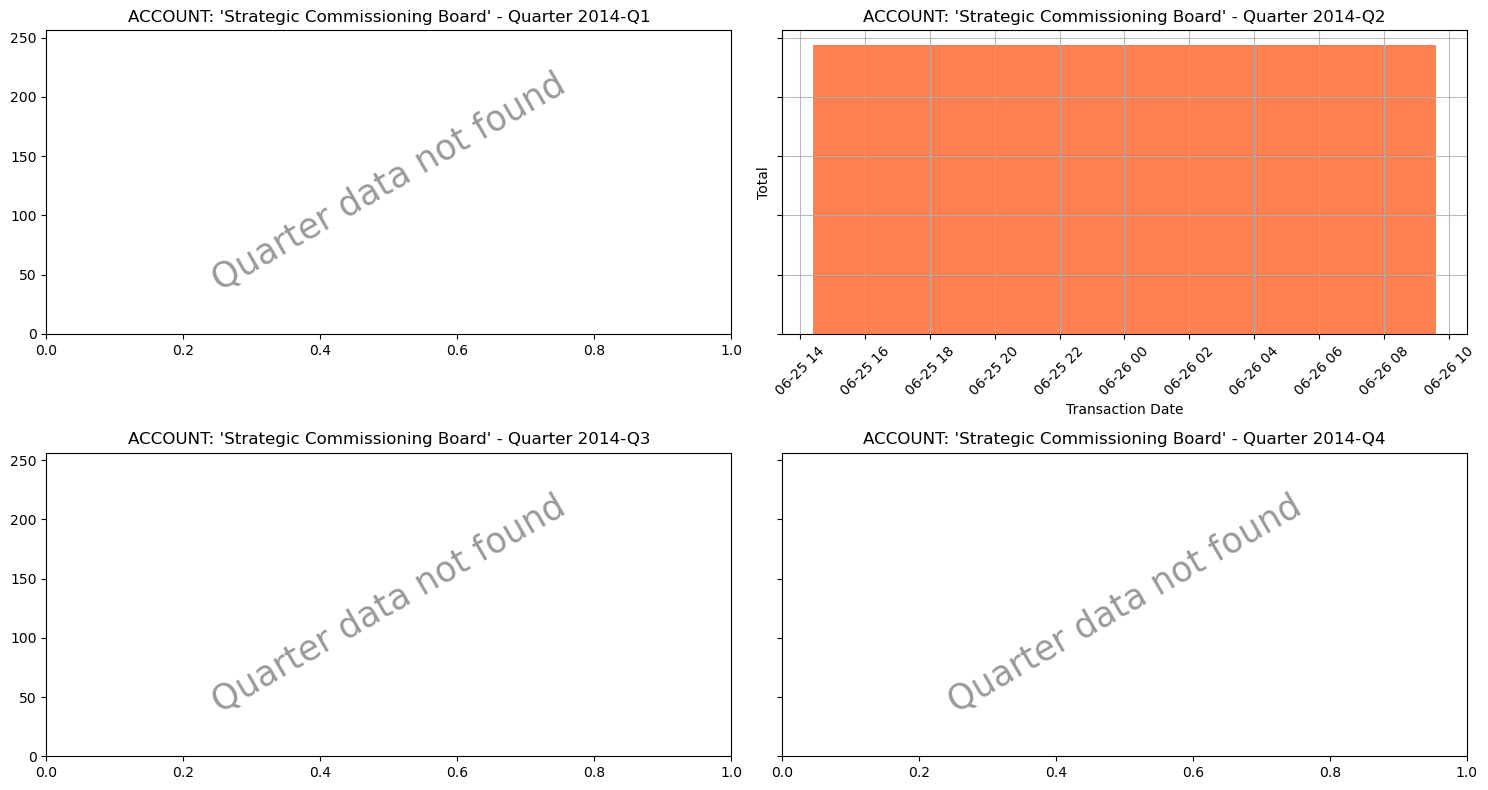

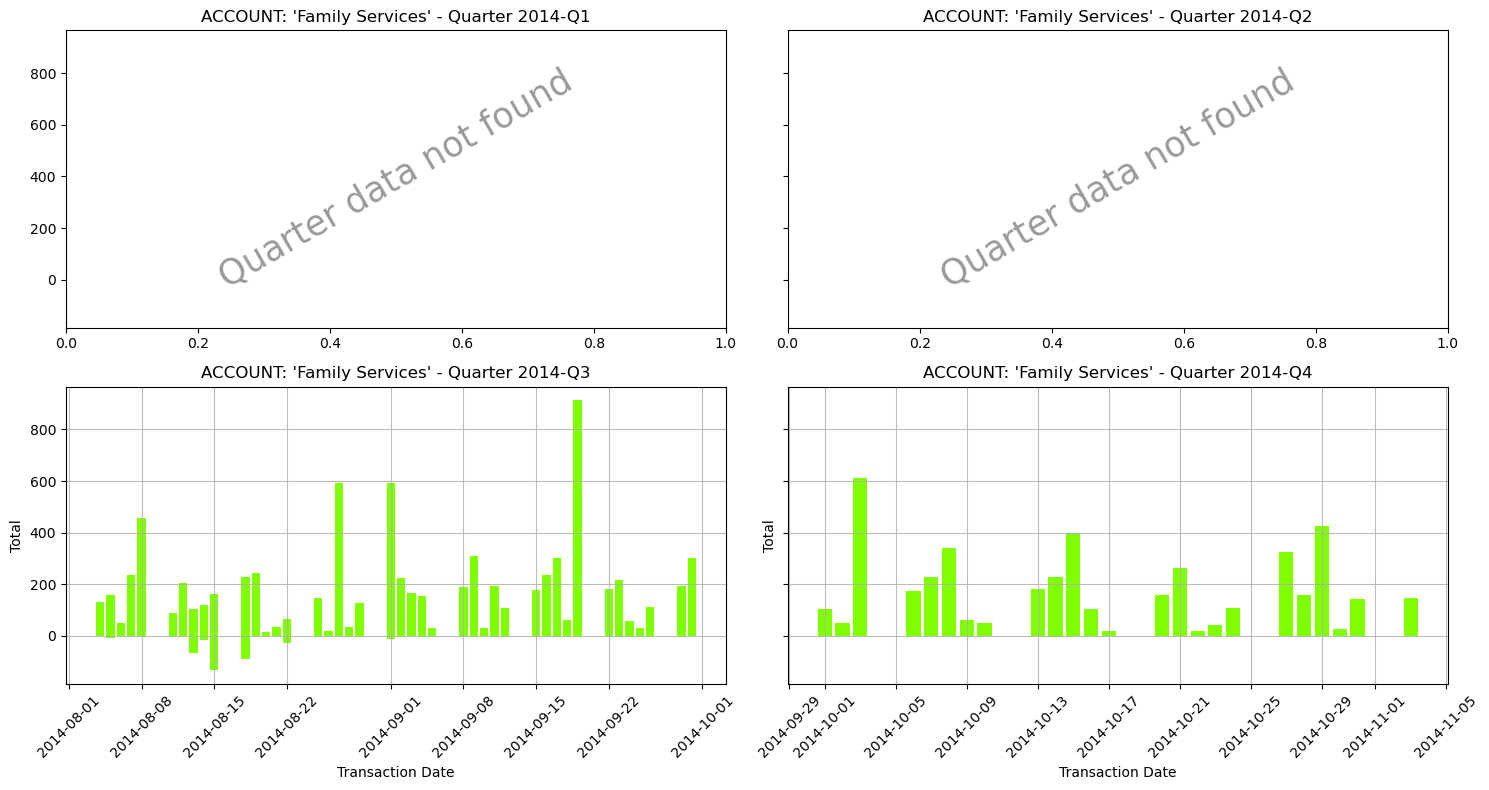

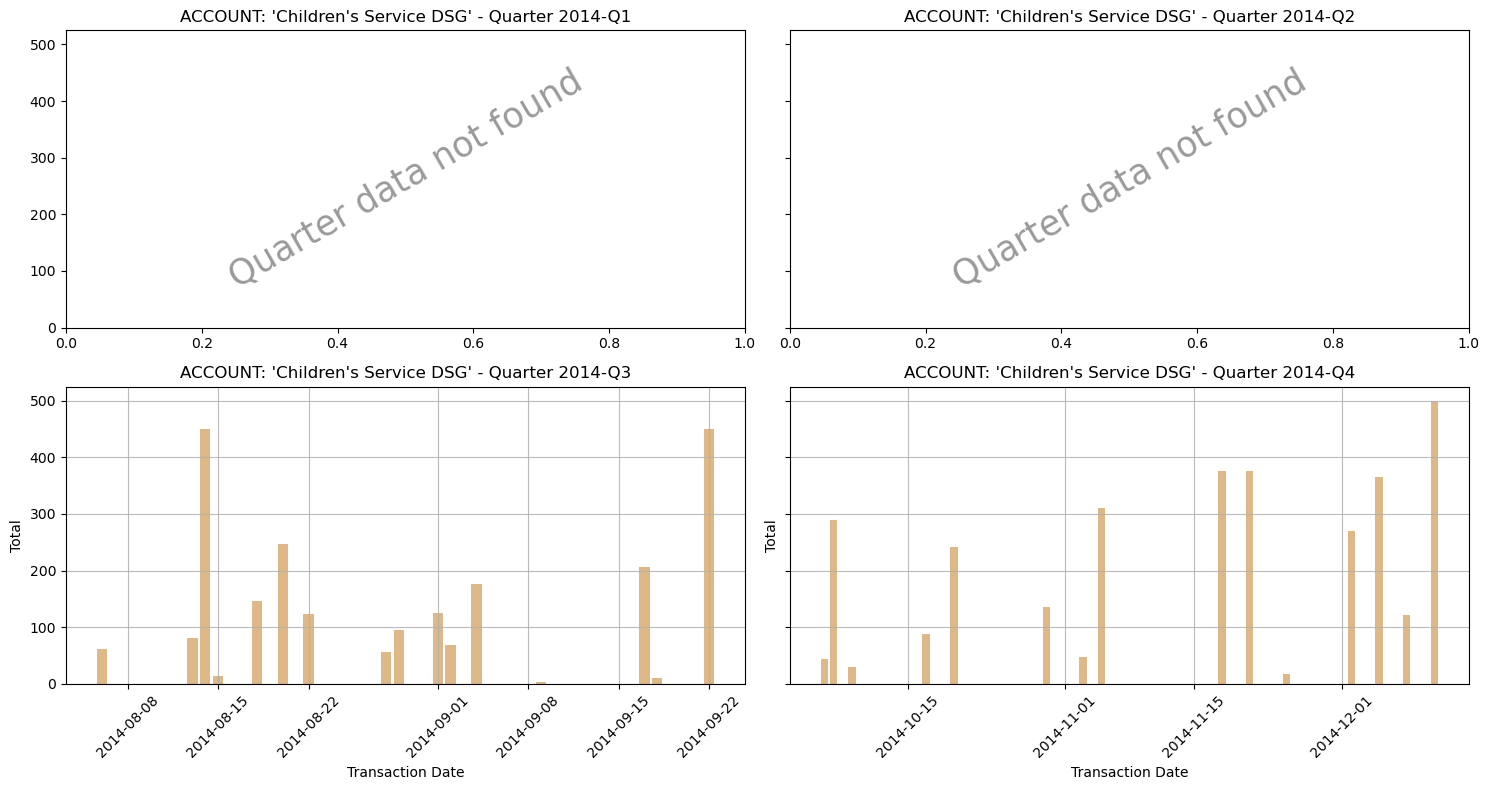

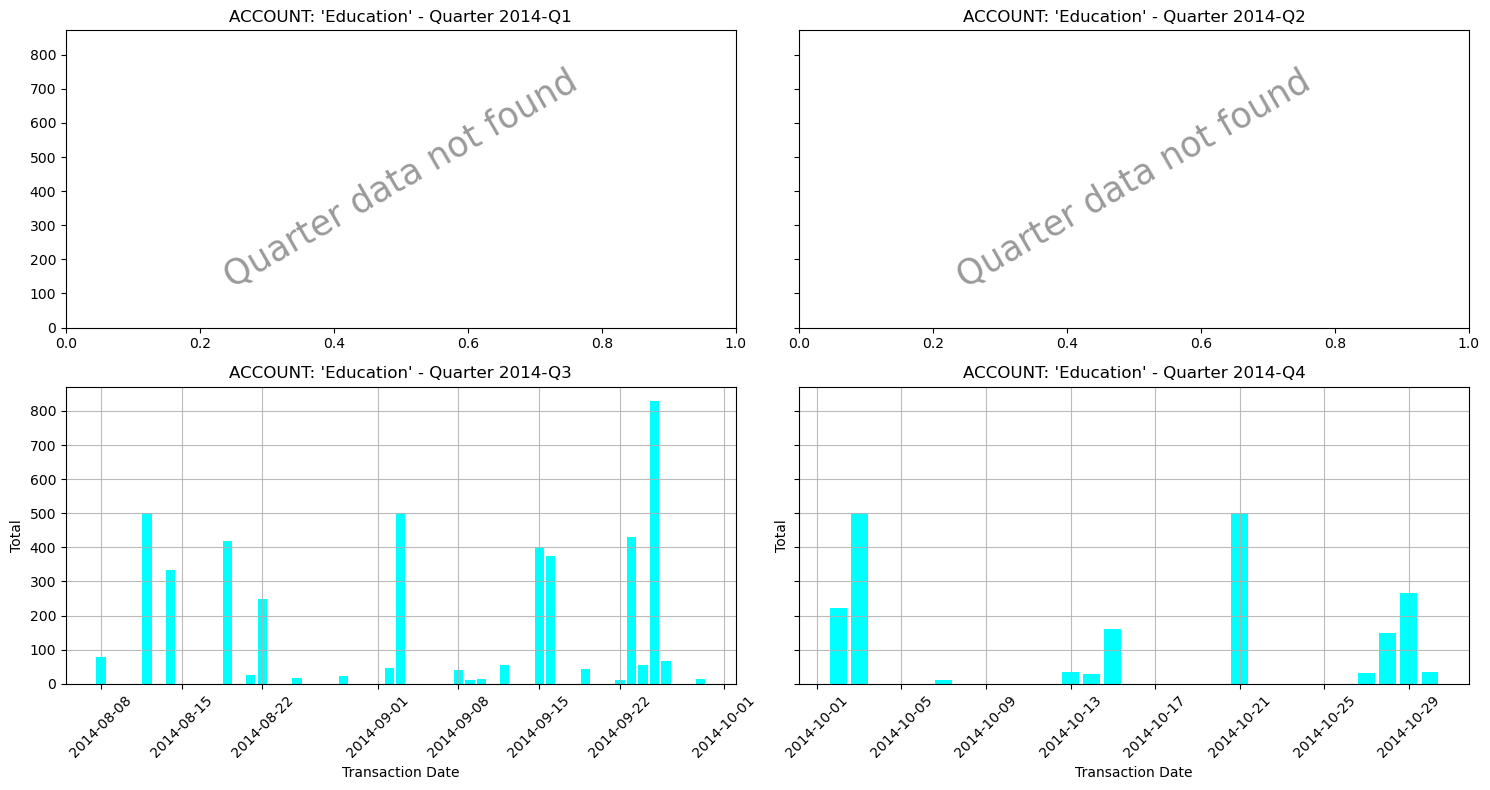

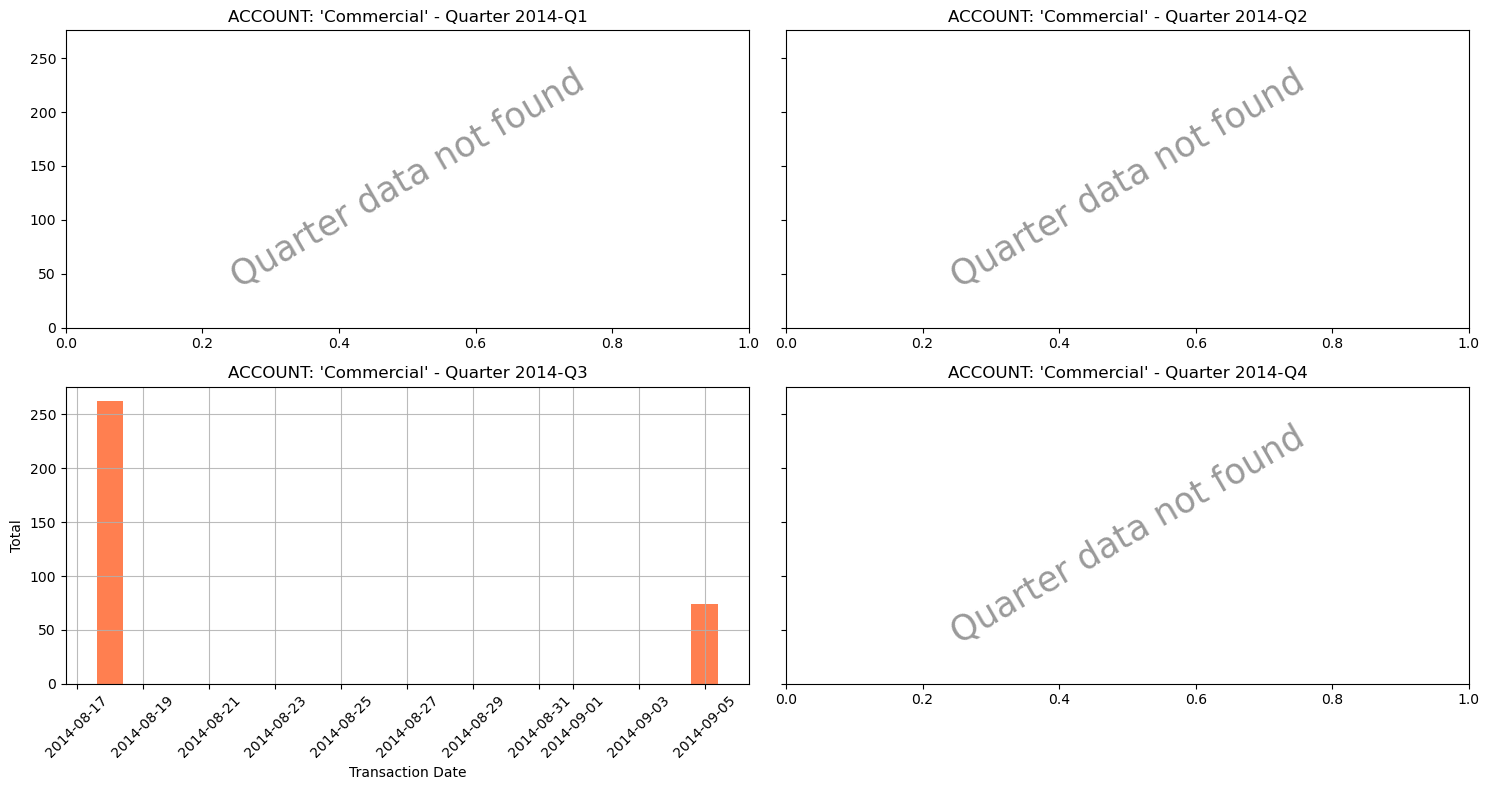

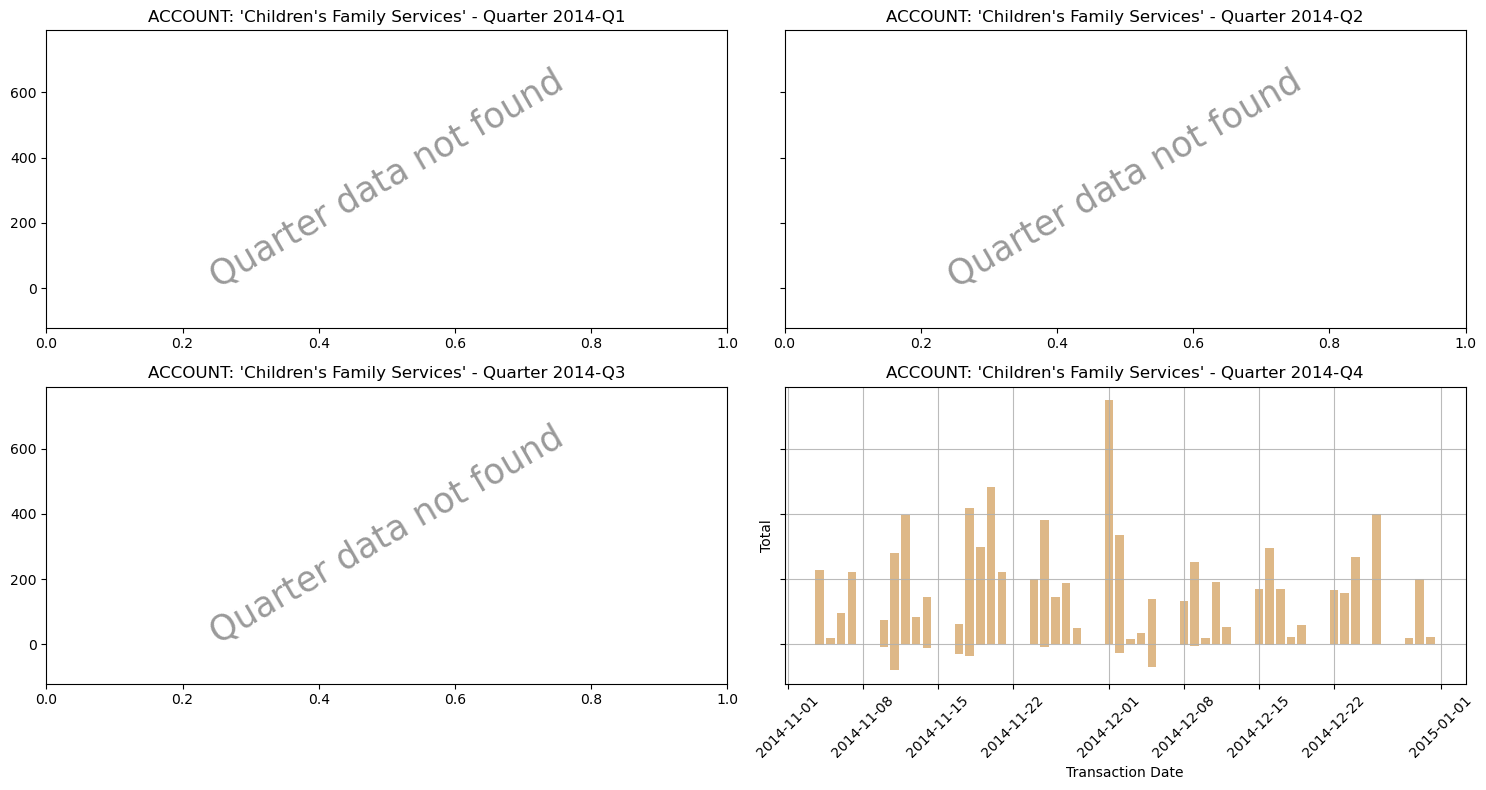

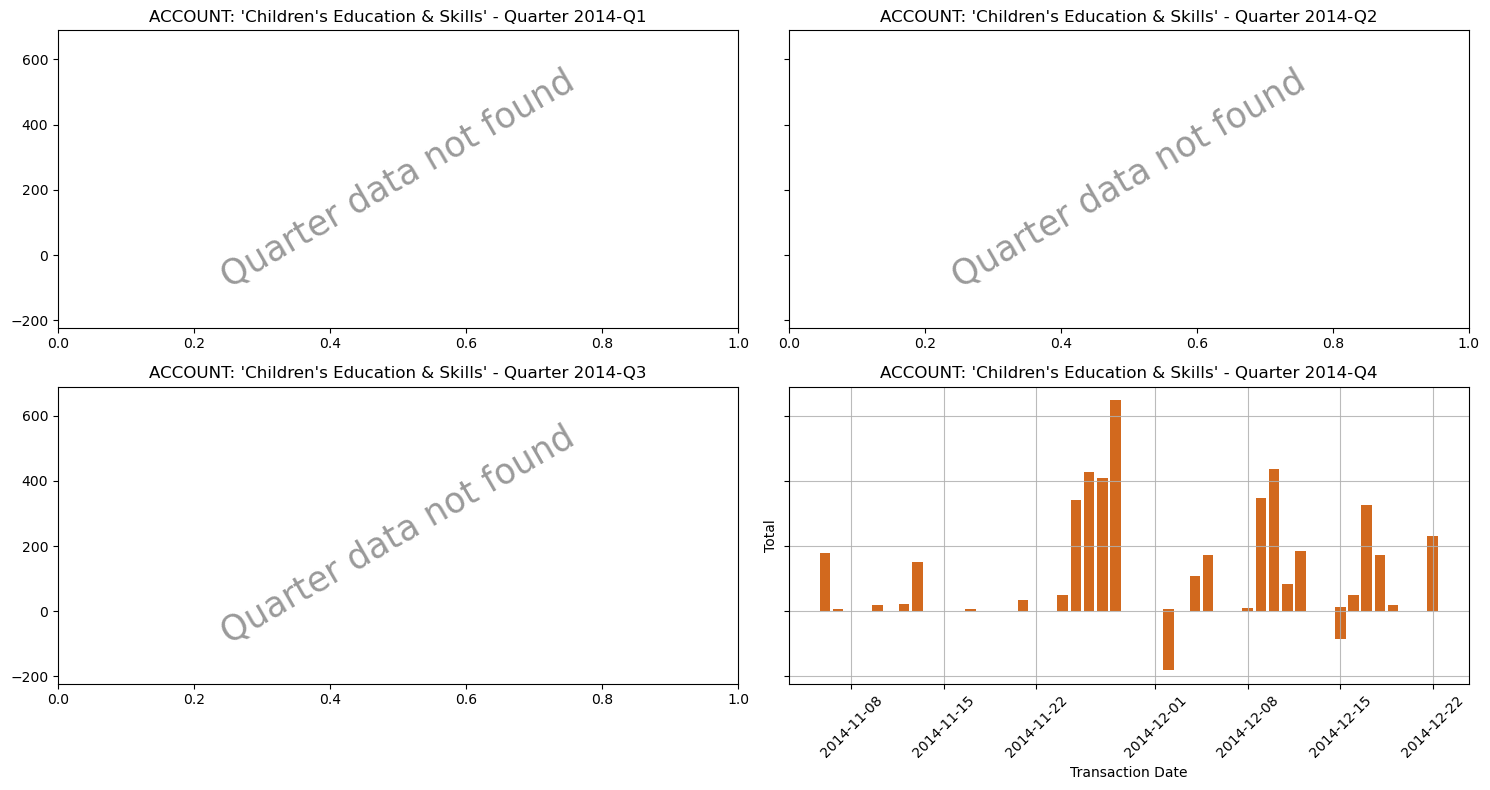

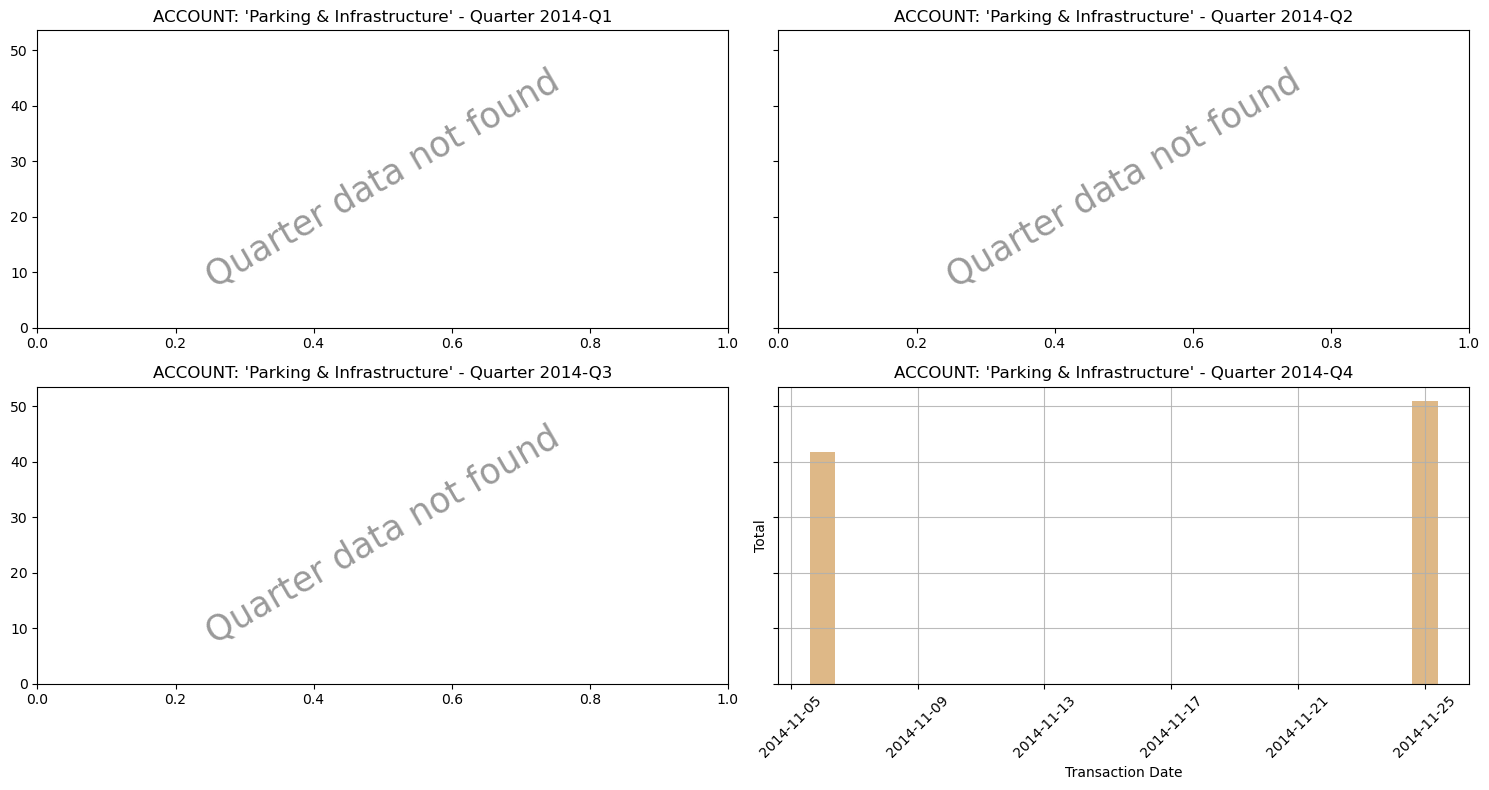

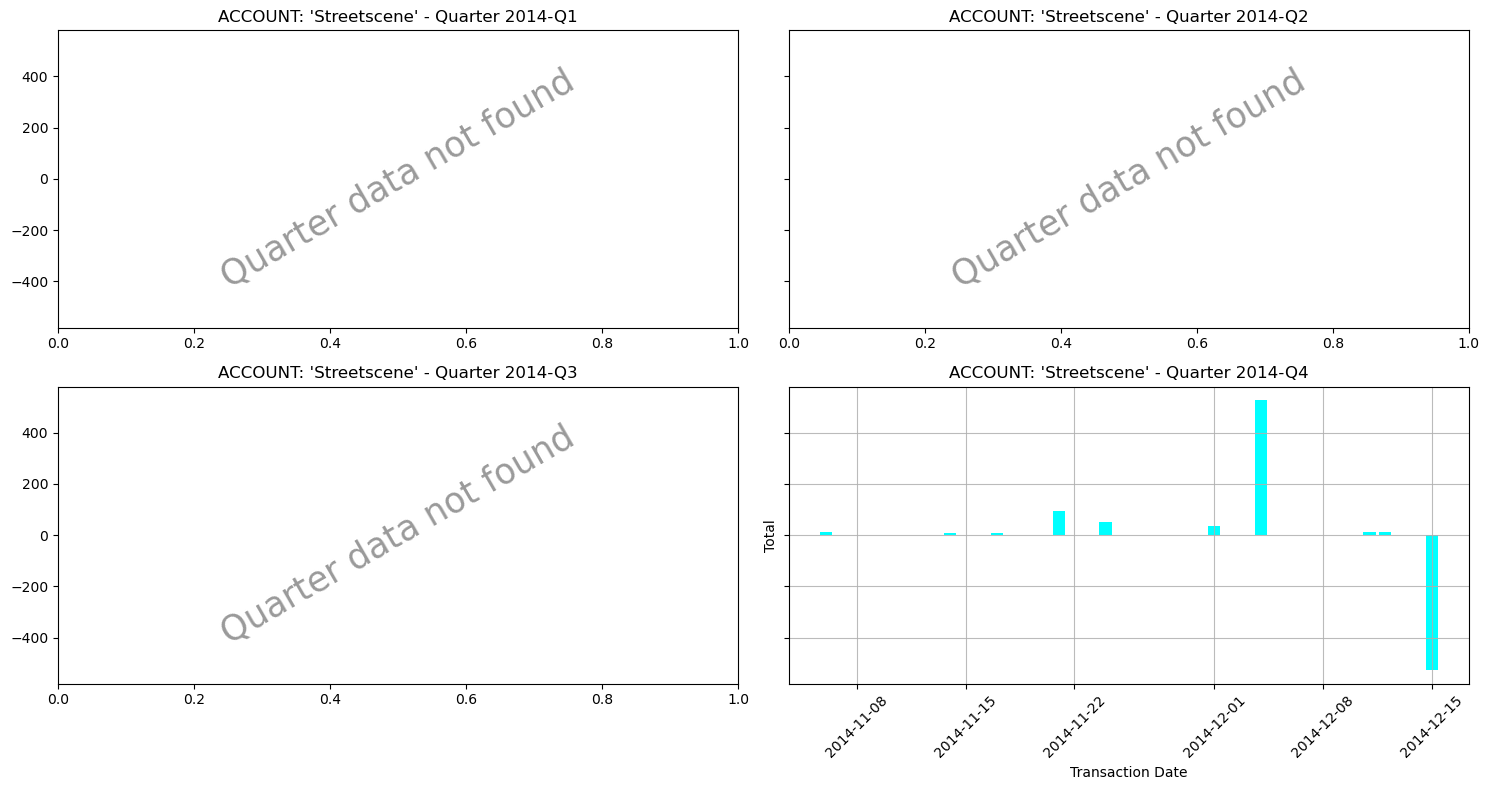

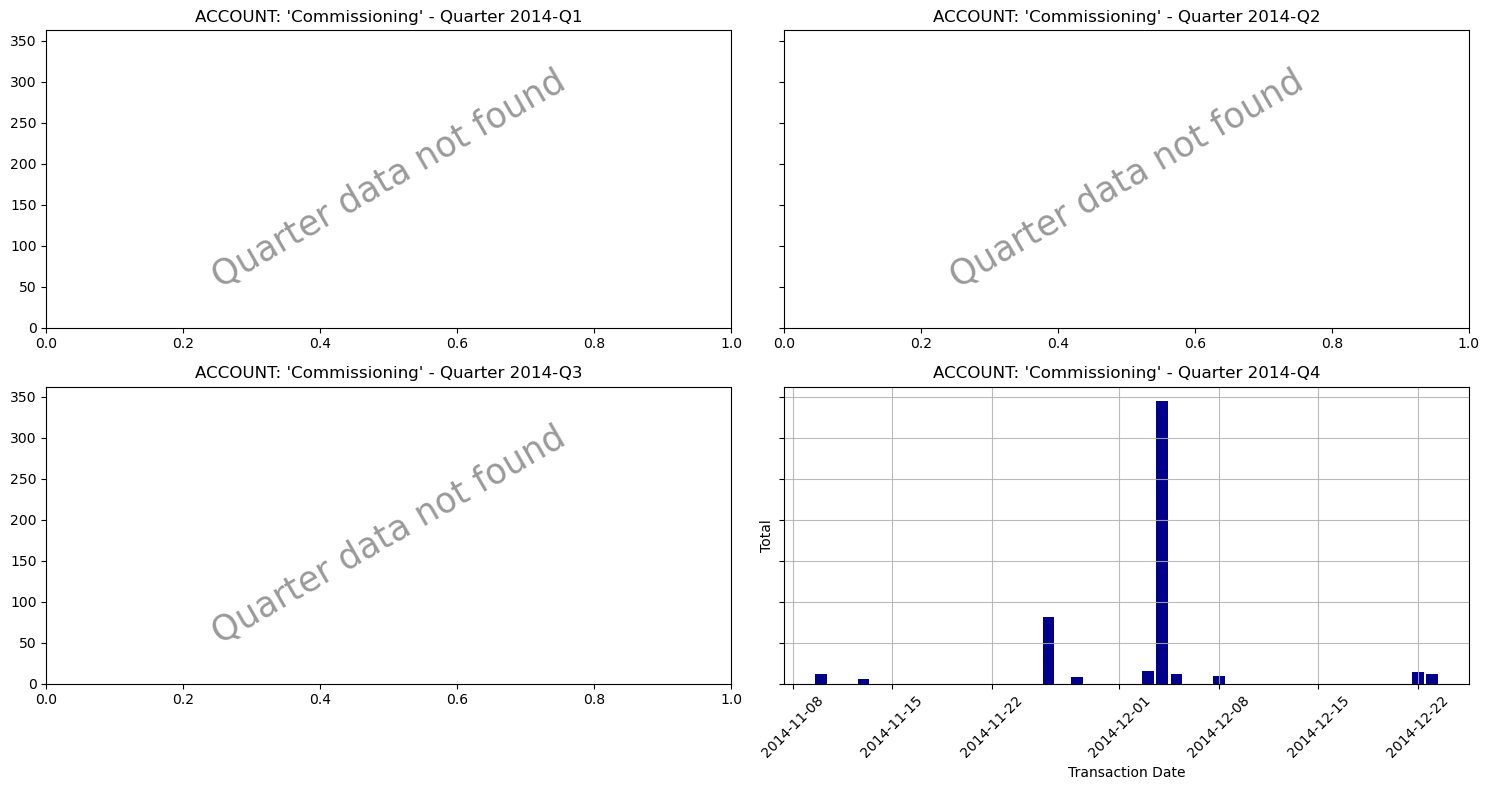

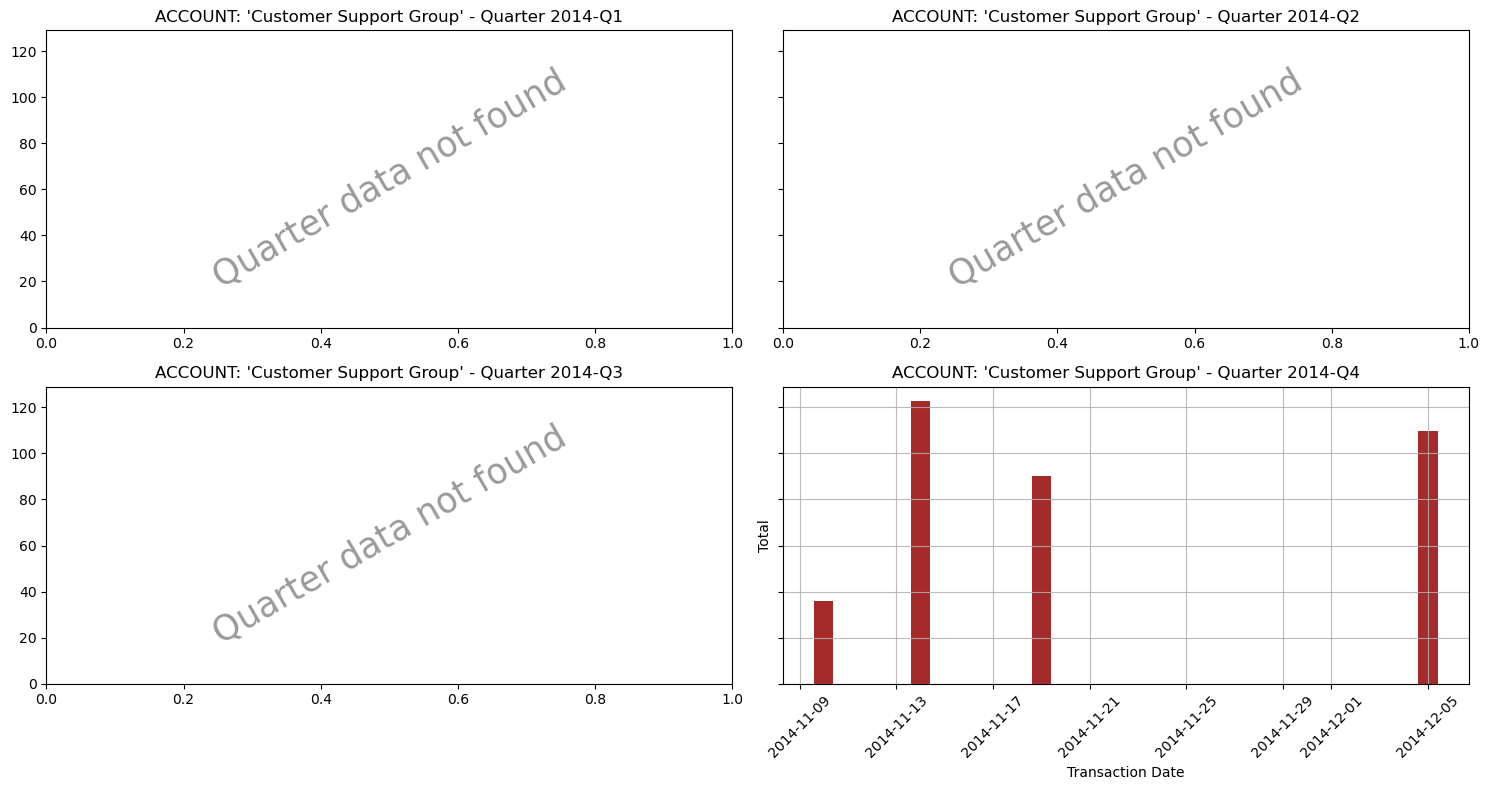

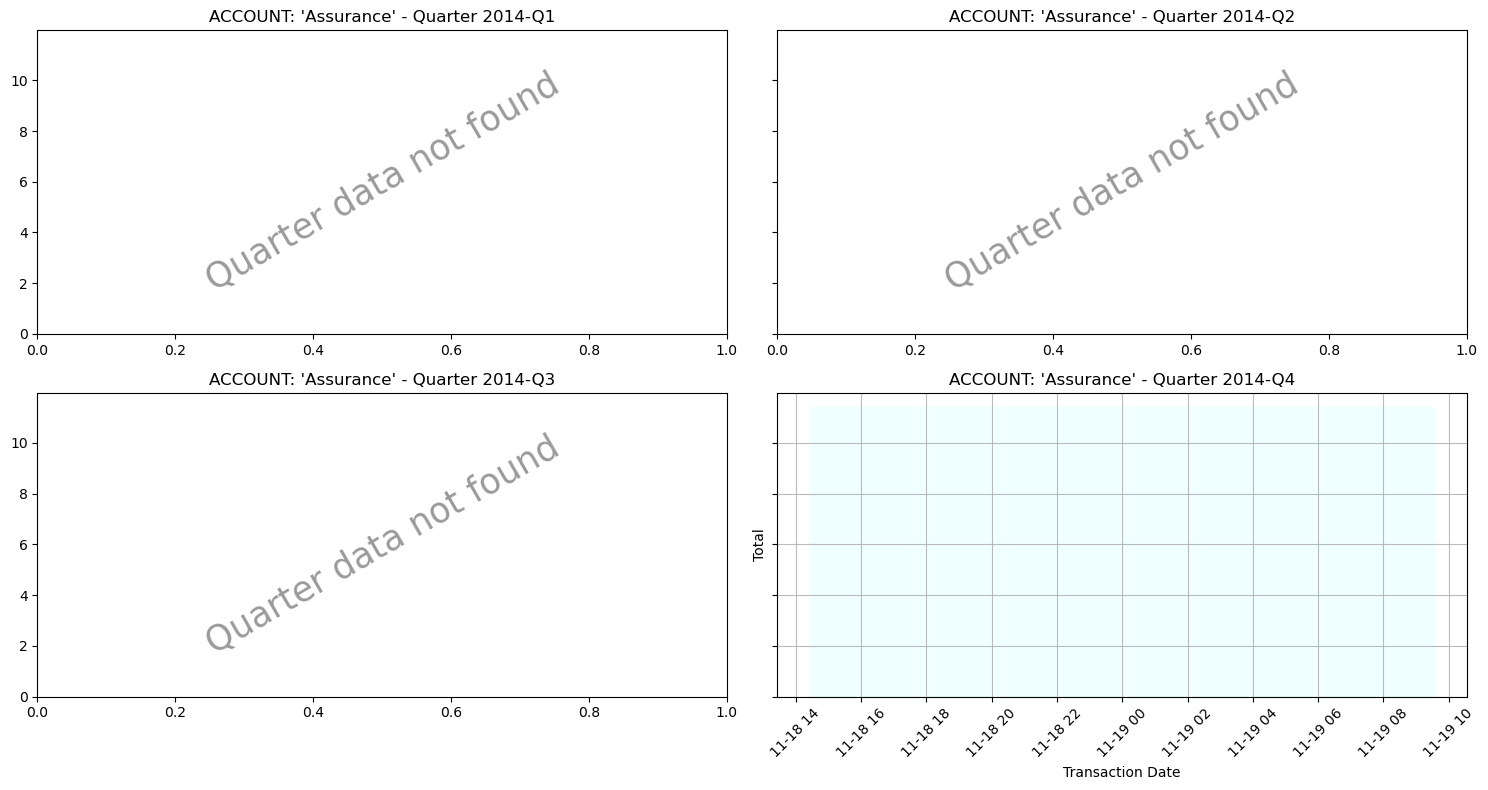

In [180]:
plot_transactions_per_quarter_over_time_per_servicearea(df[df['Account Description'].isin(ac_2014)], 2014,  colors=colors, title='ACCOUNT: ')

__3.	The Auditor would like to get an understanding of how Creditors are classified into accounts. In particular, they are worried about transaction misclassification. Are you able to identify instances in which Creditors are not consistently classified into Accounts (e.g., most of the time Creditor “AirTickets.com” is classified into “Travelling Expenses”, but on some occasions it is also found in “Miscellaneous”)?__

In [484]:
def display_value_counts_of_accounts_per_creditor(df, creditor_colname='Creditor', account_colname='Account Description', threshold=20):
    # loop through creditor unique values of whole dataset
    for creditor in sorted(df[creditor_colname].unique()):
        # filter rows of the current creditor
        df_filter = df[creditor_colname] == creditor
        
        # count number of rows from creditor
        num_transactions = df[df_filter].shape[0]
        
        # we'll discard creditors with less than threshold due to high amount of creditors
        if num_transactions < threshold: continue
        
        # display value counts of Account of the creditor
        print("Creditor: '" + creditor + "'")
        display(df[df_filter][account_colname].value_counts())
        print('-'*40)
    
# display_value_counts_of_accounts_per_creditor(df, threshold=100)

In [485]:
def plot_value_counts_of_accounts_per_creditor(df, creditor_colname='Creditor', account_colname='Account Description', threshold=20):
    # loop through creditor unique values of whole dataset
    for creditor in sorted(df[creditor_colname].unique()):
        # filter rows of the current creditor
        df_filter = df[creditor_colname] == creditor
        
        # count number of rows from creditor
        num_transactions = df[df_filter].shape[0]
        
        # we'll discard creditors with less than threshold due to high amount of creditors
        if num_transactions < threshold: continue
        
        # plot horizontal bar of value counts per Account
        display(df[df_filter][account_colname].value_counts().sort_values().plot(kind = 'barh'))
        plt.title("Creditor: '" + creditor + "'")
        plt.xlabel("Count transactions")
        plt.show()
    
# plot_value_counts_of_accounts_per_creditor(df, threshold=100)

__4.	In terms of spending behavior (defined by the number and the typical size of transactions), are there Service Areas that behave similarly and can be grouped together? How?__

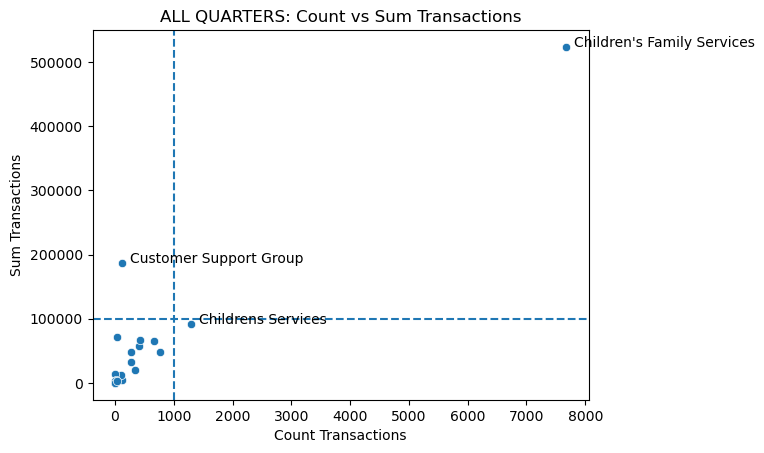

In [564]:
import seaborn as sns

def plot_count_vs_total(df, sa_colname='Service Area', total_colname='Total', lines=(100, 10000), title=''):
    # set x as count of transactions per service area
    l = list(df.groupby(sa_colname)[total_colname].count().items())
    sorted(l, key= lambda x:x[0])
    sas = df.groupby(sa_colname)[total_colname].count().to_dict()
    sas = {v: k for k, v in sas.items()}
    x = [tup[1] for tup in l]

    # set y as sum of transactions per service area
    l = list(df.groupby(sa_colname)[total_colname].sum().items())
    sorted(l, key= lambda x : x[0])
    y = [tup[1] for tup in l]
    
    # plot scatterplot
    sns.scatterplot(x = x, y = y)
    plt.axvline(lines[0], ls='--')
    plt.axhline(lines[1], ls='--')
    plt.xlabel('Count Transactions')
    plt.ylabel('Sum Transactions')
    plt.title(title)
    
    # annotate service areas
    offset = 0.00025 * max(y)
    for x_, y_ in zip(x,y):
        if x_ > lines[0] or y_ > lines[1]:
            plt.text(x_ + offset, y_ + offset, sas[x_])
    
plot_count_vs_total(df, lines=(1000, 100000), title='ALL QUARTERS: Count vs Sum Transactions')

In [568]:
def plot_date_vs_total_per_quarter(df, sa_colname='Service Area', total_colname='Total', quarter_colname='Quarter'):
    # loop through quarters
    for i, quarter in enumerate(df[quarter_colname].unique()):
        plt.figure(i)
        df_filter = df[quarter_colname] == quarter
        plot_count_vs_total(df[df_filter])
        plt.title("QUARTER: '" + str(quarter)[-2:] + '-' + str(quarter)[:4] + "'")
        
        
# plot_count_vs_total_per_quarter(df)

__5.	The auditor has heard that you may know anomaly detection techniques. They would like to ask you for a sample of a few hundred transactions that are anomalous, different or worthwhile inquiring about.  The sample should include at least five transactions for each Service Area. Please provide this sample and explain why they are special or different.__

In [791]:
def plot_date_vs_total(df, date_colname='Transaction Date', total_colname='Total', title='', iqr_factor=1.5, bottom_n=None, top_n=None):
    # set x as count of transactions per service area
    x = df[date_colname]

    # set y as sum of transactions per service area
    y = df[total_colname]
    
    # plot horizontal lines indicating common outliers detection based on IQR
    q1 = y.quantile(0.25)
    q3 = y.quantile(0.75)
    IQR = q3 - q1
    lower = q1 - iqr_factor * IQR
    upper = q3 + iqr_factor * IQR
    plt.axhline(lower, ls='--', color='r')
    plt.axhline(upper, ls='--', color='r')   
    
    # save outliers
    offset = 0.00025 * max(y)
    upper_outliers, lower_outliers = [], []
    for index, y_ in y.items():
        if y_ > upper:
            upper_outliers.append((index, y_))
        elif y_ < lower:
            lower_outliers.append((index, y_))
    if bottom_n is not None:
        outliers = lower_outliers
    if top_n is not None:
        outliers = upper_outliers
    outliers = sorted(outliers, key=lambda x:x[1], reverse=True)
    indexes = [tup[0] for tup in outliers]
    df_outliers = df.loc[indexes]
    
    # make sure we get outliers within df index range
    if bottom_n is not None and bottom_n > df_outliers.shape[0]:
        bottom_n = df_outliers.shape[0]
    if top_n is not None and top_n > df_outliers.shape[0]:
        top_n = df_outliers.shape[0]
    if isinstance(bottom_n, int): bottom_n *= -1
    
    # color outliers
    hues = []
    for index in range(len(y)):
        if index in indexes[bottom_n:top_n]:
            hues.append('top outliers')
            continue
        hues.append('rest')
    
    # plot scatterplot
    sns.scatterplot(x = x, y = y, hue=hues)
    plt.xlabel('Count Transactions')
    plt.ylabel('Sum Transactions')
    plt.xticks(rotation=45)
    plt.title(title)
    
    # return outliers
    return df_outliers[bottom_n:top_n]
    

Service Area   Account Description            Creditor  \
4270   Customer Support Group      Fees and Charges  HMCOURTS-SERVICE.G   
9104   Customer Support Group  Legal and Court Fees  HMCOURTS-SERVICE.G   
8788   Customer Support Group  Legal and Court Fees  HMCOURTS-SERVICE.G   
1967       CSG Managed Budget  Legal and Court Fees  HMCOURTS-SERVICE.G   
11728  Customer Support Group  Legal and Court Fees  HMCOURTS-SERVICE.G   

      Transaction Date    Total  Year Quarter  
4270        2015-05-20  15340.8  2015  2015Q2  
9104        2016-06-23  11487.0  2016  2016Q2  
8788        2016-05-26  11088.0  2016  2016Q2  
1967        2014-09-23   8058.0  2014  2014Q3  
11728       2017-01-30   7968.0  2017  2017Q1

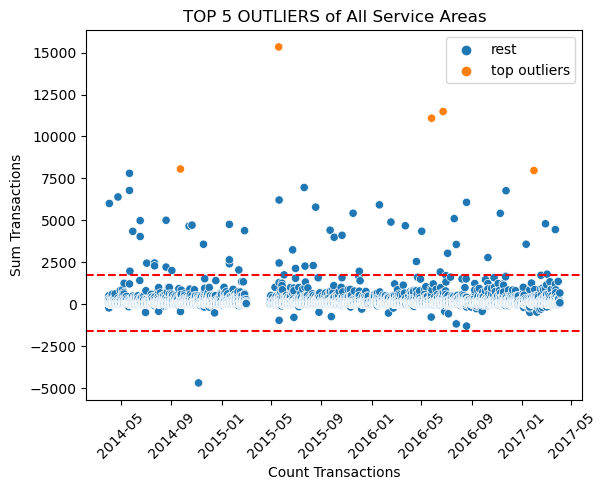

In [792]:
# plot top outliers of ALL Service Areas
plot_date_vs_total(df, iqr_factor=20, top_n=5, title='TOP 5 OUTLIERS of All Service Areas')

Service Area   Account Description            Creditor  \
2514  Customer Support Group  Legal and Court Fees  HMCOURTS-SERVICE.G   

     Transaction Date   Total  Year Quarter  
2514       2014-11-06 -4707.0  2014  2014Q4

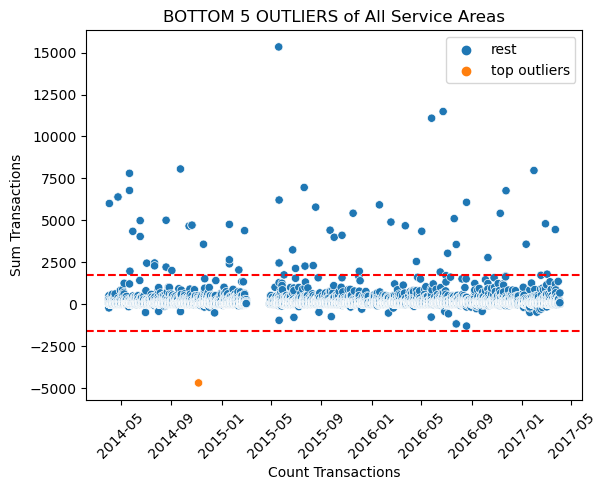

In [793]:
plot_date_vs_total(df, iqr_factor=20, bottom_n=5, title='BOTTOM 5 OUTLIERS of All Service Areas')

TOP 5 OUTLIERS of Service Area: 'Childrens Services'


Service Area     Account Description             Creditor  \
26    Childrens Services          Other Services   ACCESS EXPEDITIONS   
1092  Childrens Services  Miscellaneous Expenses    HERTSMERE BOROUGH   
676   Childrens Services     Travelling Expenses    CURRIE MOTORS CAR   
929   Childrens Services    Legal and Court Fees          COUNCIL TAX   
1409  Childrens Services          Other Services  MOTORSPORT WORLD LT   

     Transaction Date    Total  Year Quarter  
26         2014-04-03  6000.00  2014  2014Q2  
1092       2014-07-03  2439.16  2014  2014Q3  
676        2014-05-23  1960.00  2014  2014Q2  
929        2014-06-16  1406.50  2014  2014Q2  
1409       2014-08-01   983.40  2014  2014Q3

--------------------------------------------------
TOP 5 OUTLIERS of Service Area: 'Deputy Chief Operating Officer'


Service Area             Account Description  \
2154  Deputy Chief Operating Officer             Travelling Expenses   
7     Deputy Chief Operating Officer                        Training   
794   Deputy Chief Operating Officer             Grounds maintenance   
1176  Deputy Chief Operating Officer  Equipment and Materials Purcha   
1177  Deputy Chief Operating Officer  Equipment and Materials Purcha   

                 Creditor Transaction Date  Total  Year Quarter  
2154  EUROSTAR INTERNATIO       2014-10-10  460.0  2014  2014Q4  
7     WWW.WESTMINSTER-BRI       2014-04-02  354.0  2014  2014Q2  
794          PINKS SPIRES       2014-06-03  340.0  2014  2014Q2  
1176      INSPIRED FRAMES       2014-07-11  312.5  2014  2014Q3  
1177      INSPIRED FRAMES       2014-07-11  182.5  2014  2014Q3

--------------------------------------------------
TOP 5 OUTLIERS of Service Area: 'Control Accounts'


Service Area             Account Description             Creditor  \
59   Control Accounts  Other Transfer Payments to Soc  Amazon *Mktplce EU-   
907  Control Accounts          Miscellaneous Expenses   ARGOS RETAIL GROUP   

    Transaction Date  Total  Year Quarter  
59        2014-04-07  83.31  2014  2014Q2  
907       2014-06-13  63.94  2014  2014Q2

--------------------------------------------------
TOP 5 OUTLIERS of Service Area: 'Adults and Communities'


Service Area             Account Description  \
11508  Adults and Communities                     Electricity   
9225   Adults and Communities                           Rents   
10934  Adults and Communities  Other Agencies - Third Party P   
10937  Adults and Communities  Other Agencies - Third Party P   
6853   Adults and Communities                    Publications   

                    Creditor Transaction Date    Total  Year Quarter  
11508  E.ON ENERGY SOLUTIONS       2017-01-11  3569.03  2017  2017Q1  
9225      KNIGHTONS ESTATE A       2016-07-04  3028.20  2016  2016Q3  
10934           HOLIDAY INNS       2016-11-22  1670.30  2016  2016Q4  
10937           HOLIDAY INNS       2016-11-22  1625.00  2016  2016Q4  
6853   GUARDIAN NEWS & MEDIA       2015-12-04  1391.04  2015  2015Q4

--------------------------------------------------
TOP 5 OUTLIERS of Service Area: 'Internal Audit & CAFT'


Service Area             Account Description  \
957   Internal Audit & CAFT  Equipment and Materials Purcha   
2418  Internal Audit & CAFT  Private Contractors - Third Pa   

                 Creditor Transaction Date  Total  Year Quarter  
957     CANFORD AUDIO PLC       2014-06-19  403.2  2014  2014Q2  
2418  EB TENANCY FRAUD FO       2014-10-30   99.0  2014  2014Q4

--------------------------------------------------
TOP 5 OUTLIERS of Service Area: 'Street Scene'


Service Area    Account Description             Creditor  \
2405  Street Scene  Vehicle Running Costs  POST OFFICE COUNTER   
2404  Street Scene  Vehicle Running Costs  POST OFFICE COUNTER   

     Transaction Date  Total  Year Quarter  
2405       2014-10-29  400.0  2014  2014Q4  
2404       2014-10-29  287.5  2014  2014Q4

--------------------------------------------------
TOP 5 OUTLIERS of Service Area: 'NSCSO'


Empty DataFrame
Columns: [Service Area, Account Description, Creditor, Transaction Date, Total, Year, Quarter]
Index: []

--------------------------------------------------
TOP 5 OUTLIERS of Service Area: 'Governance'


Service Area Account Description            Creditor Transaction Date  \
253   Governance      Other Services  BETTER LIFE HEALTH       2014-04-24   
255   Governance      Other Services  BETTER LIFE HEALTH       2014-04-24   

      Total  Year Quarter  
253  6388.2  2014  2014Q2  
255  6388.2  2014  2014Q2

--------------------------------------------------
TOP 5 OUTLIERS of Service Area: 'Public Health'


Empty DataFrame
Columns: [Service Area, Account Description, Creditor, Transaction Date, Total, Year, Quarter]
Index: []

--------------------------------------------------
TOP 5 OUTLIERS of Service Area: 'CSG Managed Budget'


Empty DataFrame
Columns: [Service Area, Account Description, Creditor, Transaction Date, Total, Year, Quarter]
Index: []

--------------------------------------------------
TOP 5 OUTLIERS of Service Area: 'Strategic Commissioning Board'


Empty DataFrame
Columns: [Service Area, Account Description, Creditor, Transaction Date, Total, Year, Quarter]
Index: []

--------------------------------------------------
TOP 5 OUTLIERS of Service Area: 'Family Services'


Service Area             Account Description         Creditor  \
1686  Family Services          Miscellaneous Expenses       EQUITA LTD   
1920  Family Services  Equipment and Materials Purcha     TESCO DIRECT   
2218  Family Services  Other Transfer Payments to Soc     ARGOS DIRECT   
2359  Family Services  Private Contractors - Third Pa  TICKETMASTER UK   
1657  Family Services                  Other Services      MAPYXLIMITE   

     Transaction Date   Total  Year Quarter  
1686       2014-08-27  989.29  2014  2014Q3  
1920       2014-09-19  914.00  2014  2014Q3  
2218       2014-10-16  890.95  2014  2014Q4  
2359       2014-10-27  850.00  2014  2014Q4  
1657       2014-08-22  695.40  2014  2014Q3

--------------------------------------------------
TOP 5 OUTLIERS of Service Area: 'Commercial'


Empty DataFrame
Columns: [Service Area, Account Description, Creditor, Transaction Date, Total, Year, Quarter]
Index: []

--------------------------------------------------
TOP 5 OUTLIERS of Service Area: 'Children's Service DSG'


Service Area             Account Description  \
9615  Children's Service DSG                   Subscriptions   
8329  Children's Service DSG  Equipment and Materials Purcha   
7038  Children's Service DSG  Equipment and Materials Purcha   
4561  Children's Service DSG                        Training   
3325  Children's Service DSG                        Training   

                 Creditor Transaction Date    Total  Year Quarter  
9615   MK LANGUAGE CENTRE       2016-08-08  1500.00  2016  2016Q3  
8329  WWW.POSTURITE.CO.UK       2016-04-11   788.34  2016  2016Q2  
7038    HP INC UK LIMITED       2015-12-18   749.17  2015  2015Q4  
4561           PAYATRADER       2015-05-28   584.00  2015  2015Q2  
3325           PAYATRADER       2015-01-08   520.00  2015  2015Q1

--------------------------------------------------
TOP 5 OUTLIERS of Service Area: 'Education'


Service Area    Account Description        Creditor Transaction Date  \
1988    Education  Books-CDs-Audio-Video  PEARSON ED LTD       2014-09-25   

      Total  Year Quarter  
1988  830.1  2014  2014Q3

--------------------------------------------------
TOP 5 OUTLIERS of Service Area: 'Children's Family Services'


Service Area             Account Description  \
5288  Children's Family Services  Other Agencies - Third Party P   
6813  Children's Family Services  Other Agencies - Third Party P   
9188  Children's Family Services                             Gas   
9299  Children's Family Services  Equipment and Materials Purcha   
8465  Children's Family Services          Miscellaneous Expenses   

                Creditor Transaction Date    Total  Year Quarter  
5288  SOUTH MIMMS TRAVEL       2015-07-23  2262.91  2015  2015Q3  
6813    WWW.ILXGROUP.COM       2015-12-02  1954.80  2015  2015Q4  
9188  BRITISH GAS BUSINE       2016-06-30  1695.22  2016  2016Q2  
9299  ACCESS EXPEDITIONS       2016-07-11  1604.76  2016  2016Q3  
8465    AUSTIN DAVID LTD       2016-04-22  1595.47  2016  2016Q2

--------------------------------------------------
TOP 5 OUTLIERS of Service Area: 'Children's Education & Skills'


Service Area    Account Description  \
4841  Children's Education & Skills               Training   
9971  Children's Education & Skills    Conference Expenses   
3836  Children's Education & Skills  Books-CDs-Audio-Video   
9969  Children's Education & Skills    Conference Expenses   
2872  Children's Education & Skills             Food Costs   

                 Creditor Transaction Date   Total  Year Quarter  
4841             PENTAGON       2015-06-18  987.47  2015  2015Q2  
9971       THE NOKE HOTEL       2016-09-08  833.33  2016  2016Q3  
3836  SP  DOWN SYNDROME E       2015-02-10  730.44  2015  2015Q1  
9969       THE NOKE HOTEL       2016-09-08  725.00  2016  2016Q3  
2872  COMPASS SERVICES UK       2014-11-28  648.00  2014  2014Q4

--------------------------------------------------
TOP 5 OUTLIERS of Service Area: 'Customer Support Group'


Service Area   Account Description            Creditor  \
4270   Customer Support Group      Fees and Charges  HMCOURTS-SERVICE.G   
9104   Customer Support Group  Legal and Court Fees  HMCOURTS-SERVICE.G   
8788   Customer Support Group  Legal and Court Fees  HMCOURTS-SERVICE.G   
11728  Customer Support Group  Legal and Court Fees  HMCOURTS-SERVICE.G   
5227   Customer Support Group      Fees and Charges  HMCOURTS-SERVICE.G   

      Transaction Date    Total  Year Quarter  
4270        2015-05-20  15340.8  2015  2015Q2  
9104        2016-06-23  11487.0  2016  2016Q2  
8788        2016-05-26  11088.0  2016  2016Q2  
11728       2017-01-30   7968.0  2017  2017Q1  
5227        2015-07-21   6955.2  2015  2015Q3

--------------------------------------------------
TOP 5 OUTLIERS of Service Area: 'Streetscene'


Service Area             Account Description                Creditor  \
5499   Streetscene                     Advertising      HAYMARKET PUBLISHI   
6040   Streetscene  Equipment and Materials Purcha    DIRECT 365ONLINE LTD   
11773  Streetscene  Equipment and Materials Purcha  ALPHA PNEUMATIC SUPPLI   
3889   Streetscene                  Other Services       BRITISH STANDARDS   
4535   Streetscene           Vehicle Running Costs         WWW.DVLA.GOV.UK   

      Transaction Date    Total  Year Quarter  
5499        2015-08-12  2295.60  2015  2015Q3  
6040        2015-10-01  1098.00  2015  2015Q4  
11773       2017-02-01   866.00  2017  2017Q1  
3889        2015-02-16   717.95  2015  2015Q1  
4535        2015-05-25   652.50  2015  2015Q2

--------------------------------------------------
TOP 5 OUTLIERS of Service Area: 'Parking & Infrastructure'


Service Area             Account Description  \
10348  Parking & Infrastructure          Miscellaneous Expenses   
11253  Parking & Infrastructure  Equipment and Materials Purcha   

                     Creditor Transaction Date    Total  Year Quarter  
10348      WWW.OPUSENERGY.COM       2016-10-10  2773.25  2016  2016Q4  
11253  WWW.MIDLANDPALLETTRUCK       2016-12-16   795.00  2016  2016Q4

--------------------------------------------------
TOP 5 OUTLIERS of Service Area: 'Assurance'


Service Area      Account Description                Creditor  \
8558    Assurance               Venue Hire        ALEXANDRA PALACE   
9201    Assurance           Equipment Hire  MARQUEE CARPETS LIMITE   
4306    Assurance  General Office Expenses     WWW.CLOTHES2ORDER.C   
8864    Assurance   Miscellaneous Expenses         CLOTHES 2 ORDER   
6012    Assurance               Stationery   SNA MANUFACTURING LTD   

     Transaction Date    Total  Year Quarter  
8558       2016-05-02  4342.20  2016  2016Q2  
9201       2016-06-30  1315.20  2016  2016Q2  
4306       2015-05-21  1276.92  2015  2015Q2  
8864       2016-06-06   880.50  2016  2016Q2  
6012       2015-09-29   660.50  2015  2015Q3

--------------------------------------------------
TOP 5 OUTLIERS of Service Area: 'Commissioning'


Service Area             Account Description                Creditor  \
6051   Commissioning       Furniture-Purchase-Repair  WWW.OFFICEFURNITUREONL   
9465   Commissioning             Travelling Expenses      TRAVEL RESERVATION   
9005   Commissioning                        Training  WWW.ADVANTAGELEARNING.   
12243  Commissioning          Miscellaneous Expenses      HIREITAILL.COM LTD   
4621   Commissioning  Building Repairs & Maintenance  MET PARKING SERVICES L   

      Transaction Date    Total  Year Quarter  
6051        2015-10-02  3984.00  2015  2015Q4  
9465        2016-07-25  3554.56  2016  2016Q3  
9005        2016-06-16  1910.40  2016  2016Q2  
12243       2017-03-03  1782.00  2017  2017Q1  
4621        2015-06-02  1740.00  2015  2015Q2

--------------------------------------------------
TOP 5 OUTLIERS of Service Area: 'Regional Enterprise'


Service Area    Account Description               Creditor  \
6782  Regional Enterprise  Professional Services  J W RUDDOCK &SONS LTD   

     Transaction Date   Total  Year Quarter  
6782       2015-12-01  1645.0  2015  2015Q4

--------------------------------------------------
TOP 5 OUTLIERS of Service Area: 'HRA'


Empty DataFrame
Columns: [Service Area, Account Description, Creditor, Transaction Date, Total, Year, Quarter]
Index: []

--------------------------------------------------


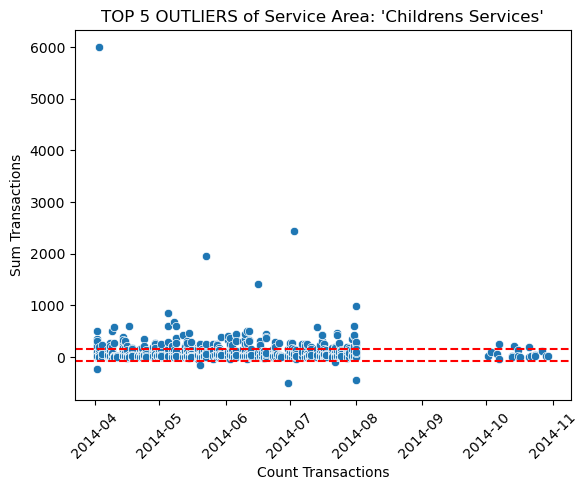

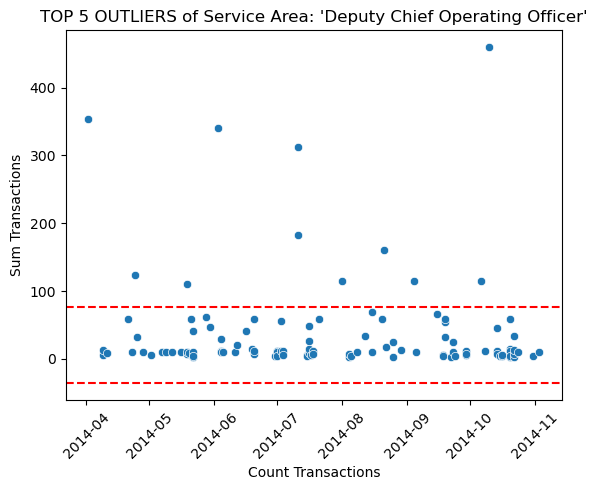

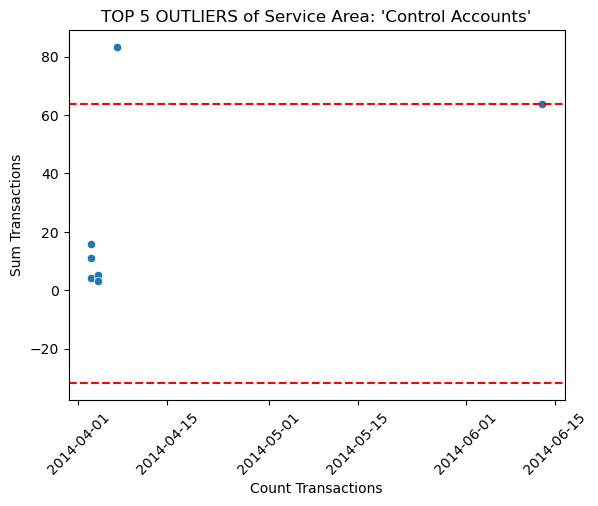

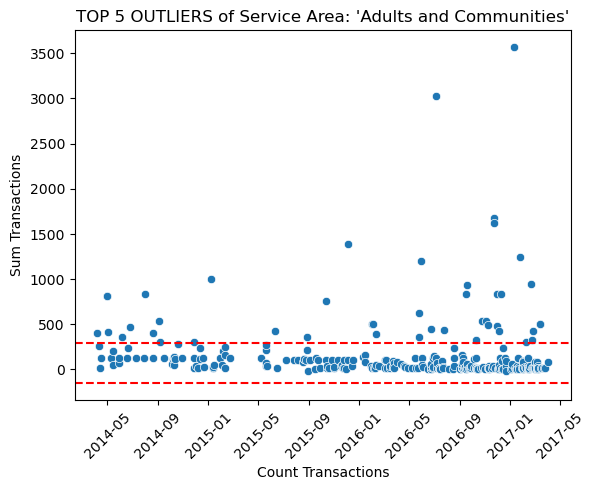

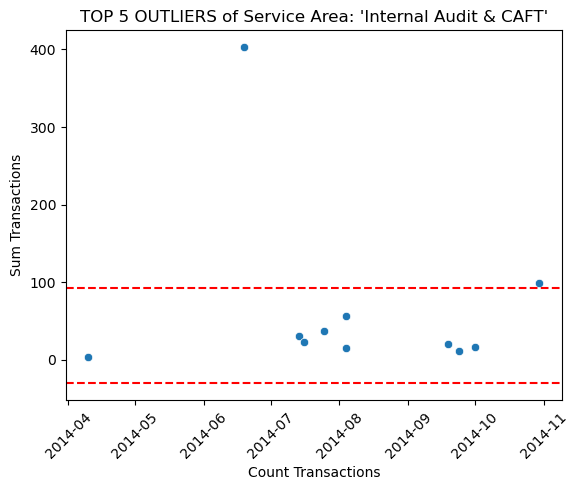

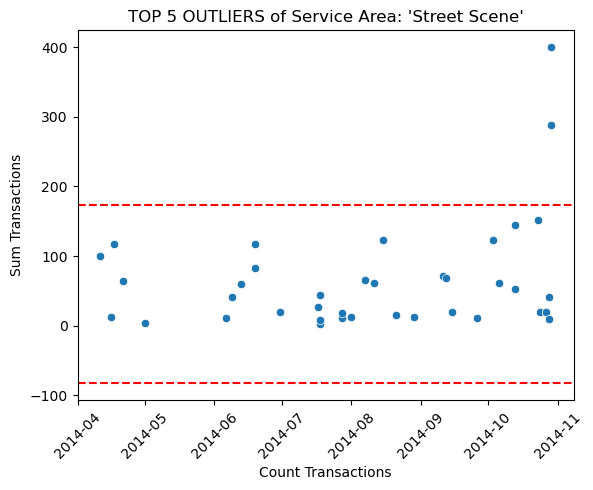

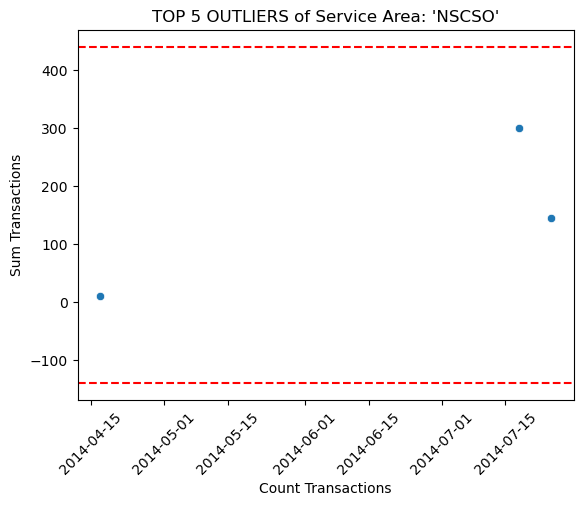

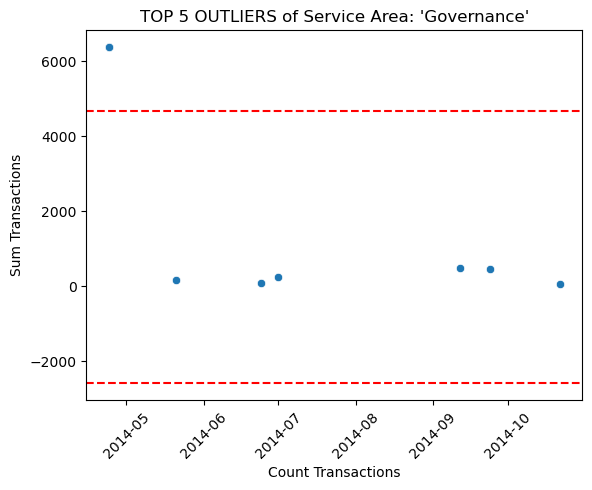

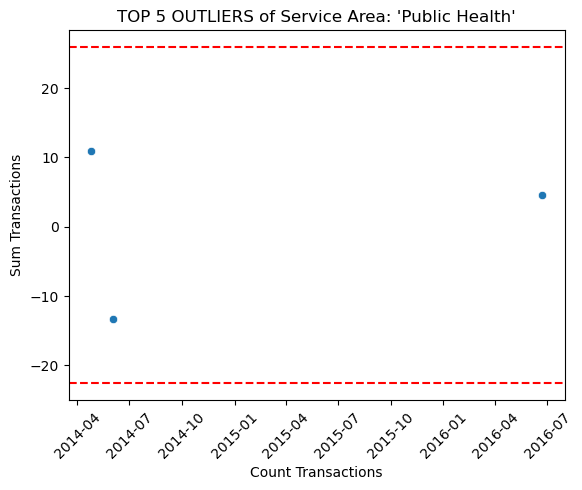

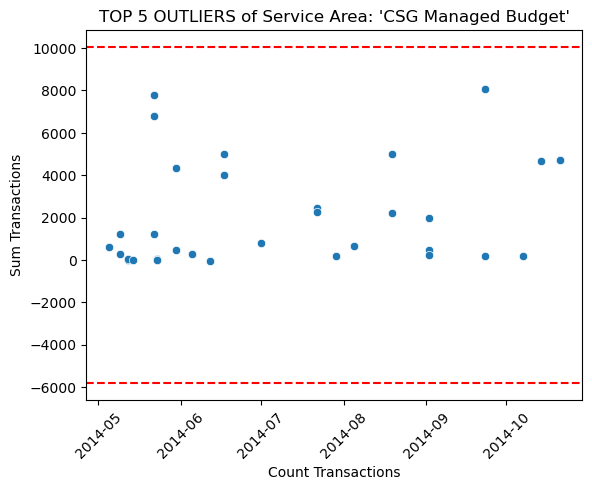

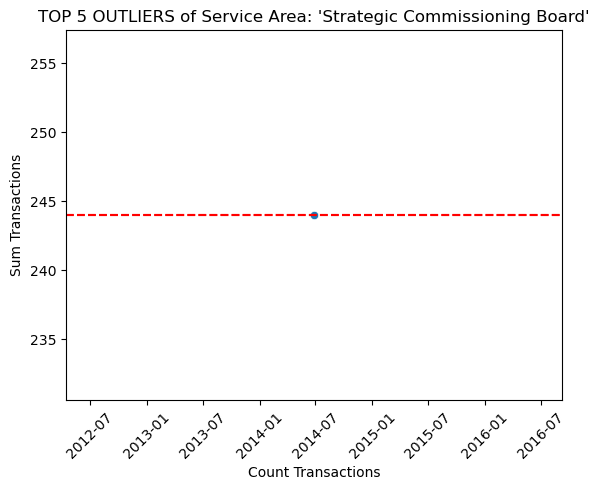

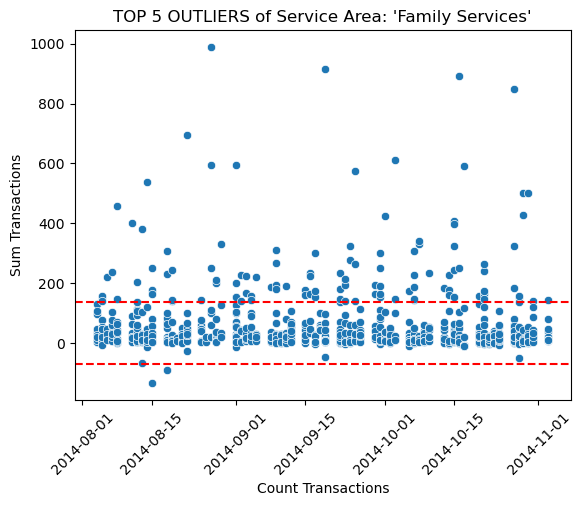

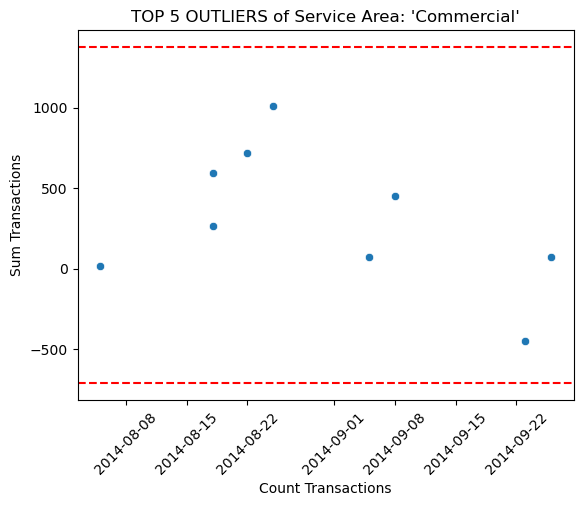

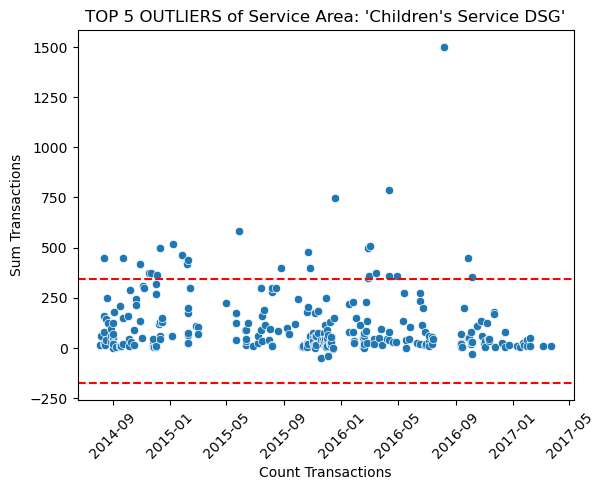

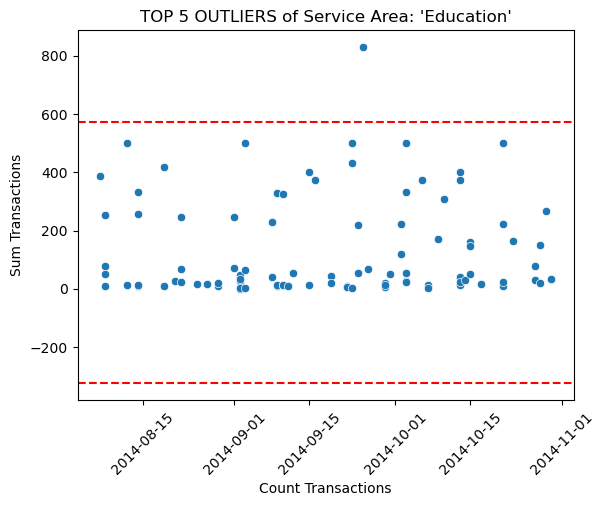

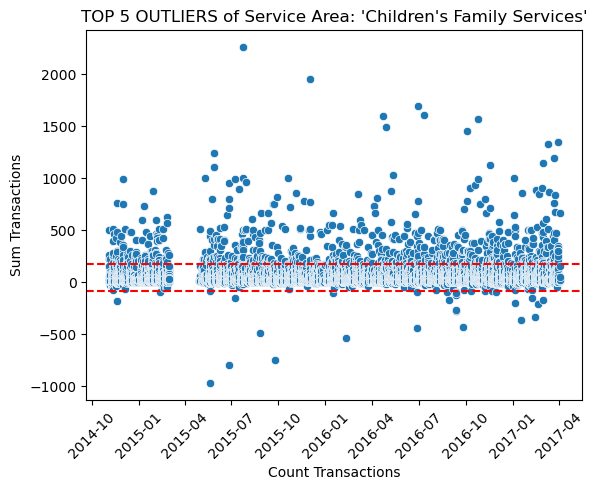

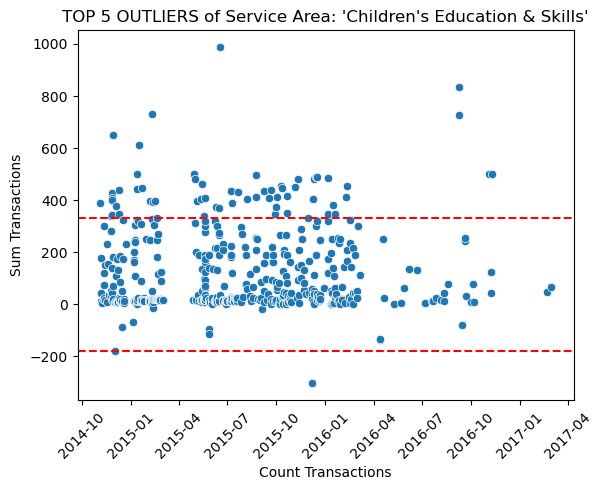

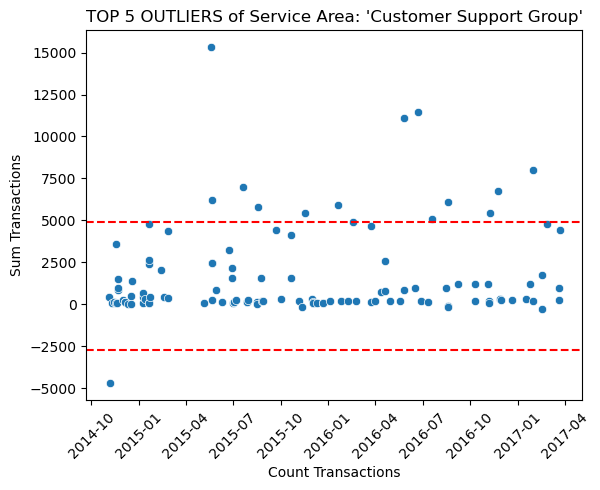

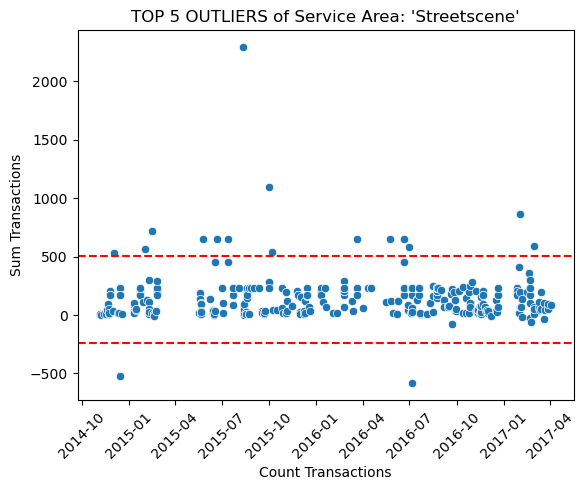

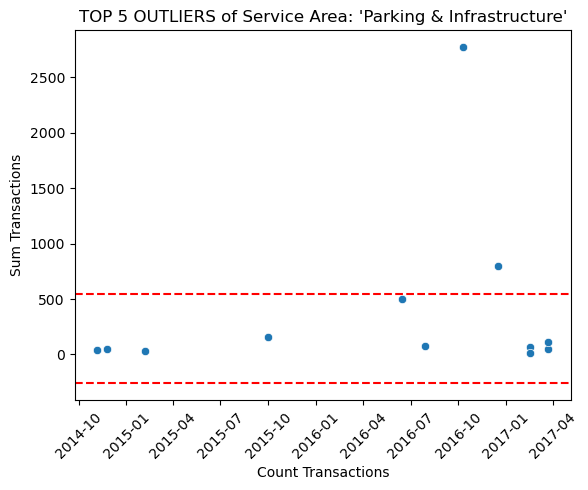

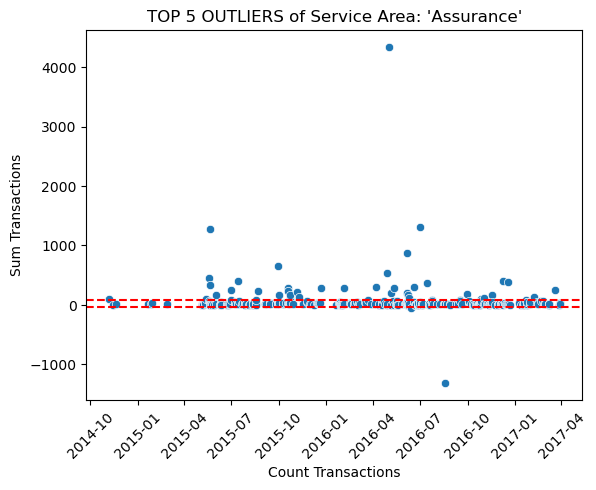

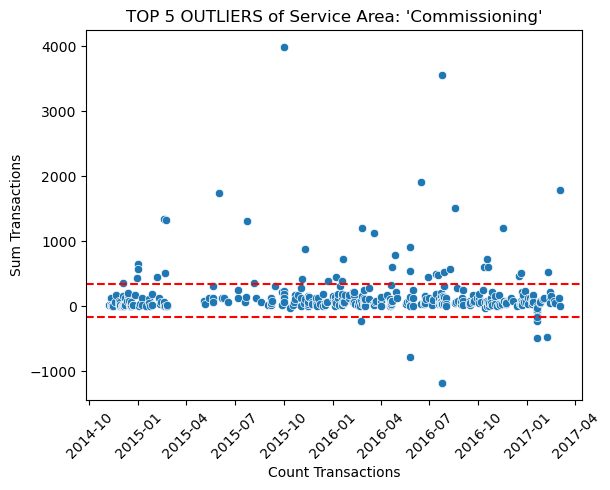

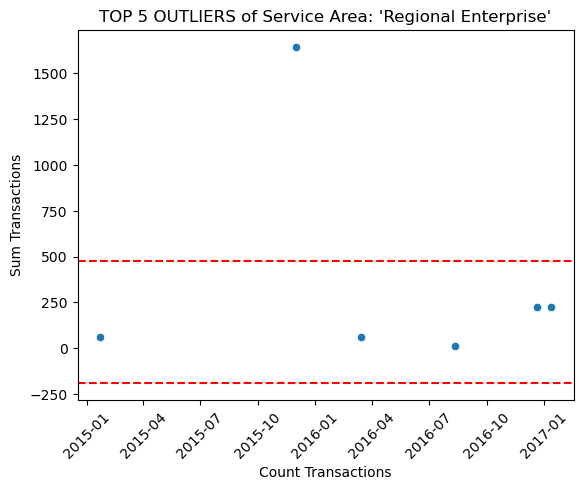

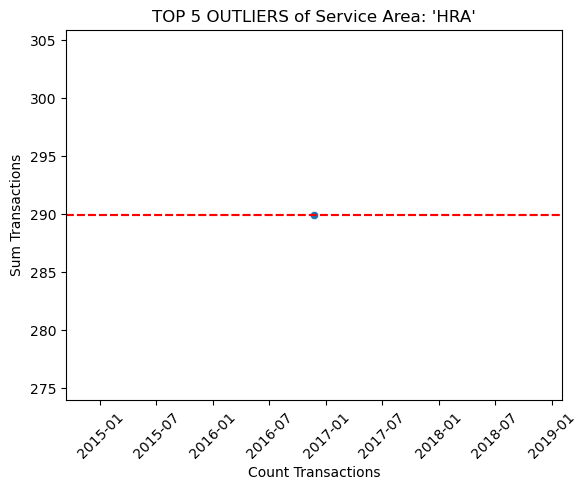

In [763]:
def plot_date_vs_total_per_service_area(df,
                                        date_colname='Transaction Date',
                                        total_colname='Total',
                                        sa_colname='Service Area',
                                        iqr_factor=1.5,
                                        bottom_n=None,
                                        top_n=None):
    # set title label of top outliers
    if bottom_n is not None: label = 'BOTTOM ' + str(bottom_n)
    elif top_n is not None: label  = 'TOP ' + str(top_n)
    else: label = 'ALL'
    
    for i, sa in enumerate(df[sa_colname].unique()):
        plt.figure(i)
        df_filter = df[sa_colname] == sa
        title = label + " OUTLIERS of Service Area: '"+sa+"'"
        df_outliers = plot_date_vs_total(df[df_filter],
                           date_colname=date_colname,
                           total_colname=total_colname,
                           title=title,
                           iqr_factor=iqr_factor,
                           bottom_n=bottom_n,
                           top_n=top_n)
        print(title)
        display(df_outliers)
        print('-'*50)
        
plot_date_vs_total_per_service_area(df, top_n=5, iqr_factor=1.5)